# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

## INTRODUCCIÓN

Los datos tomados son del gobierno de la Ciudad de Buenos Aires, Argentina. Se va a tomar datos de 5 datasets de diferentes años: 2021, 2020,2019,2018,2017. Al final para probar mejorar el modelo se va a tomar también del 2016 y 2015. Los datasets a tomar son del flujo vehicular que se mide a tráves de los peajes de las autopistas de la Ciudad de Buenos Aires. Estas autopistas rodean la Ciudad de Buenos Aires. Los datasets van a tener una columna de sentido que lleva al 'Centro' o a 'Provincia' haciendo alusión de yendo al Centro de la Ciudad de Buenos Aires o saliendo del Centro de la Ciudad de Buenos Aires. En general se miden 7 peajes, teniendo algunos años más y otros menos. Al tener los datasets diferentes datos vamos a optar por usar un mínimo común de todos los datasets.

## PREPARACIÓN DE LOS DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import Markdown, display
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import ADFTest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet

Importamos las librerías

In [2]:
import zipfile
with zipfile.ZipFile("flujo-vehicular.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

Importamos el zip de los datasets y lo extraemos en otra carpeta

In [3]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

Importamos la librería para imprimir en negrita y otras fuentes.

In [4]:
data_2021 = pd.read_csv('targetdir/flujo-vehicular-2021.csv', sep =',')
data_2020 = pd.read_csv('targetdir/flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('targetdir/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('targetdir/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('targetdir/flujo-vehicular-2017.csv', sep =',')

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (0,2,3,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Importamos todos los datasets

In [5]:
def printmd(string):
    display(Markdown(string))

Definimos una función para poder imprimir de manera más customizada.

## EXPLORACIÓN DE LOS DATASETS

In [6]:
datasets = [data_2021, data_2020, data_2019, data_2018, data_2017]

data_2021.name = "flujo 2021"
data_2020.name = "flujo 2020"
data_2019.name = "flujo 2019"
data_2018.name = "flujo 2018"
data_2017.name = "flujo 2017"

for dataset in datasets:
    printmd(f"**{dataset.name}**")
    dataset.info()
    print('\n')
    printmd("**Columnas:**")
    print(dataset.columns, '\n')

**flujo 2021**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336091 entries, 0 to 1336090
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   Año de Fecha Operativa  1336091 non-null  object
 1   Cat Cobrada             1336091 non-null  object
 2   Día de Fecha Operativa  1336091 non-null  object
 3   Hora HH                 1336091 non-null  object
 4   ID Peaje                1336091 non-null  object
 5   Mes de Fecha Operativa  1336091 non-null  object
 6   Observacion             1336091 non-null  object
 7   Sentido                 1336091 non-null  object
 8   Tipo Cobro              1336091 non-null  object
 9   Pasos                   1336091 non-null  object
dtypes: object(10)
memory usage: 101.9+ MB




**Columnas:**

Index(['Año de Fecha Operativa', 'Cat Cobrada', 'Día de Fecha Operativa',
       'Hora HH', 'ID Peaje', 'Mes de Fecha Operativa', 'Observacion',
       'Sentido', 'Tipo Cobro', 'Pasos'],
      dtype='object') 



**flujo 2020**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB




**Columnas:**

Index(['periodo', 'fecha', 'mes', 'dia', 'dia_fecha', 'hora_inicio',
       'hora_fin', 'estacion', 'tipo_vehiculo', 'forma_pago', 'observacion',
       'sentido', 'cantidad_pasos'],
      dtype='object') 



**flujo 2019**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB




**Columnas:**

Index(['periodo', 'fecha', 'hora_inicio', 'hora_fin', 'dia', 'estacion',
       'sentido', 'tipo_vehiculo', 'forma_pago', 'cantidad_pasos'],
      dtype='object') 



**flujo 2018**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB




**Columnas:**

Index(['periodo', 'fecha', 'hora_inicio', 'hora_fin', 'dia', 'estacion',
       'sentido', 'tipo_vehiculo', 'forma_pago', 'cantidad_pasos'],
      dtype='object') 



**flujo 2017**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB




**Columnas:**

Index(['periodo', 'fecha', 'hora_inicio', 'hora_fin', 'dia', 'estacion',
       'sentido', 'tipo_vehiculo', 'forma_pago', 'cantidad_pasos'],
      dtype='object') 



Imprimimos todos los datasets con su información y nombre de columnas. Observamos que el 2020 y 2021 tienen diferentes columnas que los anteriores, también observamos que muchos de los datos tienen tipo objeto por lo que vamos a tener que trabajar en ellos. También se observa una diferencia en la cantidad de datos en cada una. Vamos a seguir explorando cada dataset para el correcto preprocesamiento de los mismos.

In [7]:
data_2021.head()

Año de Fecha Operativa Cat Cobrada Día de Fecha Operativa Hora HH ID Peaje  \
0                   2021        Auto                      1       0      ALB   
1                   2021        Auto                      1       0      ALB   
2                   2021        Auto                      1       0      ALB   
3                   2021        Auto                      1       0      ALB   
4                   2021        Auto                      1       0      ALB   

  Mes de Fecha Operativa                       Observacion    Sentido  \
0                  abril                          Efectivo  Provincia   
1                  abril                      Mercado Pago  Provincia   
2                  abril                  Mercado Pago OCR     Centro   
3                  abril  Paso en infracción con Multa LPR  Provincia   
4                  abril                     Tag - PosPago     Centro   

     Tipo Cobro Pasos  
0      Efectivo     7  
1  Mercado Pago     4  
2  Mercado Pago     1  
3     Rec.Deuda     1  
4           Tag    19

Se observa que el Peaje está abreviado, también la fecha es separada en hora, día y mes. El tipo de vehículo aparece como Auto.

In [8]:
data_2020.head()

periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
0   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
1   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
2   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
3   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
4   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

   hora_fin estacion tipo_vehiculo forma_pago  \
0       1.0  ALBERDI          Auto   Efectivo   
1       1.0  ALBERDI          Auto   Efectivo   
2       1.0  ALBERDI          Auto  Rec.Deuda   
3       1.0  ALBERDI          Auto  Rec.Deuda   
4       1.0  ALBERDI          Auto  Rec.Deuda   

                        observacion    sentido  cantidad_pasos  
0                          Efectivo     Centro            24.0  
1                          Efectivo  Provincia            80.0  
2                Paso en Infracción  Provincia             1.0  
3  Paso en infracción con Multa LPR     Centro             1.0  
4  Paso en infracción con Multa LPR  Provincia             1.0

Se observa que la fecha se divide en mes, el día aparece con el nombre y el nùmero, tambièn aparece hora inicio y fin. La estación del peaje aparece con el nombre completo. El tipo de vehículo aparace como Auto.

In [9]:
data_2019.head()

periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

Observamos que la fecha se compone en nombre de día, pero no su número, la hora de inicio y de fin. También aparece el tipo de vehículo que es Liviano.

In [10]:
data_2018.head()

periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

Observamos que la data se compone como la de 2019.

In [11]:
data_2017.head()

periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Observamos que la data se compone como la de 2018 y 2019.

In [12]:
datasets = [data_2021, data_2020, data_2019, data_2018, data_2017]
for dataset in datasets:
    printmd(f"**{dataset.name}**")
    for columna in dataset.columns:
        print("Columna: ", columna)
        print(dataset[columna].unique())
    print('\n')

**flujo 2021**

Columna:  Año de Fecha Operativa
[2021 '2021' 'Total general']
Columna:  Cat Cobrada
['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago doble Moto' 'Pesados 2 Ejes'
 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes' 'Pesados 6 Ejes'
 'Total' 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago Doble Auto']
Columna:  Día de Fecha Operativa
[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '1' '2'
 '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16' '17' '18'
 '19' 'Total' 31 '31']
Columna:  Hora HH
[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 '9' '10'
 '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '0' '1'
 '2' '3' '4' '5' '6' '7' '8' 'Total']
Columna:  ID Peaje
['ALB' 'AVE' 'DEC' 'DEL' 'ILL' 'ILP' 'PB1' 'PB2' 'PB3' 'PB4' 'RET' 'SAL'
 'SAR' 'Total']
Columna:  Mes de Fecha Operativa
['abril' 'Total' 'marzo' 'mayo' 'febrero' 'enero' 'junio']
Columna:  Observaci

**flujo 2020**

Columna:  periodo
[2020.]
Columna:  fecha
['2020-01-01 00:00:00' '2020-01-02 00:00:00' '2020-01-03 00:00:00'
 '2020-01-04 00:00:00' '2020-01-05 00:00:00' '2020-01-06 00:00:00'
 '2020-01-07 00:00:00' '2020-01-08 00:00:00' '2020-01-09 00:00:00'
 '2020-01-10 00:00:00' '2020-01-11 00:00:00' '2020-01-12 00:00:00'
 '2020-01-13 00:00:00' '2020-01-14 00:00:00' '2020-01-15 00:00:00'
 '2020-01-16 00:00:00' '2020-01-17 00:00:00' '2020-01-18 00:00:00'
 '2020-01-19 00:00:00' '2020-01-20 00:00:00' '2020-01-21 00:00:00'
 '2020-01-22 00:00:00' '2020-01-23 00:00:00' '2020-01-24 00:00:00'
 '2020-01-25 00:00:00' '2020-01-26 00:00:00' '2020-01-27 00:00:00'
 '2020-01-28 00:00:00' '2020-01-29 00:00:00' '2020-01-30 00:00:00'
 '2020-01-31 00:00:00' '2020-02-01 00:00:00' '2020-02-02 00:00:00'
 '2020-02-03 00:00:00' '2020-02-04 00:00:00' '2020-02-05 00:00:00'
 '2020-02-06 00:00:00' '2020-02-07 00:00:00' '2020-02-08 00:00:00'
 '2020-02-09 00:00:00' '2020-02-10 00:00:00' '2020-02-11 00:00:00'
 '2020-02-12 00:00:0

**flujo 2019**

Columna:  periodo
[2019]
Columna:  fecha
['2019-01-01' '2019-02-01' '2019-03-01' '2019-04-01' '2019-05-01'
 '2019-06-01' '2019-07-01' '2019-08-01' '2019-09-01' '2019-10-01'
 '2019-11-01' '2019-12-01' '2019-01-13' '2019-01-14' '2019-01-15'
 '2019-01-16' '2019-01-17' '2019-01-18' '2019-01-19' '2019-01-20'
 '2019-01-21' '2019-01-22' '2019-01-23' '2019-01-24' '2019-01-25'
 '2019-01-26' '2019-01-27' '2019-01-28' '2019-01-29' '2019-01-30'
 '2019-01-31' '2019-01-02' '2019-02-02' '2019-03-02' '2019-04-02'
 '2019-05-02' '2019-06-02' '2019-07-02' '2019-08-02' '2019-09-02'
 '2019-10-02' '2019-11-02' '2019-12-02' '2019-02-13' '2019-02-14'
 '2019-02-15' '2019-02-16' '2019-02-17' '2019-02-18' '2019-02-19'
 '2019-02-20' '2019-02-21' '2019-02-22' '2019-02-23' '2019-02-24'
 '2019-02-25' '2019-02-26' '2019-02-27' '2019-02-28' '2019-01-03'
 '2019-02-03' '2019-03-03' '2019-04-03' '2019-05-03' '2019-06-03'
 '2019-07-03' '2019-08-03' '2019-09-03' '2019-10-03' '2019-11-03'
 '2019-12-03' '2019-03-13' '2019-03

**flujo 2018**

Columna:  periodo
[2018]
Columna:  fecha
['2018-01-01' '2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05'
 '2018-01-06' '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10'
 '2018-01-11' '2018-01-12' '2018-01-13' '2018-01-14' '2018-01-15'
 '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20'
 '2018-01-21' '2018-01-22' '2018-01-23' '2018-01-24' '2018-01-25'
 '2018-01-26' '2018-01-27' '2018-01-28' '2018-01-29' '2018-01-30'
 '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04'
 '2018-02-05' '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09'
 '2018-02-10' '2018-02-11' '2018-02-12' '2018-02-13' '2018-02-14'
 '2018-02-15' '2018-02-16' '2018-02-17' '2018-02-18' '2018-02-19'
 '2018-02-20' '2018-02-21' '2018-02-22' '2018-02-23' '2018-02-24'
 '2018-02-25' '2018-02-26' '2018-02-27' '2018-02-28' '2018-03-01'
 '2018-03-02' '2018-03-03' '2018-03-04' '2018-03-05' '2018-03-06'
 '2018-03-07' '2018-03-08' '2018-03-09' '2018-03-10' '2018-03-11'
 '2018-03-12' '2018-03-13' '2018-03

**flujo 2017**

Columna:  periodo
[2017]
Columna:  fecha
['2017-01-01' '2017-01-02' '2017-01-03' '2017-01-04' '2017-01-05'
 '2017-01-06' '2017-01-07' '2017-01-08' '2017-01-09' '2017-01-10'
 '2017-01-11' '2017-01-12' '2017-01-13' '2017-01-14' '2017-01-15'
 '2017-01-16' '2017-01-17' '2017-01-18' '2017-01-19' '2017-01-20'
 '2017-01-21' '2017-01-22' '2017-01-23' '2017-01-24' '2017-01-25'
 '2017-01-26' '2017-01-27' '2017-01-28' '2017-01-29' '2017-01-30'
 '2017-01-31' '2017-02-01' '2017-02-02' '2017-02-03' '2017-02-04'
 '2017-02-05' '2017-02-06' '2017-02-07' '2017-02-08' '2017-02-09'
 '2017-02-10' '2017-02-11' '2017-02-12' '2017-02-13' '2017-02-14'
 '2017-02-15' '2017-02-16' '2017-02-17' '2017-02-18' '2017-02-19'
 '2017-02-20' '2017-02-21' '2017-02-22' '2017-02-23' '2017-02-24'
 '2017-02-25' '2017-02-26' '2017-02-27' '2017-02-28' '2017-03-01'
 '2017-03-02' '2017-03-03' '2017-03-04' '2017-03-05' '2017-03-06'
 '2017-03-07' '2017-03-08' '2017-03-09' '2017-03-10' '2017-03-11'
 '2017-03-12' '2017-03-13' '2017-03

Observamos los datos únicos por columna.

**2021**

**Año de Fecha Operativa:** Aparecen datos con número, string y un dato de total general.

**Cat Cobrada:** Aparecen varios datos, todos en string, separados en difentes tipos de vehìculos. También aparece un N/D que sería un dato nulo en el cual no se tiene información. También aparece un dato que es Total que suma el total.

**Día de Fecha Operativa:** Aparecen los días de la semana, en número y en string. También aparece un dato Total que junta varios datos en Total.

**Hora HH:** Aparecen las horas del día tanto en nùmero como en string. También aparece el dato Total que junta varios datos en Total.

**ID Peaje:** Aparecen los peajes abreviados que son trece. También aparece un tipo de dato Total que junta varios datos.

**Mes de Fecha Operativa:** Aparecen los nombres de los meses hasta mayo. También aparce un tipo de datos total que junta varios datos.

**Observacion:** Aparecen muchos tipos de pago. También aparecen las infracciones, violaciones y un tipo de dato TAG que reune varias categorías de pago. También aparece el tipo de dato total.

**Sentido:** Aparece el sentido de circulación tanto Provincia como Centro. Provincia es saliendo del Centro de la Ciduad de Buenos Aires y Centro es entrando a la Centro Ciduad de Buenos Aires. También aparece un tipo de dato Total que reúne varios datos.

**Tipo Cobro:** Aparecen los tipos de cobro más agrupados. También aparece el tipo de dato Total que junta varios datos.

**Pasos:** Aparecen la cantidad de vehículos por tipo de categoría, fecha y agrupados por todas las otras columnas. Se puede observar una mezcla entre nùmeros y string.

**2020**

**Periodo:** Aparece el año en tipo float.

**Fecha:** Aparece la fecha con año/mes/día y hora.

**Mes:** Aparecen los meses de enero hasta diciembre.

**Dia:** Aparecen los días de lunes a domingo por el nombre.

**dia_fecha:** Aparece el número de día en tipo float.

**hora_inicio:** Aparece la hora de inicio del conteo.

**hora_fin:** Aparece la hora fin del conteo.

**estacion:** Aparece los nombres de los peajes, algunos con el nombre entero y otros con abreviaciones.

**tipo_vehiculo:** Aparecen los tipos de vehículo como en el dataset del 2021. También aparece el dato de N/D como un dato que no se tiene información y que vamos a tomar como dato faltante.

**forma_pago:** Aparecen los diferentes tipos de pago agrupados como en el dataset del 2021.

**observacion:** Aparecen los diferentes tipos de pago desglosados así como en el dataset del 2021.

**sentido:** Aparecen los dos sentidos de Centro y Provincia.

**cantidad_pasos:** Aparece la cantidad de vehículos agrupados por las otras categorías y en notación científica.

**2019/20218/2017**

**periodo**: año del dataset 

**fecha**: año-mes-día

**hora_inicio** hora de inicio de la cuenta de vehiculos.

**hora_fin** hora de fin de la cuenta de vehiculos.

**dia**: día de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes había Dellepiane Liniers y Centro y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varían entre los años.

**cantidad_pasos**: Cantidad de vehículos

## TRATAMIENTO DE LOS DATASETS 2020 Y 2021 CON EXPLORACIÓN Y TRATAMIENTO DE NULOS

Vamos a tratar los dataset de 2020 y 2021 primero por ser más parecidos entre ellos que los demás.

### TRTAMIENTO DEL DATASET 2021

In [13]:
data21 = data_2021[data_2021['Año de Fecha Operativa'] == 'Total general']
data21

Año de Fecha Operativa Cat Cobrada Día de Fecha Operativa Hora HH  \
221312           Total general       Total                  Total   Total   
462353           Total general       Total                  Total   Total   
672895           Total general       Total                  Total   Total   
883005           Total general       Total                  Total   Total   
1119475          Total general       Total                  Total   Total   
1336090          Total general       Total                  Total   Total   

        ID Peaje Mes de Fecha Operativa Observacion Sentido Tipo Cobro  \
221312     Total                  Total       Total   Total      Total   
462353     Total                  Total       Total   Total      Total   
672895     Total                  Total       Total   Total      Total   
883005     Total                  Total       Total   Total      Total   
1119475    Total                  Total       Total   Total      Total   
1336090    Total                  Total       Total   Total      Total   

             Pasos  
221312     8282511  
462353     9767077  
672895     7176824  
883005     8438456  
1119475    8781879  
1336090  8.501.733

Visualizamos las columnas de Total que son por cada mes.

In [14]:
data21_1 = data_2021.copy()
data21_2 = data21_1[data21_1['Año de Fecha Operativa']!= 'Total general']
data21_2['Año de Fecha Operativa'] = data21_2['Año de Fecha Operativa'].astype(int)
data21_2['Día de Fecha Operativa'] = data21_2['Día de Fecha Operativa'].astype(int)
data21_2['Hora HH'] = data21_2['Hora HH'].astype(int)
data21_2['Pasos'] = data21_2['Pasos'].astype(int)
print("Año de Fecha Operativa: ", data21_2['Año de Fecha Operativa'].unique())
print("Día de Fecha Operativa: ", data21_2['Día de Fecha Operativa'].unique())
print("Hora HH: ", data21_2['Hora HH'].unique())
print("Pasos: ", data21_2['Pasos'].unique())

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Año de Fecha Operativa:  [2021]
Día de Fecha Operativa:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Hora HH:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Pasos:  [   7    4    1 ... 2843 2302 3570]


Eliminamos los datos de Total y transformamos los datos que tenían mezclados números y strings a solo nùmeros.

In [15]:
for columna in data21_2.columns:
    print("Columna: ", columna)
    print(data21_2[columna].unique())    

Columna:  Año de Fecha Operativa
[2021]
Columna:  Cat Cobrada
['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago doble Moto' 'Pesados 2 Ejes'
 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes' 'Pesados 6 Ejes'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago Doble Auto']
Columna:  Día de Fecha Operativa
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Columna:  Hora HH
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Columna:  ID Peaje
['ALB' 'AVE' 'DEC' 'DEL' 'ILL' 'ILP' 'PB1' 'PB2' 'PB3' 'PB4' 'RET' 'SAL'
 'SAR']
Columna:  Mes de Fecha Operativa
['abril' 'marzo' 'mayo' 'febrero' 'enero' 'junio']
Columna:  Observacion
['Efectivo' 'Mercado Pago' 'Mercado Pago OCR'
 'Paso en infracción con Multa LPR' 'Tag - PosPago' 'Tag - PosPago OCR'
 'Exento - Reglamento' 'Paso en Infracción' 'T.Magnética Disc.'
 'Violación - Normal' 'Exento - Otros motivos' 'Tag - Exento'
 'Exento - Demora en cobro' 'Tag - PrePago OCR'
 'Paso en

Observamos como quedan todas las columnas con los datos transformados.

In [16]:
data21_2f = data21_2[data21_2.duplicated(keep= 'first')]
print(data21_2f.shape)

(0, 10)


Observamos que no hay duplicados en el 2021

In [17]:
data21_2.isnull().sum()

Año de Fecha Operativa    0
Cat Cobrada               0
Día de Fecha Operativa    0
Hora HH                   0
ID Peaje                  0
Mes de Fecha Operativa    0
Observacion               0
Sentido                   0
Tipo Cobro                0
Pasos                     0
dtype: int64

Observamos la cantidad de nulos en el dataset de 2021 que es 0.

In [18]:
data21_2['Cat Cobrada'].unique()

array(['Auto', 'Auto con trailer', 'Moto', 'N/D', 'Pago doble Moto',
       'Pesados 2 Ejes', 'Pesados 3 Ejes', 'Pesados 4 Ejes',
       'Pesados 5 Ejes', 'Pesados 6 Ejes',
       'Pago Doble Auto con trailer / Pesado 2 Ejes', 'Pago Doble Auto'],
      dtype=object)

Observamos los datos en Categoría Cobrada y vemos los N/D que los vamos a tomar como nulos.

### EXPLORACIÓN DE NULOS EN 2021

In [19]:
d = data21_2[data21_2['Cat Cobrada'] == 'N/D']
print("Cantidad de datos con N/D:", d.shape[0])
print("Cantidad de datos totales:", data21_2.shape[0])
print("Porcentaje de datos de N/D:", d.shape[0] * 100/data21_2.shape[0], "%")

Cantidad de datos con N/D: 93146
Cantidad de datos totales: 1336085
Porcentaje de datos de N/D: 6.971562438018539 %


Observamos que la cantidad de N/D es de 7%.

Text(0, 0.5, 'Cantidad')

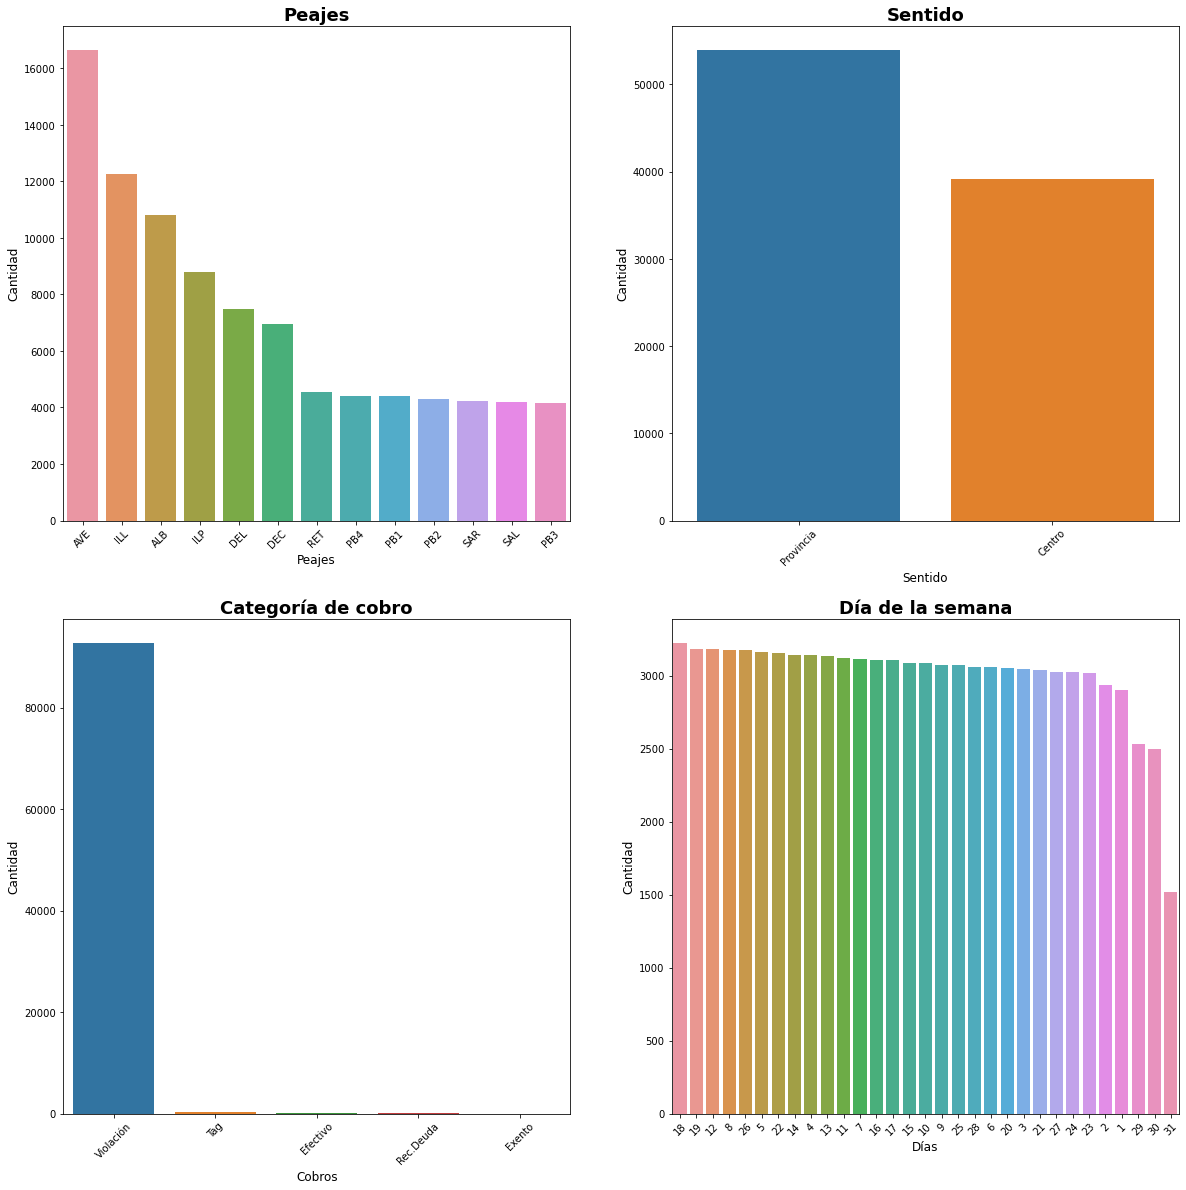

In [20]:
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.title("Peajes", fontsize = 18, fontweight="bold")
sns.countplot(data = d, x = "ID Peaje", order= d['ID Peaje'].value_counts().index)
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Peajes", fontsize = 12)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 12)

plt.subplot(2, 2, 2)
plt.title("Sentido", fontsize = 18, fontweight="bold")
sns.countplot(data = d, x = "Sentido", order= d['Sentido'].value_counts().index)
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Sentido", fontsize = 12)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 12)

plt.subplot(2, 2, 3)
plt.title("Categoría de cobro", fontsize = 18, fontweight="bold")
sns.countplot(data = d, x = "Tipo Cobro", order= d['Tipo Cobro'].value_counts().index)
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Cobros", fontsize = 12)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 12)

plt.subplot(2, 2, 4)
plt.title("Día de la semana", fontsize = 18, fontweight="bold")
sns.countplot(data = d, x = "Día de Fecha Operativa", order= d['Día de Fecha Operativa'].value_counts().index)
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Días", fontsize = 12)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 12)

Observamos que hay una clara relación de los datos de N/D con la categoría de cobro de Violación por lo que sería un nulo de tipo MNAR, es decir está casi totalmente ligada con el tipo de cobro de Violación.

In [21]:
d['Observacion'].unique()
d['Observacion'].value_counts()

Violación - Normal                  72919
Violación - Rebote                  11353
Violación - Repetitiva               4257
Violación - Via Liberada             3952
Tag - PosPago                         297
Violación - Vía Cerrada               262
Efectivo                               55
Tag - PosPago OCR                      28
Exento - Reglamento                     8
Paso en infracción con Multa LPR        8
Paso en Infracción                      7
Name: Observacion, dtype: int64

Observamos los datos de Observación dentro de nuestro dataset solo con N/D y observamos que la gran mayoría se divide en cuatro tipos de violación.

### **IMPUTACIÓN DE DATOS NULOS 2021**

In [22]:
d2 = data21_2[(data21_2['Observacion'] == 'Violación - Normal') | (data21_2['Observacion'] == 'Violación - Rebote') | (data21_2['Observacion'] == 'Violación - Repetitiva') | (data21_2['Observacion'] == 'Violación - Via Liberada')]
d2.shape

(212473, 10)

Separamos nuestro dataset original solo con los campos de violación contenidos en el dataset de N/D para poder utilizar un random forest para imputar. Para ellos queremos ver los comportamientos solamente con este tipo de observación que es el que nos interesa para la imputación.

In [23]:
d2.head()

Año de Fecha Operativa Cat Cobrada  Día de Fecha Operativa  Hora HH  \
25                    2021        Auto                       1        0   
58                    2021        Auto                       1        0   
61                    2021        Auto                       1        0   
62                    2021        Auto                       1        0   
64                    2021        Auto                       1        0   

   ID Peaje Mes de Fecha Operativa         Observacion    Sentido Tipo Cobro  \
25      AVE                  abril  Violación - Normal     Centro  Violación   
58      ILP                  abril  Violación - Normal     Centro  Violación   
61      PB2                  abril  Violación - Normal     Centro  Violación   
62      PB3                  abril  Violación - Normal  Provincia  Violación   
64      PB4                  abril  Violación - Normal     Centro  Violación   

    Pasos  
25      1  
58      1  
61      1  
62      1  
64      4

Observamos el dataset como nos queda.

In [24]:
N = d2.drop(['Año de Fecha Operativa'], axis = 1)
print(N['Cat Cobrada'].unique())
N.head()

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago doble Moto' 'Pesados 2 Ejes'
 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes' 'Pesados 6 Ejes']


Cat Cobrada  Día de Fecha Operativa  Hora HH ID Peaje  \
25        Auto                       1        0      AVE   
58        Auto                       1        0      ILP   
61        Auto                       1        0      PB2   
62        Auto                       1        0      PB3   
64        Auto                       1        0      PB4   

   Mes de Fecha Operativa         Observacion    Sentido Tipo Cobro  Pasos  
25                  abril  Violación - Normal     Centro  Violación      1  
58                  abril  Violación - Normal     Centro  Violación      1  
61                  abril  Violación - Normal     Centro  Violación      1  
62                  abril  Violación - Normal  Provincia  Violación      1  
64                  abril  Violación - Normal     Centro  Violación      4

Observamos todos datos en categoría cobrada y como nos queda el dataset haciendo drop del año. Esto lo hacemos al ser dato único en la columna.

In [25]:
N1= N.copy()

N1['Cat Cobrada'].replace(['Auto', 'Auto con trailer', 'Moto', 'Pago doble Moto', 'Pago Doble Auto'], 'Liviano', inplace = True)
N1['Cat Cobrada'].replace(['Pesados 2 Ejes', 'Pesados 3 Ejes', 'Pesados 4 Ejes', 'Pesados 5 Ejes', 'Pesados 6 Ejes', 'Pago Doble Auto con trailer / Pesado 2 Ejes'], 'Pesado', inplace = True)
N1['Cat Cobrada'].replace('N/D', np.nan, inplace = True)
print(N1.isnull().sum())
print(N1['Cat Cobrada'].unique())

Cat Cobrada               92481
Día de Fecha Operativa        0
Hora HH                       0
ID Peaje                      0
Mes de Fecha Operativa        0
Observacion                   0
Sentido                       0
Tipo Cobro                    0
Pasos                         0
dtype: int64
['Liviano' nan 'Pesado']


Reemplazamos los transportes livianos por liviano, los transportes pesados por pesado y los N/D por nulos. Observamos que se agregaron esos nulos en Categoría Cobrada reemplzando a los N/D.

In [26]:
print(N1['Tipo Cobro'].unique())
N2 = N1.drop(['Tipo Cobro'], axis = 1)

['Violación']


Observamos que el único dato en Tipo de Cobro es Violación, por lo que también la sacamos.

In [27]:
N2.head()

Cat Cobrada  Día de Fecha Operativa  Hora HH ID Peaje  \
25     Liviano                       1        0      AVE   
58     Liviano                       1        0      ILP   
61     Liviano                       1        0      PB2   
62     Liviano                       1        0      PB3   
64     Liviano                       1        0      PB4   

   Mes de Fecha Operativa         Observacion    Sentido  Pasos  
25                  abril  Violación - Normal     Centro      1  
58                  abril  Violación - Normal     Centro      1  
61                  abril  Violación - Normal     Centro      1  
62                  abril  Violación - Normal  Provincia      1  
64                  abril  Violación - Normal     Centro      4

Observamos como queda nuestro dataset de 2021

#### 1. ENCODEADO PARA IMPUTACION DE NULOS 2021

Para la imputación de nulos con Random Forest vamos a encodear nuestro dataset para que el algoritmo pueda leerlo mejor.

In [28]:
SinNulls = N2[pd.isnull(N2['Cat Cobrada']) == False]
ConNulls = N2[pd.isnull(N2['Cat Cobrada'])]

le = preprocessing.LabelEncoder()
le.fit(SinNulls['Cat Cobrada'])

le.classes_

array(['Liviano', 'Pesado'], dtype=object)

Para el encodeado separamos los nulos y lo ponemos en otro dataset "ConNulls" y tenemos otro dataset para encodear donde están nuestras categorías cobradas de Liviano y Pesado. 

In [29]:
le.transform(SinNulls['Cat Cobrada'])

array([0, 0, 0, ..., 1, 1, 1])

Hacemos el transform con un Label Encoder.

In [30]:
SinNulls['Cat'] = le.transform(SinNulls['Cat Cobrada'])
print(SinNulls['Cat'].unique())
N3 = SinNulls.append(ConNulls)
N4 = N3.drop(['Cat Cobrada'], axis = 1).reset_index(drop = True)
print(N4.isnull().sum())
N4.head()

[0 1]
Día de Fecha Operativa        0
Hora HH                       0
ID Peaje                      0
Mes de Fecha Operativa        0
Observacion                   0
Sentido                       0
Pasos                         0
Cat                       92481
dtype: int64


C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Día de Fecha Operativa  Hora HH ID Peaje Mes de Fecha Operativa  \
0                       1        0      AVE                  abril   
1                       1        0      ILP                  abril   
2                       1        0      PB2                  abril   
3                       1        0      PB3                  abril   
4                       1        0      PB4                  abril   

          Observacion    Sentido  Pasos  Cat  
0  Violación - Normal     Centro      1  0.0  
1  Violación - Normal     Centro      1  0.0  
2  Violación - Normal     Centro      1  0.0  
3  Violación - Normal  Provincia      1  0.0  
4  Violación - Normal     Centro      4  0.0

Hacemos el transform, lo ponemos como columna Cat y dropeamos la otra, también le hacemos el append de los nulos.

In [31]:
N4.Sentido.unique()

array(['Centro', 'Provincia'], dtype=object)

Observamos que en Sentido también hay dos datos, por lo que vamos a usar Label Encoder también.

In [32]:
N5 = N4.copy()

le = preprocessing.LabelEncoder()
le.fit(N5['Sentido'])
le.transform(N5['Sentido'])
N5['Sentido'] = le.transform(N5['Sentido'])
print(N5['Sentido'].unique())
N5.head()

[0 1]


Día de Fecha Operativa  Hora HH ID Peaje Mes de Fecha Operativa  \
0                       1        0      AVE                  abril   
1                       1        0      ILP                  abril   
2                       1        0      PB2                  abril   
3                       1        0      PB3                  abril   
4                       1        0      PB4                  abril   

          Observacion  Sentido  Pasos  Cat  
0  Violación - Normal        0      1  0.0  
1  Violación - Normal        0      1  0.0  
2  Violación - Normal        0      1  0.0  
3  Violación - Normal        1      1  0.0  
4  Violación - Normal        0      4  0.0

Hacemos lo mismo que con la categoría

In [33]:
N6 = N5.copy()

enc = OneHotEncoder()

enc.fit(N6[['ID Peaje']])
Peaje_transformed = enc.transform(N6[['ID Peaje']]).toarray()
pd.DataFrame(Peaje_transformed, columns=enc.categories_[0])
N7 = N6.join(pd.DataFrame(Peaje_transformed, columns=enc.categories_[0]))
N8 = N7.drop(['ID Peaje'], axis = 1)
N8.head()

Día de Fecha Operativa  Hora HH Mes de Fecha Operativa         Observacion  \
0                       1        0                  abril  Violación - Normal   
1                       1        0                  abril  Violación - Normal   
2                       1        0                  abril  Violación - Normal   
3                       1        0                  abril  Violación - Normal   
4                       1        0                  abril  Violación - Normal   

   Sentido  Pasos  Cat  ALB  AVE  DEC  DEL  ILL  ILP  PB1  PB2  PB3  PB4  RET  \
0        0      1  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1        0      1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2        0      1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3        1      1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
4        0      4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

   SAL  SAR  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0

Para los demás usamos OneHotEncoder al tener más de dos datos. Acá para los peajes.

In [34]:
enc.fit(N8[['Mes de Fecha Operativa']])
Mes_transformed = enc.transform(N8[['Mes de Fecha Operativa']]).toarray()
pd.DataFrame(Mes_transformed, columns=enc.categories_[0])
N9 = N8.join(pd.DataFrame(Mes_transformed, columns=enc.categories_[0]))
N10 = N9.drop(['Mes de Fecha Operativa'], axis = 1)
N10.head()

Día de Fecha Operativa  Hora HH         Observacion  Sentido  Pasos  Cat  \
0                       1        0  Violación - Normal        0      1  0.0   
1                       1        0  Violación - Normal        0      1  0.0   
2                       1        0  Violación - Normal        0      1  0.0   
3                       1        0  Violación - Normal        1      1  0.0   
4                       1        0  Violación - Normal        0      4  0.0   

   ALB  AVE  DEC  DEL  ...  PB4  RET  SAL  SAR  abril  enero  febrero  junio  \
0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0    1.0    0.0      0.0    0.0   
1  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0    1.0    0.0      0.0    0.0   
2  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0    1.0    0.0      0.0    0.0   
3  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0    1.0    0.0      0.0    0.0   
4  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0    1.0    0.0      0.0    0.0   

   marzo  mayo  
0    0.0   0.0  
1    0.0   0.0  
2    0.0   0.0  
3    0.0   0.0  
4    0.0   0.0  

[5 rows x 25 columns]

Hacemos lo mismo que para los peajes, pero acá para el mes.

In [35]:
enc.fit(N10[['Observacion']])
Obs_transformed = enc.transform(N7[['Observacion']]).toarray()
pd.DataFrame(Obs_transformed, columns=enc.categories_[0])
N11 = N10.join(pd.DataFrame(Obs_transformed, columns=enc.categories_[0]))
N12 = N11.drop(['Observacion'], axis = 1)
N12.head()

Día de Fecha Operativa  Hora HH  Sentido  Pasos  Cat  ALB  AVE  DEC  DEL  \
0                       1        0        0      1  0.0  0.0  1.0  0.0  0.0   
1                       1        0        0      1  0.0  0.0  0.0  0.0  0.0   
2                       1        0        0      1  0.0  0.0  0.0  0.0  0.0   
3                       1        0        1      1  0.0  0.0  0.0  0.0  0.0   
4                       1        0        0      4  0.0  0.0  0.0  0.0  0.0   

   ILL  ...  abril  enero  febrero  junio  marzo  mayo  Violación - Normal  \
0  0.0  ...    1.0    0.0      0.0    0.0    0.0   0.0                 1.0   
1  0.0  ...    1.0    0.0      0.0    0.0    0.0   0.0                 1.0   
2  0.0  ...    1.0    0.0      0.0    0.0    0.0   0.0                 1.0   
3  0.0  ...    1.0    0.0      0.0    0.0    0.0   0.0                 1.0   
4  0.0  ...    1.0    0.0      0.0    0.0    0.0   0.0                 1.0   

   Violación - Rebote  Violación - Repetitiva  Violación - Via Liberada  
0                 0.0                     0.0                       0.0  
1                 0.0                     0.0                       0.0  
2                 0.0                     0.0                       0.0  
3                 0.0                     0.0                       0.0  
4                 0.0                     0.0                       0.0  

[5 rows x 28 columns]

Hacemos lo mismo que para los demás, pero acá para Observación.

#### 2. ESCALADO DE DATOS de 2021

Para el escalado de datos vamos a usar aquellas columnas numéricas que no se dividen en 0 y 1.

In [36]:
N13 = N12[['Día de Fecha Operativa', 'Hora HH', 'Pasos']]
N13.head()

Día de Fecha Operativa  Hora HH  Pasos
0                       1        0      1
1                       1        0      1
2                       1        0      1
3                       1        0      1
4                       1        0      4

Estas son las columnas numéricas que no se dividen en 0 y 1.

In [37]:
scaler = StandardScaler()

scaler.fit(N13)

StandardScaler()

Importamos la librería de StandardScaler

In [38]:
scaler.fit_transform(N13)

array([[-1.6774309 , -1.9185981 , -0.4545828 ],
       [-1.6774309 , -1.9185981 , -0.4545828 ],
       [-1.6774309 , -1.9185981 , -0.4545828 ],
       ...,
       [ 1.69174316,  1.72165953, -0.4545828 ],
       [ 1.69174316,  1.72165953, -0.08338752],
       [ 1.69174316,  1.72165953, -0.18237293]])

Hacemos el transform y observamos como queda.

In [39]:
N14 = pd.DataFrame(scaler.fit_transform(N13), columns = N13.columns)
N14

Día de Fecha Operativa   Hora HH     Pasos
0                    -1.677431 -1.918598 -0.454583
1                    -1.677431 -1.918598 -0.454583
2                    -1.677431 -1.918598 -0.454583
3                    -1.677431 -1.918598 -0.454583
4                    -1.677431 -1.918598 -0.380344
...                        ...       ...       ...
212468                1.691743  1.721660  0.337300
212469                1.691743  1.721660 -0.009148
212470                1.691743  1.721660 -0.454583
212471                1.691743  1.721660 -0.083388
212472                1.691743  1.721660 -0.182373

[212473 rows x 3 columns]

Observamos como quedan estas tres columnas transformadas.

In [40]:
N15 = N12.drop(['Día de Fecha Operativa', 'Hora HH', 'Pasos'], axis = 1)
N15

Sentido  Cat  ALB  AVE  DEC  DEL  ILL  ILP  PB1  PB2  ...  abril  \
0             0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    1.0   
1             0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...    1.0   
2             0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...    1.0   
3             1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    1.0   
4             0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    1.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
212468        0  NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
212469        1  NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
212470        1  NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
212471        1  NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
212472        1  NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   

        enero  febrero  junio  marzo  mayo  Violación - Normal  \
0         0.0      0.0    0.0    0.0   0.0                 1.0   
1         0.0      0.0    0.0    0.0   0.0                 1.0   
2         0.0      0.0    0.0    0.0   0.0                 1.0   
3         0.0      0.0    0.0    0.0   0.0                 1.0   
4         0.0      0.0    0.0    0.0   0.0                 1.0   
...       ...      ...    ...    ...   ...                 ...   
212468    0.0      0.0    1.0    0.0   0.0                 1.0   
212469    0.0      0.0    1.0    0.0   0.0                 1.0   
212470    0.0      0.0    1.0    0.0   0.0                 0.0   
212471    0.0      0.0    1.0    0.0   0.0                 1.0   
212472    0.0      0.0    1.0    0.0   0.0                 1.0   

        Violación - Rebote  Violación - Repetitiva  Violación - Via Liberada  
0                      0.0                     0.0                       0.0  
1                      0.0                     0.0                       0.0  
2                      0.0                     0.0                       0.0  
3                      0.0                     0.0                       0.0  
4                      0.0                     0.0                       0.0  
...                    ...                     ...                       ...  
212468                 0.0                     0.0                       0.0  
212469                 0.0                     0.0                       0.0  
212470                 1.0                     0.0                       0.0  
212471                 0.0                     0.0                       0.0  
212472                 0.0                     0.0                       0.0  

[212473 rows x 25 columns]

Hacemos un drop de las columnas de nuestro dataset que no estaban escaladas.

In [41]:
N16 = N14.join(N15)
N16

Día de Fecha Operativa   Hora HH     Pasos  Sentido  Cat  ALB  AVE  \
0                    -1.677431 -1.918598 -0.454583        0  0.0  0.0  1.0   
1                    -1.677431 -1.918598 -0.454583        0  0.0  0.0  0.0   
2                    -1.677431 -1.918598 -0.454583        0  0.0  0.0  0.0   
3                    -1.677431 -1.918598 -0.454583        1  0.0  0.0  0.0   
4                    -1.677431 -1.918598 -0.380344        0  0.0  0.0  0.0   
...                        ...       ...       ...      ...  ...  ...  ...   
212468                1.691743  1.721660  0.337300        0  NaN  0.0  0.0   
212469                1.691743  1.721660 -0.009148        1  NaN  0.0  0.0   
212470                1.691743  1.721660 -0.454583        1  NaN  0.0  0.0   
212471                1.691743  1.721660 -0.083388        1  NaN  0.0  0.0   
212472                1.691743  1.721660 -0.182373        1  NaN  0.0  0.0   

        DEC  DEL  ILL  ...  abril  enero  febrero  junio  marzo  mayo  \
0       0.0  0.0  0.0  ...    1.0    0.0      0.0    0.0    0.0   0.0   
1       0.0  0.0  0.0  ...    1.0    0.0      0.0    0.0    0.0   0.0   
2       0.0  0.0  0.0  ...    1.0    0.0      0.0    0.0    0.0   0.0   
3       0.0  0.0  0.0  ...    1.0    0.0      0.0    0.0    0.0   0.0   
4       0.0  0.0  0.0  ...    1.0    0.0      0.0    0.0    0.0   0.0   
...     ...  ...  ...  ...    ...    ...      ...    ...    ...   ...   
212468  0.0  0.0  0.0  ...    0.0    0.0      0.0    1.0    0.0   0.0   
212469  0.0  0.0  0.0  ...    0.0    0.0      0.0    1.0    0.0   0.0   
212470  0.0  0.0  0.0  ...    0.0    0.0      0.0    1.0    0.0   0.0   
212471  0.0  0.0  0.0  ...    0.0    0.0      0.0    1.0    0.0   0.0   
212472  0.0  0.0  0.0  ...    0.0    0.0      0.0    1.0    0.0   0.0   

        Violación - Normal  Violación - Rebote  Violación - Repetitiva  \
0                      1.0                 0.0                     0.0   
1                      1.0                 0.0                     0.0   
2                      1.0                 0.0                     0.0   
3                      1.0                 0.0                     0.0   
4                      1.0                 0.0                     0.0   
...                    ...                 ...                     ...   
212468                 1.0                 0.0                     0.0   
212469                 1.0                 0.0                     0.0   
212470                 0.0                 1.0                     0.0   
212471                 1.0                 0.0                     0.0   
212472                 1.0                 0.0                     0.0   

        Violación - Via Liberada  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  
...                          ...  
212468                       0.0  
212469                       0.0  
212470                       0.0  
212471                       0.0  
212472                       0.0  

[212473 rows x 28 columns]

Observamos como queda nuestro dataset con los datos encodeados y escalados.

#### 3. USO DEL RANDOM FOREST PARA LA IMPUTACION DE DATOS FALTANTES

In [42]:
SinNulls16 = N16[pd.isnull(N16['Cat']) == False]
ConNulls16 = N16[pd.isnull(N16['Cat'])]

Separamos nuestro dataset en uno con nulos y otro sin

In [43]:
X1 = SinNulls16.drop(['Cat'], axis = 1)
y1 = SinNulls16['Cat']

X2 = ConNulls16.drop(['Cat'], axis = 1)
y2 = ConNulls16['Cat']

rfModel = RandomForestClassifier()
rfModel.fit(X1,y1)

generatedValues = rfModel.predict(X2)
print(generatedValues)

[0. 0. 0. ... 0. 0. 0.]


El dataset sin nulos va a ser nuestro train dataset y el dataset con nulos va a ser nuestro test dataset. Vamos a entrenar nuestro dataset sin nulos para hacer un predict en el dataset con nulos y generar los valores para nuestros nulos. Acá vemos nuestro valores generados.

In [44]:
ConNulls16['Cat'] = generatedValues
N17 = SinNulls16.append(ConNulls16)
N17.isnull().sum()

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Día de Fecha Operativa      0
Hora HH                     0
Pasos                       0
Sentido                     0
Cat                         0
ALB                         0
AVE                         0
DEC                         0
DEL                         0
ILL                         0
ILP                         0
PB1                         0
PB2                         0
PB3                         0
PB4                         0
RET                         0
SAL                         0
SAR                         0
abril                       0
enero                       0
febrero                     0
junio                       0
marzo                       0
mayo                        0
Violación - Normal          0
Violación - Rebote          0
Violación - Repetitiva      0
Violación - Via Liberada    0
dtype: int64

Reemplazamos los nulos del dataset con nulos por los valores generados. Luego hacemos un append de los dos datasets y observamos que ya no hay datos faltantes.

#### 4. DESESCALADO

Vamos a desescalar nuestro dataset para llevarlo al dataset como estaba antes

In [45]:
N18 = N17[['Día de Fecha Operativa', 'Hora HH', 'Pasos']]
N18.head()

Día de Fecha Operativa   Hora HH     Pasos
0               -1.677431 -1.918598 -0.454583
1               -1.677431 -1.918598 -0.454583
2               -1.677431 -1.918598 -0.454583
3               -1.677431 -1.918598 -0.454583
4               -1.677431 -1.918598 -0.380344

Observamos como están nuestras columnas escaladas

In [46]:
N19 = pd.DataFrame(scaler.inverse_transform(N18), columns = N18.columns)
N19.head()

Día de Fecha Operativa  Hora HH  Pasos
0                     1.0      0.0    1.0
1                     1.0      0.0    1.0
2                     1.0      0.0    1.0
3                     1.0      0.0    1.0
4                     1.0      0.0    4.0

Vemos los datos de estas tres columnas como estaban antes

In [47]:
N20 = N17.drop(['Día de Fecha Operativa', 'Hora HH', 'Pasos'], axis = 1)
N21 = N19.join(N20)
N21.head()

Día de Fecha Operativa  Hora HH  Pasos  Sentido  Cat  ALB  AVE  DEC  DEL  \
0                     1.0      0.0    1.0        0  0.0  0.0  1.0  0.0  0.0   
1                     1.0      0.0    1.0        0  0.0  0.0  0.0  0.0  0.0   
2                     1.0      0.0    1.0        0  0.0  0.0  0.0  0.0  0.0   
3                     1.0      0.0    1.0        1  0.0  0.0  0.0  0.0  0.0   
4                     1.0      0.0    4.0        0  0.0  0.0  0.0  0.0  0.0   

   ILL  ...  abril  enero  febrero  junio  marzo  mayo  Violación - Normal  \
0  0.0  ...    1.0    0.0      0.0    0.0    0.0   0.0                 1.0   
1  0.0  ...    1.0    0.0      0.0    0.0    0.0   0.0                 1.0   
2  0.0  ...    1.0    0.0      0.0    0.0    0.0   0.0                 1.0   
3  0.0  ...    1.0    0.0      0.0    0.0    0.0   0.0                 1.0   
4  0.0  ...    1.0    0.0      0.0    0.0    0.0   0.0                 1.0   

   Violación - Rebote  Violación - Repetitiva  Violación - Via Liberada  
0                 0.0                     0.0                       0.0  
1                 0.0                     0.0                       0.0  
2                 0.0                     0.0                       0.0  
3                 0.0                     0.0                       0.0  
4                 0.0                     0.0                       0.0  

[5 rows x 28 columns]

Vemos como queda el dataset desescalando estas tres columnas.

#### 5. DESENCODEADO

Vamos a hacer un desencodeado de las columnas encodeadas.

In [48]:
Peajes = N5['ID Peaje'].unique()
print(Peajes)

['AVE' 'ILP' 'PB2' 'PB3' 'PB4' 'SAL' 'SAR' 'ILL' 'PB1' 'DEC' 'ALB' 'DEL'
 'RET']


Vemos los peajes y los ponemos dentro de la variable peajes

In [49]:
N22 = N21[Peajes]
N22.head()

AVE  ILP  PB2  PB3  PB4  SAL  SAR  ILL  PB1  DEC  ALB  DEL  RET
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

Vemos los peajes encodeados del dataset.

In [50]:
N23 = N22.copy()
N23['ID Peaje'] = N23.idxmax(1)
N23.head()

AVE  ILP  PB2  PB3  PB4  SAL  SAR  ILL  PB1  DEC  ALB  DEL  RET ID Peaje
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      AVE
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      ILP
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      PB2
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      PB3
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      PB4

Ponemos todos los peajes en la columna de ID Peaje como estaba antes.

In [51]:
N24 = N21.drop(N21[Peajes], axis = 1)
N24['ID Peaje'] = N23['ID Peaje']
N24.head()

Día de Fecha Operativa  Hora HH  Pasos  Sentido  Cat  abril  enero  \
0                     1.0      0.0    1.0        0  0.0    1.0    0.0   
1                     1.0      0.0    1.0        0  0.0    1.0    0.0   
2                     1.0      0.0    1.0        0  0.0    1.0    0.0   
3                     1.0      0.0    1.0        1  0.0    1.0    0.0   
4                     1.0      0.0    4.0        0  0.0    1.0    0.0   

   febrero  junio  marzo  mayo  Violación - Normal  Violación - Rebote  \
0      0.0    0.0    0.0   0.0                 1.0                 0.0   
1      0.0    0.0    0.0   0.0                 1.0                 0.0   
2      0.0    0.0    0.0   0.0                 1.0                 0.0   
3      0.0    0.0    0.0   0.0                 1.0                 0.0   
4      0.0    0.0    0.0   0.0                 1.0                 0.0   

   Violación - Repetitiva  Violación - Via Liberada ID Peaje  
0                     0.0                       0.0      AVE  
1                     0.0                       0.0      ILP  
2                     0.0                       0.0      PB2  
3                     0.0                       0.0      PB3  
4                     0.0                       0.0      PB4

Vemos nuestro dataset sin los peajes encodeados y todos en una columna como estaba antes.

In [52]:
Meses = N5['Mes de Fecha Operativa'].unique()
N25 = N21[Meses]
N25['Mes de Fecha Operativa'] = N25.idxmax(1)
N25.head()

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


abril  marzo  mayo  febrero  enero  junio Mes de Fecha Operativa
0    1.0    0.0   0.0      0.0    0.0    0.0                  abril
1    1.0    0.0   0.0      0.0    0.0    0.0                  abril
2    1.0    0.0   0.0      0.0    0.0    0.0                  abril
3    1.0    0.0   0.0      0.0    0.0    0.0                  abril
4    1.0    0.0   0.0      0.0    0.0    0.0                  abril

Ponemos todos los meses en una columna como los peajes.

In [53]:
N26 = N24.drop(N24[Meses], axis = 1)
N26['Mes de Fecha Operativa'] = N25['Mes de Fecha Operativa']
N26.head()

Día de Fecha Operativa  Hora HH  Pasos  Sentido  Cat  Violación - Normal  \
0                     1.0      0.0    1.0        0  0.0                 1.0   
1                     1.0      0.0    1.0        0  0.0                 1.0   
2                     1.0      0.0    1.0        0  0.0                 1.0   
3                     1.0      0.0    1.0        1  0.0                 1.0   
4                     1.0      0.0    4.0        0  0.0                 1.0   

   Violación - Rebote  Violación - Repetitiva  Violación - Via Liberada  \
0                 0.0                     0.0                       0.0   
1                 0.0                     0.0                       0.0   
2                 0.0                     0.0                       0.0   
3                 0.0                     0.0                       0.0   
4                 0.0                     0.0                       0.0   

  ID Peaje Mes de Fecha Operativa  
0      AVE                  abril  
1      ILP                  abril  
2      PB2                  abril  
3      PB3                  abril  
4      PB4                  abril

Vemos nuestro dataset con la columna de meses desencodeada.

In [54]:
Observacion = N5['Observacion'].unique()
N27 = N21[Observacion]
N27['Observacion'] = N27.idxmax(1)
N27.head()

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Violación - Normal  Violación - Rebote  Violación - Repetitiva  \
0                 1.0                 0.0                     0.0   
1                 1.0                 0.0                     0.0   
2                 1.0                 0.0                     0.0   
3                 1.0                 0.0                     0.0   
4                 1.0                 0.0                     0.0   

   Violación - Via Liberada         Observacion  
0                       0.0  Violación - Normal  
1                       0.0  Violación - Normal  
2                       0.0  Violación - Normal  
3                       0.0  Violación - Normal  
4                       0.0  Violación - Normal

Hacemos los mismo con la columna de Observación

In [55]:
N28 = N26.drop(N26[Observacion], axis = 1)
N28['Observacion'] = N27['Observacion']
N28.head()

Día de Fecha Operativa  Hora HH  Pasos  Sentido  Cat ID Peaje  \
0                     1.0      0.0    1.0        0  0.0      AVE   
1                     1.0      0.0    1.0        0  0.0      ILP   
2                     1.0      0.0    1.0        0  0.0      PB2   
3                     1.0      0.0    1.0        1  0.0      PB3   
4                     1.0      0.0    4.0        0  0.0      PB4   

  Mes de Fecha Operativa         Observacion  
0                  abril  Violación - Normal  
1                  abril  Violación - Normal  
2                  abril  Violación - Normal  
3                  abril  Violación - Normal  
4                  abril  Violación - Normal

Vemos la columna de Observación en nuestro dataset de nuevo.

In [56]:
N29 = N28.copy()
N29.replace({'Sentido' : { 0 : "Centro", 1 : "Provincia"}}, inplace = True)
N29.replace({'Cat' : { 0.0 : "Liviano", 1 : "Pesado"}}, inplace = True)
N29.head()

Día de Fecha Operativa  Hora HH  Pasos    Sentido      Cat ID Peaje  \
0                     1.0      0.0    1.0     Centro  Liviano      AVE   
1                     1.0      0.0    1.0     Centro  Liviano      ILP   
2                     1.0      0.0    1.0     Centro  Liviano      PB2   
3                     1.0      0.0    1.0  Provincia  Liviano      PB3   
4                     1.0      0.0    4.0     Centro  Liviano      PB4   

  Mes de Fecha Operativa         Observacion  
0                  abril  Violación - Normal  
1                  abril  Violación - Normal  
2                  abril  Violación - Normal  
3                  abril  Violación - Normal  
4                  abril  Violación - Normal

Desencodeamos también las columnas Sentido y Cat reemplazando los valores.

In [57]:
N30 = N29.copy()
dnew = d2.copy()
dnew2 = dnew.reset_index(drop = True)
N30["Año de Fecha Operativa"] = dnew2["Año de Fecha Operativa"]
N30["Tipo Cobro"] = dnew2["Tipo Cobro"]
N30['Cat Cobrada'] = N30['Cat']
N31 = N30.drop(['Cat'], axis = 1)
print(N31.shape)
N31.head()

(212473, 10)


Día de Fecha Operativa  Hora HH  Pasos    Sentido ID Peaje  \
0                     1.0      0.0    1.0     Centro      AVE   
1                     1.0      0.0    1.0     Centro      ILP   
2                     1.0      0.0    1.0     Centro      PB2   
3                     1.0      0.0    1.0  Provincia      PB3   
4                     1.0      0.0    4.0     Centro      PB4   

  Mes de Fecha Operativa         Observacion  Año de Fecha Operativa  \
0                  abril  Violación - Normal                    2021   
1                  abril  Violación - Normal                    2021   
2                  abril  Violación - Normal                    2021   
3                  abril  Violación - Normal                    2021   
4                  abril  Violación - Normal                    2021   

  Tipo Cobro Cat Cobrada  
0  Violación     Liviano  
1  Violación     Liviano  
2  Violación     Liviano  
3  Violación     Liviano  
4  Violación     Liviano

Le agregamos de nuevo las columnas que le habíamos sacado de 'Año de fecha Operativa' y 'Tipo de Cobro'

In [58]:
data21N = data21_2[~data21_2.Observacion.isin(['Violación - Normal', 'Violación - Rebote', 'Violación - Repetitiva', 'Violación - Via Liberada'])]
data21N['Cat Cobrada'].replace(['Auto', 'Auto con trailer', 'Moto', 'Pago doble Moto', 'Pago Doble Auto'], 'Liviano', inplace = True)
data21N['Cat Cobrada'].replace(['Pesados 2 Ejes', 'Pesados 3 Ejes', 'Pesados 4 Ejes', 'Pesados 5 Ejes', 'Pesados 6 Ejes', 'Pago Doble Auto con trailer / Pesado 2 Ejes'], 'Pesado', inplace = True)
print(data21N['Observacion'].unique())
data21N.head()

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\pandas\core\generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


['Efectivo' 'Mercado Pago' 'Mercado Pago OCR'
 'Paso en infracción con Multa LPR' 'Tag - PosPago' 'Tag - PosPago OCR'
 'Exento - Reglamento' 'Paso en Infracción' 'T.Magnética Disc.'
 'Exento - Otros motivos' 'Tag - Exento' 'Exento - Demora en cobro'
 'Tag - PrePago OCR' 'Paso en Infracción con Multa'
 'Metrobus no hab. TAG pospago' 'Metrobus no hab. OCR pospago'
 'Metrobus no hab. TAG Mercado Pago' 'Paso a facturar - (colectivo)'
 'Metrobus no hab. OCR Mercado Pago' 'Tag - PrePago'
 'Violación - Vía Cerrada' 'Metrobus no hab. TAG prepago'
 'Metrobus no hab. OCR prepago' 'Obs CPP']


Año de Fecha Operativa Cat Cobrada  Día de Fecha Operativa  Hora HH  \
0                    2021     Liviano                       1        0   
1                    2021     Liviano                       1        0   
2                    2021     Liviano                       1        0   
3                    2021     Liviano                       1        0   
4                    2021     Liviano                       1        0   

  ID Peaje Mes de Fecha Operativa                       Observacion  \
0      ALB                  abril                          Efectivo   
1      ALB                  abril                      Mercado Pago   
2      ALB                  abril                  Mercado Pago OCR   
3      ALB                  abril  Paso en infracción con Multa LPR   
4      ALB                  abril                     Tag - PosPago   

     Sentido    Tipo Cobro  Pasos  
0  Provincia      Efectivo      7  
1  Provincia  Mercado Pago      4  
2     Centro  Mercado Pago      1  
3  Provincia     Rec.Deuda      1  
4     Centro           Tag     19

Este es el dataset original reemplazando la Categoría cobrada por Liviano y Pesado y sacando los datos del dataset en el cual imputamos los nulos.

In [59]:
data21N1 = data21N.append(N31)
print(data21_2.shape)
print(data21N.shape)
print(data21N1.shape)
data21N1.head()

(1336085, 10)
(1123612, 10)
(1336085, 10)


Año de Fecha Operativa Cat Cobrada  Día de Fecha Operativa  Hora HH  \
0                    2021     Liviano                     1.0      0.0   
1                    2021     Liviano                     1.0      0.0   
2                    2021     Liviano                     1.0      0.0   
3                    2021     Liviano                     1.0      0.0   
4                    2021     Liviano                     1.0      0.0   

  ID Peaje Mes de Fecha Operativa                       Observacion  \
0      ALB                  abril                          Efectivo   
1      ALB                  abril                      Mercado Pago   
2      ALB                  abril                  Mercado Pago OCR   
3      ALB                  abril  Paso en infracción con Multa LPR   
4      ALB                  abril                     Tag - PosPago   

     Sentido    Tipo Cobro  Pasos  
0  Provincia      Efectivo    7.0  
1  Provincia  Mercado Pago    4.0  
2     Centro  Mercado Pago    1.0  
3  Provincia     Rec.Deuda    1.0  
4     Centro           Tag   19.0

Unimos los dos datasets, el primero sin los datos del dataset en el que imputamos los nulos y el dataset en el cual imputamos los nulos.

In [60]:
data21N2 = data21N1[data21N1['Cat Cobrada'] == 'N/D']
data21N2.shape

(665, 10)

Vemos los N/D que nos quedaron que son todos los que no eran violación

In [61]:
data21N3 = data21N1[data21N1['Cat Cobrada'] != 'N/D']

Al ser muy pocos los datos de N/D que nos quedaron los vamos a sacar.

### TRATAMIENTO DATASET 2020

Vamos a hacer el mismo tratamiento de nulos del dataset 2021 para el 2020.

In [62]:
data20_2 = data_2020.copy()
print(data20_2.shape)
data20_2.head()

(2533743, 13)


periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
0   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
1   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
2   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
3   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
4   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

   hora_fin estacion tipo_vehiculo forma_pago  \
0       1.0  ALBERDI          Auto   Efectivo   
1       1.0  ALBERDI          Auto   Efectivo   
2       1.0  ALBERDI          Auto  Rec.Deuda   
3       1.0  ALBERDI          Auto  Rec.Deuda   
4       1.0  ALBERDI          Auto  Rec.Deuda   

                        observacion    sentido  cantidad_pasos  
0                          Efectivo     Centro            24.0  
1                          Efectivo  Provincia            80.0  
2                Paso en Infracción  Provincia             1.0  
3  Paso en infracción con Multa LPR     Centro             1.0  
4  Paso en infracción con Multa LPR  Provincia             1.0

Vemos como es el dataset del 2020.

In [63]:
data20_2f = data20_2[data20_2.duplicated(keep= 'first')]
print(data20_2f.shape)

(10, 13)


Vemos los duplicados del dataset y vemos que son 10.

In [64]:
data20_2NF = data20_2.drop_duplicates()
data20_3f = data20_2NF[data20_2NF.duplicated(keep= 'first')]
print(data20_3f.shape)

(0, 13)


Hacemos un drop de los duplicados.

In [65]:
data20_3f.isnull().sum()

periodo           0.0
fecha             0.0
mes               0.0
dia               0.0
dia_fecha         0.0
hora_inicio       0.0
hora_fin          0.0
estacion          0.0
tipo_vehiculo     0.0
forma_pago        0.0
observacion       0.0
sentido           0.0
cantidad_pasos    0.0
dtype: float64

Vemos los nulos del dataset de 2020.

In [66]:
print(data20_2NF['tipo_vehiculo'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']


Observamos que en la columna de 'tipo_vehiculo' aparece también ese N/D.

### EXPLORACION DE NULOS DE 2020

In [67]:
d20 = data20_2[data20_2['tipo_vehiculo'] == 'N/D']
print("Cantidad de datos con N/D:", d20.shape[0])
print("Cantidad de datos totales:", data20_2.shape[0])
print("Porcentaje de datos de N/D:", d20.shape[0] * 100/data20_2.shape[0], "%")

Cantidad de datos con N/D: 207407
Cantidad de datos totales: 2533743
Porcentaje de datos de N/D: 8.185794691884693 %


Vemos el porcentaje de N/D en el dataset

Text(0.5, 0, 'estación')

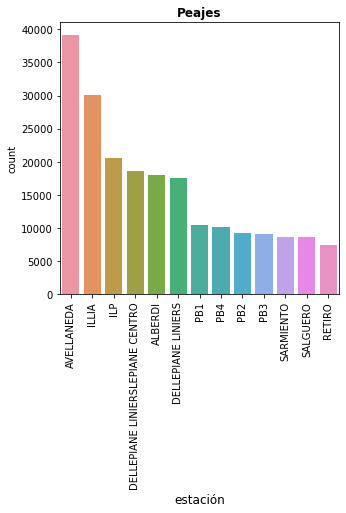

In [68]:
plt.figure(figsize=(5,5))
plt.title("Peajes", fontsize = 12, fontweight="bold")
sns.countplot(data = d20, x = "estacion", order= d20['estacion'].value_counts().index)
plt.xticks(rotation = 90, fontsize = 10)
plt.xlabel("estación", fontsize = 12)

Observamos los N/D del 2020 por estación.

Text(0, 0.5, 'Cantidad')

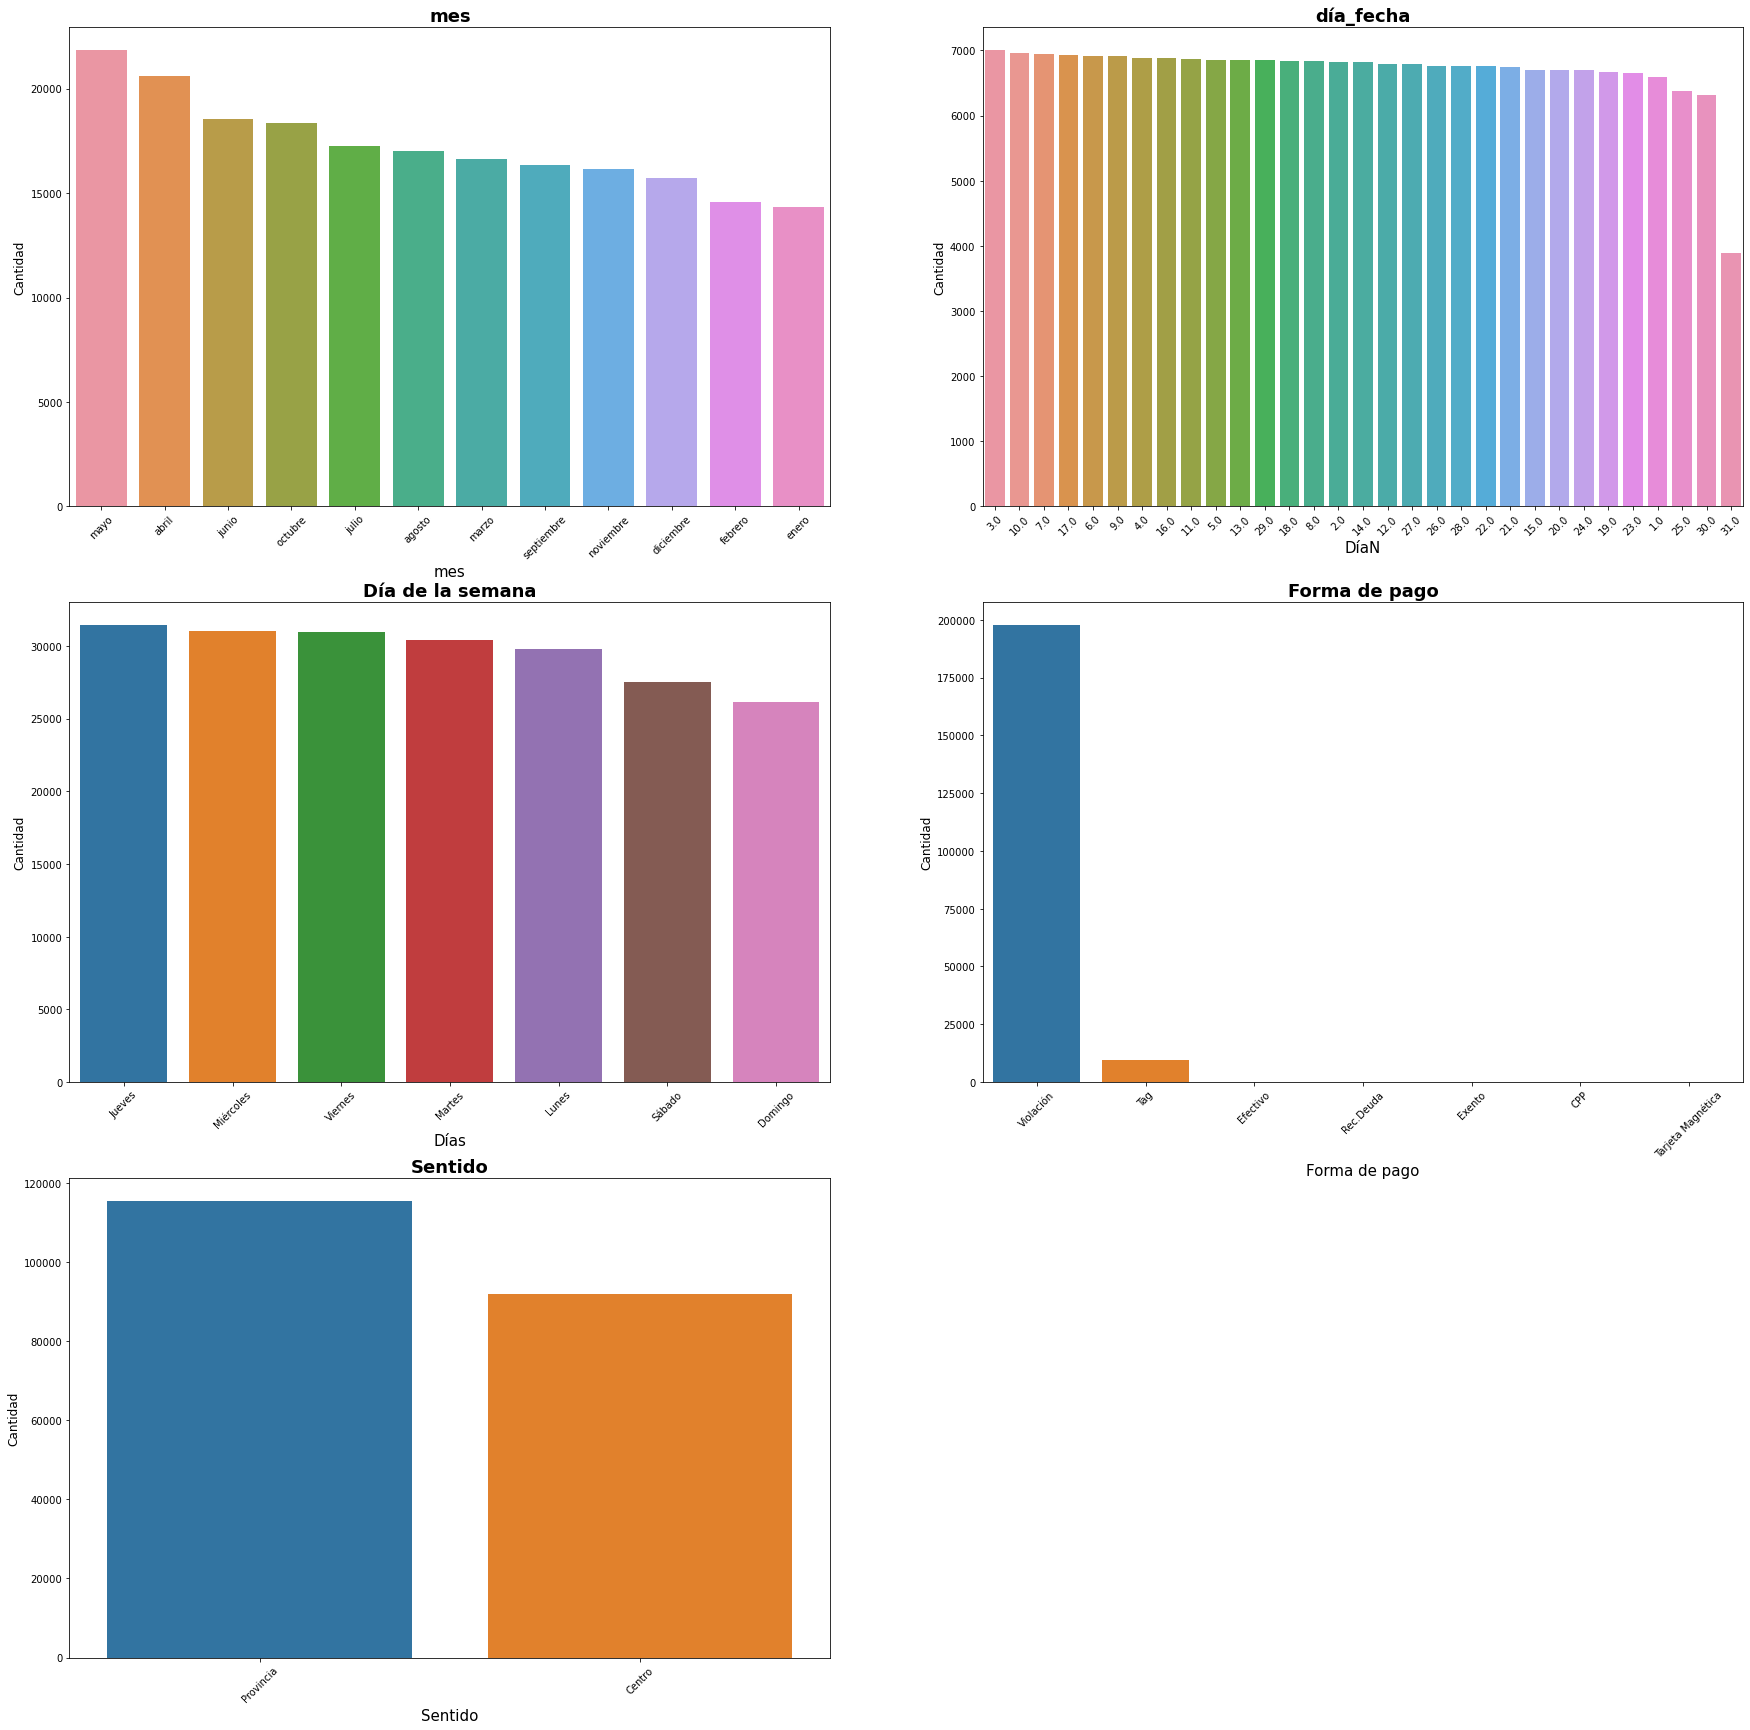

In [69]:
plt.figure(figsize=(30,30))

plt.subplot(3, 2, 1)
plt.title("mes", fontsize = 18, fontweight="bold")
sns.countplot(data = d20, x = "mes", order= d20['mes'].value_counts().index)
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("mes", fontsize = 15,)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 12)

plt.subplot(3, 2, 2)
plt.title("día_fecha", fontsize = 18, fontweight="bold")
sns.countplot(data = d20, x = "dia_fecha", order= d20['dia_fecha'].value_counts().index)
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("DíaN", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 12)

plt.subplot(3, 2, 3)
plt.title("Día de la semana", fontsize = 18, fontweight="bold")
sns.countplot(data = d20, x = "dia", order= d20['dia'].value_counts().index)
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Días", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 12)

plt.subplot(3, 2, 4)
plt.title("Forma de pago", fontsize = 18, fontweight="bold")
sns.countplot(data = d20, x = "forma_pago", order= d20['forma_pago'].value_counts().index)
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Forma de pago", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 12)

plt.subplot(3, 2, 5)
plt.title("Sentido", fontsize = 18, fontweight="bold")
sns.countplot(data = d20, x = "sentido", order= d20['sentido'].value_counts().index)
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Sentido", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 12)

Observamos la cantidad de datos con N/D para mes, número de día, día, forma de pago y sentido. Observamos que la enorme mayoría se encuentra en violación.

In [70]:
d20['observacion'].unique()
d20['observacion'].value_counts()

Violación - Normal                  139569
Violación - Vía Cerrada              23331
Violación - Rebote                   16220
Violación - Repetitiva               10592
Tag - PosPago                         8528
Violación - Via Liberada              7910
Tag - PosPago OCR                      959
Efectivo                               136
Paso en infracción con Multa LPR        67
Exento - Reglamento                     60
Paso en Infracción                      20
Exento - Otros motivos                   9
Obs CPP                                  2
Tag - PrePago                            1
Exento - Demora en cobro                 1
Metrobus no hab. TAG pospago             1
T.Magnética Disc.                        1
Name: observacion, dtype: int64

Obervamos los valores en observación y vemos que también la gran mayoría se encuentran en violación y algunos en TAG.

### IMPUTACIÓN DE DATOS NULOS 2020

Vamos a impuar los datos del 2020 de la misma manera que el 2021, con un RandomForestClassifier. 

In [71]:
d20_1 = data20_2[(data20_2['observacion'] == 'Violación - Normal') | (data20_2['observacion'] == 'Violación - Rebote') | (data20_2['observacion'] == 'Violación - Repetitiva') | (data20_2['observacion'] == 'Violación - Via Liberada') | (data20_2['observacion'] == 'Violación - Vía Cerrada') | (data20_2['observacion'] == 'Tag - PosPago')]
N20 = d20_1.drop(['periodo', 'fecha', 'hora_inicio'], axis = 1)
print(N20['forma_pago'].unique())
print(N20['tipo_vehiculo'].unique())
d20_1.head()

['Tag' 'Violación']
['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago doble Moto' 'Pesados 2 Ejes'
 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes' 'Pesados 6 Ejes'
 'Pago Doble Auto' 'Pago Doble Auto con trailer / Pesado 2 Ejes']


periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
6    2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
7    2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
21   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
22   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
29   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

    hora_fin    estacion tipo_vehiculo forma_pago         observacion  \
6        1.0     ALBERDI          Auto        Tag       Tag - PosPago   
7        1.0     ALBERDI          Auto        Tag       Tag - PosPago   
21       1.0  AVELLANEDA          Auto        Tag       Tag - PosPago   
22       1.0  AVELLANEDA          Auto        Tag       Tag - PosPago   
29       1.0  AVELLANEDA          Auto  Violación  Violación - Normal   

      sentido  cantidad_pasos  
6      Centro             9.0  
7   Provincia            56.0  
21     Centro           361.0  
22  Provincia           248.0  
29     Centro             3.0

Vamos a dejar un dataset solo con los tipos de violación de N/D y los TAG pospago.

In [72]:
N20_1= N20.copy()

N20_1['tipo_vehiculo'].replace(['Auto', 'Auto con trailer', 'Moto', 'Pago doble Moto', 'Pago Doble Auto'], 'Liviano', inplace = True)
N20_1['tipo_vehiculo'].replace(['Pesados 2 Ejes', 'Pesados 3 Ejes', 'Pesados 4 Ejes', 'Pesados 5 Ejes', 'Pesados 6 Ejes', 'Pago Doble Auto con trailer / Pesado 2 Ejes'], 'Pesado', inplace = True)
N20_1['tipo_vehiculo'].replace('N/D', np.nan, inplace = True)
print(N20_1.isnull().sum())
print(N20_1['tipo_vehiculo'].unique())

mes                    0
dia                    0
dia_fecha              0
hora_fin               0
estacion               0
tipo_vehiculo     206150
forma_pago             0
observacion            0
sentido                0
cantidad_pasos         0
dtype: int64
['Liviano' nan 'Pesado']


Reemplazamos los vehiculos livianos por liviano y los pesados por pesado. También reemplzamos los N/D por nulos.

#### 1. ENCODEADO PARA IMPUTACION DE NULOS 2020

Vamos a utilizar el mismo encodeado que usamos para el 2021.

In [73]:
print(N20_1['tipo_vehiculo'].unique())
print(N20_1['forma_pago'].unique())
print(N20_1['sentido'].unique())

['Liviano' nan 'Pesado']
['Tag' 'Violación']
['Centro' 'Provincia']


Vemos las tres columnas con solo dos valores para el encodeado.

In [74]:
SinNulls20 = N20_1[pd.isnull(N20_1['tipo_vehiculo']) == False]
ConNulls20 = N20_1[pd.isnull(N20_1['tipo_vehiculo'])]

le = preprocessing.LabelEncoder()
le.fit(SinNulls20['tipo_vehiculo'])

SinNulls20['Cat'] = le.transform(SinNulls20['tipo_vehiculo'])

N20_3 = SinNulls20.append(ConNulls20)
N20_4 = N20_3.drop(['tipo_vehiculo'], axis = 1).reset_index(drop = True)

le.fit(N20_4['sentido'])
le.transform(N20_4['sentido'])
N20_4['sentido'] = le.transform(N20_4['sentido'])

le.fit(N20_4['forma_pago'])
le.transform(N20_4['forma_pago'])
N20_4['forma_pago'] = le.transform(N20_4['forma_pago'])

print("Categorías encodeadas de categoría: ",SinNulls20['Cat'].unique())
print("Categorías encodeadas de sentido: ", N20_4['sentido'].unique())
print("Categorías encodeadas de forma de pago: ",N20_4['forma_pago'].unique(), "\n")

printmd("**Cantidad de nulos:**")
print(N20_4.isnull().sum(), "\n")
      
N20_4.head()

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Categorías encodeadas de categoría:  [0 1]
Categorías encodeadas de sentido:  [0 1]
Categorías encodeadas de forma de pago:  [0 1] 



**Cantidad de nulos:**

mes                    0
dia                    0
dia_fecha              0
hora_fin               0
estacion               0
forma_pago             0
observacion            0
sentido                0
cantidad_pasos         0
Cat               206150
dtype: int64 



mes        dia  dia_fecha  hora_fin    estacion  forma_pago  \
0  enero  Miércoles        1.0       1.0     ALBERDI           0   
1  enero  Miércoles        1.0       1.0     ALBERDI           0   
2  enero  Miércoles        1.0       1.0  AVELLANEDA           0   
3  enero  Miércoles        1.0       1.0  AVELLANEDA           0   
4  enero  Miércoles        1.0       1.0  AVELLANEDA           1   

          observacion  sentido  cantidad_pasos  Cat  
0       Tag - PosPago        0             9.0  0.0  
1       Tag - PosPago        1            56.0  0.0  
2       Tag - PosPago        0           361.0  0.0  
3       Tag - PosPago        1           248.0  0.0  
4  Violación - Normal        0             3.0  0.0

Ponemos nuestros datos encodeados de tipo_vehiculo en la columna Cat. Observamos la columna de cat nueva, la del sentido y forma de pago encodeadas, la cantidad de nulos por haber encodeado la columna de tipo de vehiculos y el dataset como queda con las columnas encodeadas.

In [75]:
N20_5 = N20_4.copy()

enc = OneHotEncoder()

enc.fit(N20_5[['estacion']])
Peaje_transformed = enc.transform(N20_5[['estacion']]).toarray()
pd.DataFrame(Peaje_transformed, columns=enc.categories_[0])
N20_6 = N20_5.join(pd.DataFrame(Peaje_transformed, columns=enc.categories_[0]))
N20_7 = N20_6.drop(['estacion'], axis = 1)

enc.fit(N20_7[['mes']])
Mes_transformed = enc.transform(N20_7[['mes']]).toarray()
pd.DataFrame(Mes_transformed, columns=enc.categories_[0])
N20_8 = N20_7.join(pd.DataFrame(Mes_transformed, columns=enc.categories_[0]))
N20_9 = N20_8.drop(['mes'], axis = 1)

enc.fit(N20_9[['dia']])
Mes_transformed = enc.transform(N20_9[['dia']]).toarray()
pd.DataFrame(Mes_transformed, columns=enc.categories_[0])
N20_10 = N20_9.join(pd.DataFrame(Mes_transformed, columns=enc.categories_[0]))
N20_11 = N20_10.drop(['dia'], axis = 1)

enc.fit(N20_11[['observacion']])
Mes_transformed = enc.transform(N20_11[['observacion']]).toarray()
pd.DataFrame(Mes_transformed, columns=enc.categories_[0])
N20_12 = N20_11.join(pd.DataFrame(Mes_transformed, columns=enc.categories_[0]))
N20_13 = N20_12.drop(['observacion'], axis = 1)

N20_13.head()

dia_fecha  hora_fin  forma_pago  sentido  cantidad_pasos  Cat  ALBERDI  \
0        1.0       1.0           0        0             9.0  0.0      1.0   
1        1.0       1.0           0        1            56.0  0.0      1.0   
2        1.0       1.0           0        0           361.0  0.0      0.0   
3        1.0       1.0           0        1           248.0  0.0      0.0   
4        1.0       1.0           1        0             3.0  0.0      0.0   

   AVELLANEDA  DELLEPIANE LINIERS  DELLEPIANE LINIERSLEPIANE CENTRO  ...  \
0         0.0                 0.0                               0.0  ...   
1         0.0                 0.0                               0.0  ...   
2         1.0                 0.0                               0.0  ...   
3         1.0                 0.0                               0.0  ...   
4         1.0                 0.0                               0.0  ...   

   Martes  Miércoles  Sábado  Viernes  Tag - PosPago  Violación - Normal  \
0     0.0        1.0     0.0      0.0            1.0                 0.0   
1     0.0        1.0     0.0      0.0            1.0                 0.0   
2     0.0        1.0     0.0      0.0            1.0                 0.0   
3     0.0        1.0     0.0      0.0            1.0                 0.0   
4     0.0        1.0     0.0      0.0            0.0                 1.0   

   Violación - Rebote  Violación - Repetitiva  Violación - Via Liberada  \
0                 0.0                     0.0                       0.0   
1                 0.0                     0.0                       0.0   
2                 0.0                     0.0                       0.0   
3                 0.0                     0.0                       0.0   
4                 0.0                     0.0                       0.0   

   Violación - Vía Cerrada  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  

[5 rows x 44 columns]

Observamos las columnas encodeadas con OneHotEncoder de estacion, mes, dia y observación. 

#### 2. ESCALADO DE DATOS de 2020

In [76]:
scaler = StandardScaler()

N20_14 = N20_13[['dia_fecha', 'hora_fin', 'cantidad_pasos']]

scaler.fit(N20_14)

N20_15 = pd.DataFrame(scaler.fit_transform(N20_14), columns = N20_14.columns)

N20_16 = N20_13.drop(['dia_fecha', 'hora_fin', 'cantidad_pasos'], axis = 1)

N20_17 = N20_15.join(N20_16)

N20_17.head()

dia_fecha  hora_fin  cantidad_pasos  forma_pago  sentido  Cat  ALBERDI  \
0  -1.671975 -1.716889       -0.216419           0        0  0.0      1.0   
1  -1.671975 -1.716889        0.059980           0        1  0.0      1.0   
2  -1.671975 -1.716889        1.853633           0        0  0.0      0.0   
3  -1.671975 -1.716889        1.189099           0        1  0.0      0.0   
4  -1.671975 -1.716889       -0.251704           1        0  0.0      0.0   

   AVELLANEDA  DELLEPIANE LINIERS  DELLEPIANE LINIERSLEPIANE CENTRO  ...  \
0         0.0                 0.0                               0.0  ...   
1         0.0                 0.0                               0.0  ...   
2         1.0                 0.0                               0.0  ...   
3         1.0                 0.0                               0.0  ...   
4         1.0                 0.0                               0.0  ...   

   Martes  Miércoles  Sábado  Viernes  Tag - PosPago  Violación - Normal  \
0     0.0        1.0     0.0      0.0            1.0                 0.0   
1     0.0        1.0     0.0      0.0            1.0                 0.0   
2     0.0        1.0     0.0      0.0            1.0                 0.0   
3     0.0        1.0     0.0      0.0            1.0                 0.0   
4     0.0        1.0     0.0      0.0            0.0                 1.0   

   Violación - Rebote  Violación - Repetitiva  Violación - Via Liberada  \
0                 0.0                     0.0                       0.0   
1                 0.0                     0.0                       0.0   
2                 0.0                     0.0                       0.0   
3                 0.0                     0.0                       0.0   
4                 0.0                     0.0                       0.0   

   Violación - Vía Cerrada  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  

[5 rows x 44 columns]

Usamos el StandarScaler para las columnas de dia-fecha, hora_fin y cantidad_pasos y vemos como queda.

#### 3. USO DEL RANDOM FOREST PARA LA IMPUTACION DE DATOS FALTANTES

In [77]:
SinNulls20_17 = N20_17[pd.isnull(N20_17['Cat']) == False]
ConNulls20_17 = N20_17[pd.isnull(N20_17['Cat'])]

X1 = SinNulls20_17.drop(['Cat'], axis = 1)
y1 = SinNulls20_17['Cat']

X2 = ConNulls20_17.drop(['Cat'], axis = 1)
y2 = ConNulls20_17['Cat']

rfModel = RandomForestClassifier()
rfModel.fit(X1,y1)

generatedValues = rfModel.predict(X2)

ConNulls20_17['Cat'] = generatedValues
N20_18 = SinNulls20_17.append(ConNulls20_17)
N20_18.isnull().sum()

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


dia_fecha                           0
hora_fin                            0
cantidad_pasos                      0
forma_pago                          0
sentido                             0
Cat                                 0
ALBERDI                             0
AVELLANEDA                          0
DELLEPIANE LINIERS                  0
DELLEPIANE LINIERSLEPIANE CENTRO    0
ILLIA                               0
ILP                                 0
PB1                                 0
PB2                                 0
PB3                                 0
PB4                                 0
RETIRO                              0
SALGUERO                            0
SARMIENTO                           0
abril                               0
agosto                              0
diciembre                           0
enero                               0
febrero                             0
julio                               0
junio                               0
marzo       

Usamos el RandomForestClassifier y observamos que ya no hay nulos.

#### 4. DESESCALADO

In [78]:
N20_19 = N20_18[['dia_fecha', 'hora_fin', 'cantidad_pasos']]

N20_20 = pd.DataFrame(scaler.inverse_transform(N20_19), columns = N20_19.columns)

N20_21 = N20_18.drop(['dia_fecha', 'hora_fin', 'cantidad_pasos'], axis = 1)
N20_22 = N20_21.join(N20_20)
N20_22.head()

forma_pago  sentido  Cat  ALBERDI  AVELLANEDA  DELLEPIANE LINIERS  \
0           0        0  0.0      1.0         0.0                 0.0   
1           0        1  0.0      1.0         0.0                 0.0   
2           0        0  0.0      0.0         1.0                 0.0   
3           0        1  0.0      0.0         1.0                 0.0   
4           1        0  0.0      0.0         1.0                 0.0   

   DELLEPIANE LINIERSLEPIANE CENTRO  ILLIA  ILP  PB1  ...  Viernes  \
0                               0.0    0.0  0.0  0.0  ...      0.0   
1                               0.0    0.0  0.0  0.0  ...      0.0   
2                               0.0    0.0  0.0  0.0  ...      0.0   
3                               0.0    0.0  0.0  0.0  ...      0.0   
4                               0.0    0.0  0.0  0.0  ...      0.0   

   Tag - PosPago  Violación - Normal  Violación - Rebote  \
0            1.0                 0.0                 0.0   
1            1.0                 0.0                 0.0   
2            1.0                 0.0                 0.0   
3            1.0                 0.0                 0.0   
4            0.0                 1.0                 0.0   

   Violación - Repetitiva  Violación - Via Liberada  Violación - Vía Cerrada  \
0                     0.0                       0.0                      0.0   
1                     0.0                       0.0                      0.0   
2                     0.0                       0.0                      0.0   
3                     0.0                       0.0                      0.0   
4                     0.0                       0.0                      0.0   

   dia_fecha  hora_fin  cantidad_pasos  
0        1.0       1.0             9.0  
1        1.0       1.0            56.0  
2        1.0       1.0           361.0  
3        1.0       1.0           248.0  
4        1.0       1.0             3.0  

[5 rows x 44 columns]

Hacemos desecalado para las columnas de dia_fecha, hora_fin y cantidad de pasos y observamos como queda.

#### 5. DESENCODEADO

In [79]:
Peajes = N20_4['estacion'].unique()
N20_23 = N20_22[Peajes]
N20_23['estacion'] = N20_23.idxmax(1)

N20_24 = N20_22.drop(N20_22[Peajes], axis = 1)
N20_24['estacion'] = N20_23['estacion']

Meses = N20_4['mes'].unique()
N20_25 = N20_24[Meses]
N20_25['mes'] = N20_25.idxmax(1)

N20_26 = N20_24.drop(N20_24[Meses], axis = 1)
N20_26['mes'] = N20_25['mes']

Observacion = N20_4['observacion'].unique()
N20_27 = N20_26[Observacion]
N20_27['observacion'] = N20_27.idxmax(1)

N20_28 = N20_26.drop(N20_26[Observacion], axis = 1)
N20_28['observacion'] = N20_27['observacion']

dias = N20_4['dia'].unique()
N20_29 = N20_28[dias]
N20_29['dia'] = N20_29.idxmax(1)

N20_30 = N20_28.drop(N20_28[dias], axis = 1)
N20_30['dia'] = N20_29['dia']

N20_30.head()

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


forma_pago  sentido  Cat  dia_fecha  hora_fin  cantidad_pasos    estacion  \
0           0        0  0.0        1.0       1.0             9.0     ALBERDI   
1           0        1  0.0        1.0       1.0            56.0     ALBERDI   
2           0        0  0.0        1.0       1.0           361.0  AVELLANEDA   
3           0        1  0.0        1.0       1.0           248.0  AVELLANEDA   
4           1        0  0.0        1.0       1.0             3.0  AVELLANEDA   

     mes         observacion        dia  
0  enero       Tag - PosPago  Miércoles  
1  enero       Tag - PosPago  Miércoles  
2  enero       Tag - PosPago  Miércoles  
3  enero       Tag - PosPago  Miércoles  
4  enero  Violación - Normal  Miércoles

Hacemos desencodeado con las columnas estacion, mes, observación y día y vemos como queda.

In [80]:
N20_31 = N20_30.copy()
N20_31.replace({'sentido' : { 0 : "Centro", 1 : "Provincia"}}, inplace = True)
N20_31.replace({'Cat' : { 0.0 : "Liviano", 1 : "Pesado"}}, inplace = True)
N20_31.replace({'forma_pago' : { 0 : 'Tag', 1 : 'Violación'}}, inplace = True)

dnew20 = d20_1.copy()
dnew20_2 = dnew20.reset_index(drop = True)
N20_31["periodo"] = dnew20_2["periodo"]
N20_31["fecha"] = dnew20_2["fecha"]
N20_31['hora_inicio'] = dnew20_2['hora_inicio']
N20_31['tipo_vehiculo'] = N20_31['Cat']
N20_32 = N20_31.drop(['Cat'], axis = 1)

data20N = data20_2[~data20_2.observacion.isin(['Violación - Normal', 'Violación - Rebote', 'Violación - Repetitiva', 'Violación - Via Liberada', 'Violación - Vía Cerrada', 'Tag - PosPago'])]
data20N['tipo_vehiculo'].replace(['Auto', 'Auto con trailer', 'Moto', 'Pago doble Moto', 'Pago Doble Auto'], 'Liviano', inplace = True)
data20N['tipo_vehiculo'].replace(['Pesados 2 Ejes', 'Pesados 3 Ejes', 'Pesados 4 Ejes', 'Pesados 5 Ejes', 'Pesados 6 Ejes', 'Pago Doble Auto con trailer / Pesado 2 Ejes'], 'Pesado', inplace = True)

data20N.head()

data20N1 = data20N.append(N20_32)
print("Shape Dataset original: ", data20_2.shape)
print("Shape Dataset nulos imputada: ", data20N.shape)
print("Shape Dataset original - nulos + nulos imputada: ", data20N1.shape, "\n")
data20N1.head()

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\pandas\core\generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Shape Dataset original:  (2533743, 13)
Shape Dataset nulos imputada:  (1412499, 13)
Shape Dataset original - nulos + nulos imputada:  (2533743, 13) 



periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
0   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
1   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
2   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
3   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
4   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

   hora_fin estacion tipo_vehiculo forma_pago  \
0       1.0  ALBERDI       Liviano   Efectivo   
1       1.0  ALBERDI       Liviano   Efectivo   
2       1.0  ALBERDI       Liviano  Rec.Deuda   
3       1.0  ALBERDI       Liviano  Rec.Deuda   
4       1.0  ALBERDI       Liviano  Rec.Deuda   

                        observacion    sentido  cantidad_pasos  
0                          Efectivo     Centro            24.0  
1                          Efectivo  Provincia            80.0  
2                Paso en Infracción  Provincia             1.0  
3  Paso en infracción con Multa LPR     Centro             1.0  
4  Paso en infracción con Multa LPR  Provincia             1.0

Unimos las columnas que quitamos a nuestro dataset con nulos imputados, luego cambiamos las categorías de vehiculos a Liviano y Pesado de nuestro dataser original, le sacamos los datos del dataset con nulos y luego unimos las dos. Observamos que la shape del original y la uniòn es la misma así que está bien la imputación. Observamos como queda el dataset. 

In [81]:
data20N2 = data20N1[data20N1['tipo_vehiculo'] == 'N/D']
data20N2.shape

(1257, 13)

Observamos los N/D que quedan sin los de violación y Tag Post-Pago

In [82]:
data20N3 = data20N1[data20N1['tipo_vehiculo'] != 'N/D']
print(data20N3['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'CPP'
 'Mercado Pago' 'Violación']


Sacamos los N/D que quedaron por ser muy pocos.

# PROCESAMIENTO DATASETS

Vamos a hacer un procesamiento de los datasets para que sean iguales y podamos unirlos. Vamos a procesarlos para que sean iguales a los de 2017,2018 y 2019.

## 1. PROCESAMIENTO 2021

Hacemos el procesamiento del dataset del 2021.

In [83]:
trans_dict = {"enero": "January", "febrero": "February", "marzo": "March", "abril": "April", "mayo": "May", "junio": "June", "julio": "July", "agosto": "August", "septiembre": "September", "octubre": "October", "noviembre": "November", "diciembre": "December"}

Hacemos un diccionario para cambiar los meses en español a inglés para poder reemplazar los meses por números para poder usar la librería de datatime.

In [84]:
data21_3 = data21N3.copy()
data21_3['Mes'] = data21_3['Mes de Fecha Operativa']

data21_3['Mes'].replace(trans_dict, inplace = True)

print(data21_3['Mes'].unique())

data21_3.head()

['April' 'March' 'May' 'February' 'January' 'June']


Año de Fecha Operativa Cat Cobrada  Día de Fecha Operativa  Hora HH  \
0                    2021     Liviano                     1.0      0.0   
1                    2021     Liviano                     1.0      0.0   
2                    2021     Liviano                     1.0      0.0   
3                    2021     Liviano                     1.0      0.0   
4                    2021     Liviano                     1.0      0.0   

  ID Peaje Mes de Fecha Operativa                       Observacion  \
0      ALB                  abril                          Efectivo   
1      ALB                  abril                      Mercado Pago   
2      ALB                  abril                  Mercado Pago OCR   
3      ALB                  abril  Paso en infracción con Multa LPR   
4      ALB                  abril                     Tag - PosPago   

     Sentido    Tipo Cobro  Pasos    Mes  
0  Provincia      Efectivo    7.0  April  
1  Provincia  Mercado Pago    4.0  April  
2     Centro  Mercado Pago    1.0  April  
3  Provincia     Rec.Deuda    1.0  April  
4     Centro           Tag   19.0  April

Cambiamos los nombes de los meses a inglés y los ponemos en la columna 'Mes'

In [85]:
data21_3['MesN'] = data21_3.apply(lambda x: datetime.strptime(x['Mes'], "%B").month, axis=1)

data21_3['MesN'].unique()

array([4, 3, 5, 2, 1, 6], dtype=int64)

Vemos los meses cambiados a números como queda y los ponemos en la columna 'MesN'.

In [86]:
data21_3['fecha'] = pd.to_datetime({'year':data21_3['Año de Fecha Operativa'], 'month': data21_3['MesN'], 'day': data21_3['Día de Fecha Operativa'], 'hour': data21_3['Hora HH']})
data21_3.head()

Año de Fecha Operativa Cat Cobrada  Día de Fecha Operativa  Hora HH  \
0                    2021     Liviano                     1.0      0.0   
1                    2021     Liviano                     1.0      0.0   
2                    2021     Liviano                     1.0      0.0   
3                    2021     Liviano                     1.0      0.0   
4                    2021     Liviano                     1.0      0.0   

  ID Peaje Mes de Fecha Operativa                       Observacion  \
0      ALB                  abril                          Efectivo   
1      ALB                  abril                      Mercado Pago   
2      ALB                  abril                  Mercado Pago OCR   
3      ALB                  abril  Paso en infracción con Multa LPR   
4      ALB                  abril                     Tag - PosPago   

     Sentido    Tipo Cobro  Pasos    Mes  MesN      fecha  
0  Provincia      Efectivo    7.0  April     4 2021-04-01  
1  Provincia  Mercado Pago    4.0  April     4 2021-04-01  
2     Centro  Mercado Pago    1.0  April     4 2021-04-01  
3  Provincia     Rec.Deuda    1.0  April     4 2021-04-01  
4     Centro           Tag   19.0  April     4 2021-04-01

Con la columna de MesN que tenemos ya podemos hacer la columna fecha utilizando la columna de 'Año de Fecha Operativa' para año, 'MesN' para mes, 'Día de la fecha Operativa' para día y 'Hora HH' para hora. 

In [87]:
data21_3.fecha.unique()

array(['2021-04-01T00:00:00.000000000', '2021-04-01T01:00:00.000000000',
       '2021-04-01T02:00:00.000000000', ...,
       '2021-06-30T21:00:00.000000000', '2021-06-30T22:00:00.000000000',
       '2021-06-30T23:00:00.000000000'], dtype='datetime64[ns]')

Vemos como queda la columa de fecha.

In [88]:
data21_4 = data21_3.copy()
data21_5 = data21_4.drop(['Día de Fecha Operativa', 'Hora HH', 'Mes de Fecha Operativa', 'Mes', 'MesN'], axis = 1)
data21_5.head()

Año de Fecha Operativa Cat Cobrada ID Peaje  \
0                    2021     Liviano      ALB   
1                    2021     Liviano      ALB   
2                    2021     Liviano      ALB   
3                    2021     Liviano      ALB   
4                    2021     Liviano      ALB   

                        Observacion    Sentido    Tipo Cobro  Pasos      fecha  
0                          Efectivo  Provincia      Efectivo    7.0 2021-04-01  
1                      Mercado Pago  Provincia  Mercado Pago    4.0 2021-04-01  
2                  Mercado Pago OCR     Centro  Mercado Pago    1.0 2021-04-01  
3  Paso en infracción con Multa LPR  Provincia     Rec.Deuda    1.0 2021-04-01  
4                     Tag - PosPago     Centro           Tag   19.0 2021-04-01

Sacamos las columnas de 'Día de la Fecha Operativa', 'Hora HH', 'Mes de Fecha Operativa', 'Mes' y 'MesN'.

In [89]:
data21_5['Day'] = data21_5['fecha'].dt.day_name()
data21_5.head()

Año de Fecha Operativa Cat Cobrada ID Peaje  \
0                    2021     Liviano      ALB   
1                    2021     Liviano      ALB   
2                    2021     Liviano      ALB   
3                    2021     Liviano      ALB   
4                    2021     Liviano      ALB   

                        Observacion    Sentido    Tipo Cobro  Pasos  \
0                          Efectivo  Provincia      Efectivo    7.0   
1                      Mercado Pago  Provincia  Mercado Pago    4.0   
2                  Mercado Pago OCR     Centro  Mercado Pago    1.0   
3  Paso en infracción con Multa LPR  Provincia     Rec.Deuda    1.0   
4                     Tag - PosPago     Centro           Tag   19.0   

       fecha       Day  
0 2021-04-01  Thursday  
1 2021-04-01  Thursday  
2 2021-04-01  Thursday  
3 2021-04-01  Thursday  
4 2021-04-01  Thursday

Sacamos el día de la semana de la columna fecha y los ponemos en la columna 'Day'.

In [90]:
trans_dict_dia = {'Sunday':'Domingo', 'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Miércoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sábado'}

Hacemos un diccionario con los días de la semana para traducirlos de inglés a español.

In [91]:
data21_6 = data21_5.copy()
data21_6['Dia'] = data21_5['Day']

data21_6['Dia'].replace(trans_dict_dia, inplace = True)

print(data21_6['Dia'].unique())

data21_6.head()

['Jueves' 'Viernes' 'Sábado' 'Domingo' 'Lunes' 'Martes' 'Miércoles']


Año de Fecha Operativa Cat Cobrada ID Peaje  \
0                    2021     Liviano      ALB   
1                    2021     Liviano      ALB   
2                    2021     Liviano      ALB   
3                    2021     Liviano      ALB   
4                    2021     Liviano      ALB   

                        Observacion    Sentido    Tipo Cobro  Pasos  \
0                          Efectivo  Provincia      Efectivo    7.0   
1                      Mercado Pago  Provincia  Mercado Pago    4.0   
2                  Mercado Pago OCR     Centro  Mercado Pago    1.0   
3  Paso en infracción con Multa LPR  Provincia     Rec.Deuda    1.0   
4                     Tag - PosPago     Centro           Tag   19.0   

       fecha       Day     Dia  
0 2021-04-01  Thursday  Jueves  
1 2021-04-01  Thursday  Jueves  
2 2021-04-01  Thursday  Jueves  
3 2021-04-01  Thursday  Jueves  
4 2021-04-01  Thursday  Jueves

Traducimos los días a español y lo ponemos en la columna día.

In [92]:
data21_7 = data21_6.drop(['Day', 'Observacion'], axis =1)
data21_7.head()

Año de Fecha Operativa Cat Cobrada ID Peaje    Sentido    Tipo Cobro  \
0                    2021     Liviano      ALB  Provincia      Efectivo   
1                    2021     Liviano      ALB  Provincia  Mercado Pago   
2                    2021     Liviano      ALB     Centro  Mercado Pago   
3                    2021     Liviano      ALB  Provincia     Rec.Deuda   
4                    2021     Liviano      ALB     Centro           Tag   

   Pasos      fecha     Dia  
0    7.0 2021-04-01  Jueves  
1    4.0 2021-04-01  Jueves  
2    1.0 2021-04-01  Jueves  
3    1.0 2021-04-01  Jueves  
4   19.0 2021-04-01  Jueves

Sacamos las columnas de 'Day' y 'Observación'.

In [93]:
data21_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335420 entries, 0 to 212472
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   Año de Fecha Operativa  1335420 non-null  int32         
 1   Cat Cobrada             1335420 non-null  object        
 2   ID Peaje                1335420 non-null  object        
 3   Sentido                 1335420 non-null  object        
 4   Tipo Cobro              1335420 non-null  object        
 5   Pasos                   1335420 non-null  float64       
 6   fecha                   1335420 non-null  datetime64[ns]
 7   Dia                     1335420 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 86.6+ MB


Obserevamos como queda la información del dataset del 2021 y vemos que tipo de dato de la columna de Pasos es de float.

In [94]:
data21_7['Pasos'] = data21_7['Pasos'].astype(int)
data21_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335420 entries, 0 to 212472
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   Año de Fecha Operativa  1335420 non-null  int32         
 1   Cat Cobrada             1335420 non-null  object        
 2   ID Peaje                1335420 non-null  object        
 3   Sentido                 1335420 non-null  object        
 4   Tipo Cobro              1335420 non-null  object        
 5   Pasos                   1335420 non-null  int32         
 6   fecha                   1335420 non-null  datetime64[ns]
 7   Dia                     1335420 non-null  object        
dtypes: datetime64[ns](1), int32(2), object(5)
memory usage: 81.5+ MB


Cambiamos el tipo de dato de 'Pasos' de float64 a int32.

In [95]:
data21_8 = data21_7.copy()
data21_8.rename(columns = {'Año de Fecha Operativa':'periodo', 'Cat Cobrada' : 'tipo_vehiculo', 'ID Peaje' : 'estacion', 'Tipo Cobro' : 'forma_pago', 'Sentido' : 'sentido', 'Dia' : 'dia', 'Pasos' : 'cantidad_pasos'}, inplace = True) 
data21_8.head()

periodo tipo_vehiculo estacion    sentido    forma_pago  cantidad_pasos  \
0     2021       Liviano      ALB  Provincia      Efectivo               7   
1     2021       Liviano      ALB  Provincia  Mercado Pago               4   
2     2021       Liviano      ALB     Centro  Mercado Pago               1   
3     2021       Liviano      ALB  Provincia     Rec.Deuda               1   
4     2021       Liviano      ALB     Centro           Tag              19   

       fecha     dia  
0 2021-04-01  Jueves  
1 2021-04-01  Jueves  
2 2021-04-01  Jueves  
3 2021-04-01  Jueves  
4 2021-04-01  Jueves

Cambiamos los nombres de las columnas para que sean iguales a las del 2017,2018 y 2019.

In [96]:
data21_9C = data21_8[data21_8['estacion'] == 'DEC']
data21_9P = data21_8[data21_8['estacion'] == 'DEL']
print(data21_9C.sentido.unique())
print(data21_9P.sentido.unique())

['Centro']
['Provincia']


Observamos los datos en DEC y DEL en estacion para ver si son los dos Dellepiane pero uno yendo al Centro y otro yendo a Provincia y vemos que así es, por lo que vamos a reemplazar ambos por Dellepiane.

In [97]:
dict_estacion21 = {'ALB':'Alberti', 'AVE':'Avellaneda', 'DEC':'Dellepiane', 'DEL':'Dellepiane', 'ILL':'Illia', 'RET':'Retiro', 'SAL':'Salguero', 'SAR': 'Sarmiento'}

data21_10 = data21_8.copy()

data21_10['estacion'].replace(dict_estacion21, inplace = True)

print(data21_10['estacion'].unique())

data21_10.head()

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'ILP' 'PB1' 'PB4' 'Retiro'
 'Salguero' 'Sarmiento' 'PB2' 'PB3']


periodo tipo_vehiculo estacion    sentido    forma_pago  cantidad_pasos  \
0     2021       Liviano  Alberti  Provincia      Efectivo               7   
1     2021       Liviano  Alberti  Provincia  Mercado Pago               4   
2     2021       Liviano  Alberti     Centro  Mercado Pago               1   
3     2021       Liviano  Alberti  Provincia     Rec.Deuda               1   
4     2021       Liviano  Alberti     Centro           Tag              19   

       fecha     dia  
0 2021-04-01  Jueves  
1 2021-04-01  Jueves  
2 2021-04-01  Jueves  
3 2021-04-01  Jueves  
4 2021-04-01  Jueves

Reemplazamos las estaciones abreviadas por el nombre completo de las estaciones.

In [98]:
data21_10['forma_pago'].unique()

array(['Efectivo', 'Mercado Pago', 'Rec.Deuda', 'Tag', 'Exento',
       'Tarjeta Magnética', 'CPP', 'Violación'], dtype=object)

Observamos los datos únicos en la columna de 'forma_pago' para ver si están iguales a los datos de las otras columnas de 'forma_pago'.

In [99]:
data21_11 = data21_10.copy()

data21_11['pago'] = data21_11['forma_pago'].apply(lambda x: x.upper())

data21_12 = data21_11.drop(['forma_pago'], axis = 1)

data21_12['forma_pago'] = data21_12['pago']

data21_13 = data21_12.drop(['pago'], axis = 1)

data21_13.head()

periodo tipo_vehiculo estacion    sentido  cantidad_pasos      fecha  \
0     2021       Liviano  Alberti  Provincia               7 2021-04-01   
1     2021       Liviano  Alberti  Provincia               4 2021-04-01   
2     2021       Liviano  Alberti     Centro               1 2021-04-01   
3     2021       Liviano  Alberti  Provincia               1 2021-04-01   
4     2021       Liviano  Alberti     Centro              19 2021-04-01   

      dia    forma_pago  
0  Jueves      EFECTIVO  
1  Jueves  MERCADO PAGO  
2  Jueves  MERCADO PAGO  
3  Jueves     REC.DEUDA  
4  Jueves           TAG

Reemplazamos los datos de 'forma_pago' por todas mayúsculas.

## PROCESAMIENTO 2020

In [100]:
data20N3.head()

periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
0   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
1   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
2   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
3   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
4   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

   hora_fin estacion tipo_vehiculo forma_pago  \
0       1.0  ALBERDI       Liviano   Efectivo   
1       1.0  ALBERDI       Liviano   Efectivo   
2       1.0  ALBERDI       Liviano  Rec.Deuda   
3       1.0  ALBERDI       Liviano  Rec.Deuda   
4       1.0  ALBERDI       Liviano  Rec.Deuda   

                        observacion    sentido  cantidad_pasos  
0                          Efectivo     Centro            24.0  
1                          Efectivo  Provincia            80.0  
2                Paso en Infracción  Provincia             1.0  
3  Paso en infracción con Multa LPR     Centro             1.0  
4  Paso en infracción con Multa LPR  Provincia             1.0

Observamos como es el dataset de 2020.

In [101]:
data20N4 = data20N3.drop([ 'hora_inicio', 'observacion'], axis = 1)

Sacamos las columnas de  'hora_inicio' y 'observación'.

In [102]:
data20N4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2532486 entries, 0 to 1121243
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_fin        float64
 6   estacion        object 
 7   tipo_vehiculo   object 
 8   forma_pago      object 
 9   sentido         object 
 10  cantidad_pasos  float64
dtypes: float64(4), object(7)
memory usage: 231.9+ MB


Vemos los tipos de datos de las columnas del dataset del 2020 y vemos que las columnas de 'periodo', 'dia_fecha', 'hora_fin' y 'cantidad_pasos' son de tipo float, por lo que los vamos a cambiar a int.

In [103]:
data20N4['periodo'] = data20N4['periodo'].astype(int)
data20N4['hora_fin'] = data20N4['hora_fin'].astype(int)
data20N4['cantidad_pasos'] = data20N4['cantidad_pasos'].astype(int)
data20N4['dia_fecha'] = data20N4['dia_fecha'].astype(int)

data20N4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2532486 entries, 0 to 1121243
Data columns (total 11 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   periodo         int32 
 1   fecha           object
 2   mes             object
 3   dia             object
 4   dia_fecha       int32 
 5   hora_fin        int32 
 6   estacion        object
 7   tipo_vehiculo   object
 8   forma_pago      object
 9   sentido         object
 10  cantidad_pasos  int32 
dtypes: int32(4), object(7)
memory usage: 193.2+ MB


Cambiamos los tipo de dato de 'periodo', 'dia_fecha', 'hora_fin' y 'cantidad_pasos'.

In [104]:
data20N5 = data20N4.copy()
data20N5['mes'].replace(trans_dict, inplace = True)
print(data20N5['mes'].unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


Cambiamos los meses de español a inglés con el diccionario que habíamos hecho antes por la misma razón que lo hicimos con el dataset del 2021.

In [105]:
data20N5['mes'] = data20N5.apply(lambda x: datetime.strptime(x['mes'], "%B").month, axis=1)
data20N5['mes'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Pasamos los meses a números con la librería de datatime.

In [106]:
data20N5['fecha'] = pd.to_datetime({'year':data20N5['periodo'], 'month': data20N5['mes'], 'day': data20N5['dia_fecha'], 'hour': data20N5['hora_fin']})
data20N5.fecha.unique()

array(['2020-01-01T01:00:00.000000000', '2020-01-01T02:00:00.000000000',
       '2020-01-01T03:00:00.000000000', ...,
       '2020-12-31T04:00:00.000000000', '2020-12-31T06:00:00.000000000',
       '2020-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

Creamos la columna de fecha con usando el 'periodo' como año, 'mes' como mes, 'dia_fecha' como día, 'hora_fin' como hora.

In [107]:
data20N6 = data20N5.copy()
data20N7 = data20N6.drop(['mes', 'hora_fin', 'dia_fecha'], axis = 1)
data20N7.head()

periodo               fecha        dia estacion tipo_vehiculo forma_pago  \
0     2020 2020-01-01 01:00:00  Miércoles  ALBERDI       Liviano   Efectivo   
1     2020 2020-01-01 01:00:00  Miércoles  ALBERDI       Liviano   Efectivo   
2     2020 2020-01-01 01:00:00  Miércoles  ALBERDI       Liviano  Rec.Deuda   
3     2020 2020-01-01 01:00:00  Miércoles  ALBERDI       Liviano  Rec.Deuda   
4     2020 2020-01-01 01:00:00  Miércoles  ALBERDI       Liviano  Rec.Deuda   

     sentido  cantidad_pasos  
0     Centro              24  
1  Provincia              80  
2  Provincia               1  
3     Centro               1  
4  Provincia               1

Hacemos un drop de la columna 'mes', 'hora_fin' y 'dia_fecha'.

In [108]:
data20N8 = data20N7.copy()

data20N8['est'] = data20N8['estacion'].apply(lambda x: x.upper().title())

data20N9 = data20N8.drop(['estacion'], axis = 1)

data20N9['estacion'] = data20N9['est']

data20N10 = data20N9.drop(['est'], axis = 1)

data20N10['estacion'].replace({'Alberdi' : 'Alberti'}, inplace = True)

data20N10.head()

periodo               fecha        dia tipo_vehiculo forma_pago    sentido  \
0     2020 2020-01-01 01:00:00  Miércoles       Liviano   Efectivo     Centro   
1     2020 2020-01-01 01:00:00  Miércoles       Liviano   Efectivo  Provincia   
2     2020 2020-01-01 01:00:00  Miércoles       Liviano  Rec.Deuda  Provincia   
3     2020 2020-01-01 01:00:00  Miércoles       Liviano  Rec.Deuda     Centro   
4     2020 2020-01-01 01:00:00  Miércoles       Liviano  Rec.Deuda  Provincia   

   cantidad_pasos estacion  
0              24  Alberti  
1              80  Alberti  
2               1  Alberti  
3               1  Alberti  
4               1  Alberti

Ponemos la columna 'estacion' igual a las de 2017-2019 y cambiamos Alberdi por Aleberti como está en los otros datasets.

In [109]:
data20N10DC = data20N10[data20N10.estacion == 'Dellepiane Linierslepiane Centro']
data20N10DL = data20N10[data20N10.estacion == 'Dellepiane Liniers']

print(data20N10DC.sentido.unique())
print(data20N10DL.sentido.unique())

['Centro']
['Provincia']


Vemos que hay en sentido en Dellepiane Linierslepiane Centro y Dellepiane Liniers porque pensamos que una es solo Centro y la otra solo Provincia y que se pueden unir y vemos que realmente es así.

In [110]:
data20N10D = data20N10.copy()

data20N10D['estacion'].replace({'Dellepiane Linierslepiane Centro' : 'Dellepiane'}, inplace = True)
data20N10D['estacion'].replace({'Dellepiane Liniers' : 'Dellepiane'}, inplace = True)

data20N10D.estacion.unique()

array(['Alberti', 'Avellaneda', 'Dellepiane', 'Illia', 'Retiro',
       'Salguero', 'Sarmiento', 'Ilp', 'Pb1', 'Pb2', 'Pb4', 'Pb3'],
      dtype=object)

Reemplazamos Dellepiane Linierlepiane y Dellepiane Liniers por Dellepiane.

In [111]:
data20N11 = data20N10D.copy()

data20N11['pago'] = data20N11['forma_pago'].apply(lambda x: x.upper())

data20N12 = data20N11.drop(['forma_pago'], axis = 1)

data20N12['forma_pago'] = data20N12['pago']

data20N13 = data20N12.drop(['pago'], axis = 1)

data20N13.head()

periodo               fecha        dia tipo_vehiculo    sentido  \
0     2020 2020-01-01 01:00:00  Miércoles       Liviano     Centro   
1     2020 2020-01-01 01:00:00  Miércoles       Liviano  Provincia   
2     2020 2020-01-01 01:00:00  Miércoles       Liviano  Provincia   
3     2020 2020-01-01 01:00:00  Miércoles       Liviano     Centro   
4     2020 2020-01-01 01:00:00  Miércoles       Liviano  Provincia   

   cantidad_pasos estacion forma_pago  
0              24  Alberti   EFECTIVO  
1              80  Alberti   EFECTIVO  
2               1  Alberti  REC.DEUDA  
3               1  Alberti  REC.DEUDA  
4               1  Alberti  REC.DEUDA

Ponemos la columna forma de pago como está en los otros datasets, todo en mayúscula.

## PROCESAMIENTO 2019

In [112]:
data_2019.head()

periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

Vemos como es el dataset del 2019.

In [113]:
data19 = data_2019.copy()
data19D = data19[data19.duplicated(keep = 'first')]
print(data19D.shape)

(0, 10)


Vemos la cantiadad de duplicados.

In [114]:
data19.isnull().sum()

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64

Vemos la cantidad de nulos que hay.

In [115]:
data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


Vemos como son los tipos de datos de las columnas. Observamos que la fecha es tipo de dato string, no datatype.

In [116]:
data19.fecha.unique()

array(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
       '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
       '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
       '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
       '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
       '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
       '2019-01-29', '2019-01-30', '2019-01-31', '2019-01-02',
       '2019-02-02', '2019-03-02', '2019-04-02', '2019-05-02',
       '2019-06-02', '2019-07-02', '2019-08-02', '2019-09-02',
       '2019-10-02', '2019-11-02', '2019-12-02', '2019-02-13',
       '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
       '2019-02-26', '2019-02-27', '2019-02-28', '2019-01-03',
       '2019-02-03', '2019-03-03', '2019-04-03', '2019-

Observamos los datos dentro de fecha y vemos que no tienen horas.

In [117]:
data19_1 = data19.copy()

data19_1['fecha2'] = pd.to_datetime(data19_1.fecha) + pd.to_timedelta(data19_1.hora_fin, unit = 'h')

data19_1.drop(columns=['fecha', 'hora_inicio','hora_fin'], inplace = True)

data19_1.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data19_1.head()

periodo     dia    estacion    sentido tipo_vehiculo  forma_pago  \
0     2019  Martes     Alberti     Centro       Liviano  NO COBRADO   
1     2019  Martes     Alberti     Centro       Liviano    TELEPASE   
2     2019  Martes     Alberti  Provincia       Liviano  NO COBRADO   
3     2019  Martes     Alberti  Provincia       Liviano    TELEPASE   
4     2019  Martes  Avellaneda     Centro       Liviano    EFECTIVO   

   cantidad_pasos               fecha  
0              22 2019-01-01 01:00:00  
1               6 2019-01-01 01:00:00  
2              53 2019-01-01 01:00:00  
3              18 2019-01-01 01:00:00  
4              16 2019-01-01 01:00:00

Eliminamos la columna de la fecha anterior y hacemos una nueva columna fecha pasando la columna fecha a datatyme y le sumamos la hora con la hora_fin. También hacemos drop de la columna fehca, hora_inicio y hora_fin.

In [118]:
data19_1.fecha.unique()

array(['2019-01-01T01:00:00.000000000', '2019-01-01T02:00:00.000000000',
       '2019-01-01T03:00:00.000000000', ...,
       '2019-12-31T22:00:00.000000000', '2019-12-31T23:00:00.000000000',
       '2019-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

Vemos como quedan los datos dentro de la columna fecha.

## PROCESAMIENTO 2018

In [119]:
data18 = data_2018.copy()
print(data18.shape)
data18.head()

(1375908, 10)


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

Vemos como queda el dataset de 2018

In [120]:
data18D = data18[data18.duplicated(keep= 'first')]
print("Cantidad de duplicados:", data18D.shape[0])
print("Porcentaje de duplicados: ", data18D.shape[0]*100/data18.shape[0], "%")

Cantidad de duplicados: 81039
Porcentaje de duplicados:  5.889856007814476 %


Vemos la cantidad de datos duplicados y el porcentaje de ellos en el dataset de 2018.

In [121]:
data18D_1 = data18[data18.duplicated(keep = False)]
data18D_1

periodo       fecha  hora_inicio  hora_fin    dia  estacion  \
12          2018  2018-01-01            6         7  Lunes   Alberdi   
14          2018  2018-01-01            6         7  Lunes   Alberdi   
156         2018  2018-01-01            5         6  Lunes   Alberdi   
158         2018  2018-01-01            5         6  Lunes   Alberdi   
175         2018  2018-01-01            8         9  Lunes   Alberdi   
...          ...         ...          ...       ...    ...       ...   
1375775     2018  2018-12-31            7         8  Lunes  Salguero   
1375803     2018  2018-12-31           15        16  Lunes  Salguero   
1375804     2018  2018-12-31           15        16  Lunes  Salguero   
1375819     2018  2018-12-31           20        21  Lunes  Salguero   
1375820     2018  2018-12-31           20        21  Lunes  Salguero   

           sentido tipo_vehiculo  forma_pago  cantidad_pasos  
12          Centro       Liviano  NO COBRADO               1  
14          Centro       Liviano  NO COBRADO               1  
156      Provincia       Liviano  NO COBRADO               1  
158      Provincia       Liviano  NO COBRADO               1  
175      Provincia       Liviano  NO COBRADO               1  
...            ...           ...         ...             ...  
1375775  Provincia        Pesado    TELEPASE               1  
1375803  Provincia        Pesado    TELEPASE               1  
1375804  Provincia        Pesado    TELEPASE               1  
1375819  Provincia        Pesado    TELEPASE               1  
1375820  Provincia        Pesado    TELEPASE               1  

[151892 rows x 10 columns]

Vemos que no se puede inferir que sean duplicados realmente porque puede pasar más de un vehiculo liviano o pesado por hora, por peaje por forma de pago y sentido por lo que no los vamos a eliminar.

In [122]:
data18_1 = data18.copy()
data18_1.isnull().sum()

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64

Vemos que no tiene nulos.

In [123]:
data18_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


Vemos los tipos de datos y vemos que fecha es object y no datatype.

In [124]:
data18_1.fecha.unique()

array(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
       '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
       '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
       '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
       '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
       '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
       '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
       '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
       '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
       '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13',
       '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17',
       '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21',
       '2018-02-22', '2018-02-23', '2018-02-24', '2018-02-25',
       '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-01',
       '2018-03-02', '2018-03-03', '2018-03-04', '2018-

Vemos los datos en fecha y vemos que está en string y no tienen hora.

In [125]:
data18_2 = data18_1.copy()

data18_2['fecha2'] = pd.to_datetime(data18_2.fecha) + pd.to_timedelta(data18_2.hora_fin, unit = 'h')

data18_2.drop(columns=['fecha', 'hora_inicio','hora_fin'], inplace = True)

data18_2.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data18_2.head()

periodo    dia estacion sentido tipo_vehiculo  forma_pago  cantidad_pasos  \
0     2018  Lunes  Alberdi  Centro       Liviano  NO COBRADO              29   
1     2018  Lunes  Alberdi  Centro       Liviano    TELEPASE               9   
2     2018  Lunes  Alberdi  Centro       Liviano  NO COBRADO              73   
3     2018  Lunes  Alberdi  Centro       Liviano    TELEPASE              39   
4     2018  Lunes  Alberdi  Centro       Liviano  NO COBRADO             115   

                fecha  
0 2018-01-01 01:00:00  
1 2018-01-01 01:00:00  
2 2018-01-01 02:00:00  
3 2018-01-01 02:00:00  
4 2018-01-01 03:00:00

Camibamos la columna fecha a datatype y le agregamos la hora de la columna hora_fin, hacemos drop de la columna fecha anterior, de la columna hora_inicio y de la columna hora_fin.

In [126]:
data18_3 = data18_2.copy()

data18_3['estacion'].replace({'Alberdi' : 'Alberti'}, inplace = True)

data18_3.head()

periodo    dia estacion sentido tipo_vehiculo  forma_pago  cantidad_pasos  \
0     2018  Lunes  Alberti  Centro       Liviano  NO COBRADO              29   
1     2018  Lunes  Alberti  Centro       Liviano    TELEPASE               9   
2     2018  Lunes  Alberti  Centro       Liviano  NO COBRADO              73   
3     2018  Lunes  Alberti  Centro       Liviano    TELEPASE              39   
4     2018  Lunes  Alberti  Centro       Liviano  NO COBRADO             115   

                fecha  
0 2018-01-01 01:00:00  
1 2018-01-01 01:00:00  
2 2018-01-01 02:00:00  
3 2018-01-01 02:00:00  
4 2018-01-01 03:00:00

Reemplazamos el valor de Alberdi por Alberti para que quede común.

## PROCESAMIENTO 2017

In [127]:
data17 = data_2017.copy()
print(data17.shape)
data17.head()

(1372645, 10)


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Vemos como es el dataset del 2017

In [128]:
data17D = data17[data17.duplicated(keep= 'first')]
print("Cantiad de duplicados: ", data17D.shape[0])
print("Porcentaje de duplicados: ", data17D.shape[0]*100/data17.shape[0], "%")

Cantiad de duplicados:  74835
Porcentaje de duplicados:  5.4518830433214704 %


Vemos la cantidad de duplicados y el porcentaje de duplicados

In [129]:
data17D_1 = data17[data17.duplicated(keep = False)]
data17D_1

periodo       fecha  hora_inicio  hora_fin      dia    estacion  \
155         2017  2017-01-01            3         4  Domingo     Alberdi   
157         2017  2017-01-01            3         4  Domingo     Alberdi   
219         2017  2017-01-01           14        15  Domingo     Alberdi   
221         2017  2017-01-01           14        15  Domingo     Alberdi   
316         2017  2017-01-01            1         2  Domingo  Avellaneda   
...          ...         ...          ...       ...      ...         ...   
1372485     2017  2017-12-31           15        16  Domingo      Retiro   
1372521     2017  2017-12-31           20        21  Domingo      Retiro   
1372522     2017  2017-12-31           20        21  Domingo      Retiro   
1372526     2017  2017-12-31           21        22  Domingo      Retiro   
1372528     2017  2017-12-31           21        22  Domingo      Retiro   

           sentido tipo_vehiculo  forma_pago  cantidad_pasos  
155      Provincia       Liviano  NO COBRADO               1  
157      Provincia       Liviano  NO COBRADO               1  
219      Provincia       Liviano      EXENTO               1  
221      Provincia       Liviano      EXENTO               1  
316         Centro        Pesado    EFECTIVO               1  
...            ...           ...         ...             ...  
1372485  Provincia        Pesado    TELEPASE               1  
1372521  Provincia        Pesado    EFECTIVO               1  
1372522  Provincia        Pesado    EFECTIVO               1  
1372526  Provincia        Pesado    TELEPASE               1  
1372528  Provincia        Pesado    TELEPASE               1  

[140939 rows x 10 columns]

Vemos que no se puede inferir que sean duplicados realmente porque puede pasar más de vehículo liviano o pesado por hora, por peaje, por forma de pago y sentido por lo que no los vamos a eliminar.

In [130]:
data17_1 = data17.copy()
data17_1.isnull().sum()

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64

Vemos la cantidad de nulos del dataset.

In [131]:
data17_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


Vemos los tipos de las columnas del dataset y vemos que la columna fecha tiene tipo objeto, no datatype.

In [132]:
data17_1.fecha.unique()

array(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
       '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
       '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
       '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
       '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
       '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01',
       '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
       '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
       '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
       '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
       '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21',
       '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25',
       '2017-02-26', '2017-02-27', '2017-02-28', '2017-03-01',
       '2017-03-02', '2017-03-03', '2017-03-04', '2017-

Vemos los datos en la columna fecha y vemos que son todos string y no tienen hora.

In [133]:
data17_2 = data17_1.copy()

data17_2['fecha2'] = pd.to_datetime(data17_2.fecha) + pd.to_timedelta(data17_2.hora_fin, unit = 'h')

data17_2.drop(columns=['fecha', 'hora_inicio','hora_fin'], inplace = True)

data17_2.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data17_2.head()

periodo      dia estacion sentido tipo_vehiculo  forma_pago  \
0     2017  Domingo  Alberdi  Centro       Liviano  NO COBRADO   
1     2017  Domingo  Alberdi  Centro       Liviano    TELEPASE   
2     2017  Domingo  Alberdi  Centro       Liviano  NO COBRADO   
3     2017  Domingo  Alberdi  Centro       Liviano    EFECTIVO   
4     2017  Domingo  Alberdi  Centro       Liviano    EFECTIVO   

   cantidad_pasos               fecha  
0              25 2017-01-01 01:00:00  
1               7 2017-01-01 01:00:00  
2               5 2017-01-01 02:00:00  
3               2 2017-01-01 02:00:00  
4              94 2017-01-01 02:00:00

Camibamos la columna fecha a datatype y le agregamos la hora de la columna hora_fin, hacemos drop de la columna fecha anterior, de la columna hora_inicio y de la columna hora_fin.

In [134]:
data17_3 = data17_2.copy()

data17_3['estacion'].replace({'Alberdi' : 'Alberti'}, inplace = True)

data17_3.head()

periodo      dia estacion sentido tipo_vehiculo  forma_pago  \
0     2017  Domingo  Alberti  Centro       Liviano  NO COBRADO   
1     2017  Domingo  Alberti  Centro       Liviano    TELEPASE   
2     2017  Domingo  Alberti  Centro       Liviano  NO COBRADO   
3     2017  Domingo  Alberti  Centro       Liviano    EFECTIVO   
4     2017  Domingo  Alberti  Centro       Liviano    EFECTIVO   

   cantidad_pasos               fecha  
0              25 2017-01-01 01:00:00  
1               7 2017-01-01 01:00:00  
2               5 2017-01-01 02:00:00  
3               2 2017-01-01 02:00:00  
4              94 2017-01-01 02:00:00

Reemplazamos el valor de Alberdi por Alberti para que quede común.

# EXPLORACIÓN DE LOS DATASETS

Vamos a hacer una eploración por los datasets. Vamos a hacer EDA del 2021 que nos interesa y luego seguir con exploración de los datasets juntos y de nuestro objetivo de pago con efectivo, estación Ilía, desde el 2017 hasta el anteúltimo trimestre del 2019.

## 1. EDA 2021

In [135]:
data21_13e = data21_13['cantidad_pasos'].groupby(data21_13['estacion']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)
data21_13d = data21_13['cantidad_pasos'].groupby(data21_13['dia']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)
data21_13s = data21_13['cantidad_pasos'].groupby(data21_13['sentido']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)
data21_13v = data21_13['cantidad_pasos'].groupby(data21_13['tipo_vehiculo']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)
data21_13p = data21_13['cantidad_pasos'].groupby(data21_13['forma_pago']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)

Agrupamos las columnas de estación, día, sentido, tipo de vehiculo y forma de pago con la cantidad de pasos para poder ver las columnas con la cantidad de vehiculos

Text(0, 0.5, 'Cantidad')

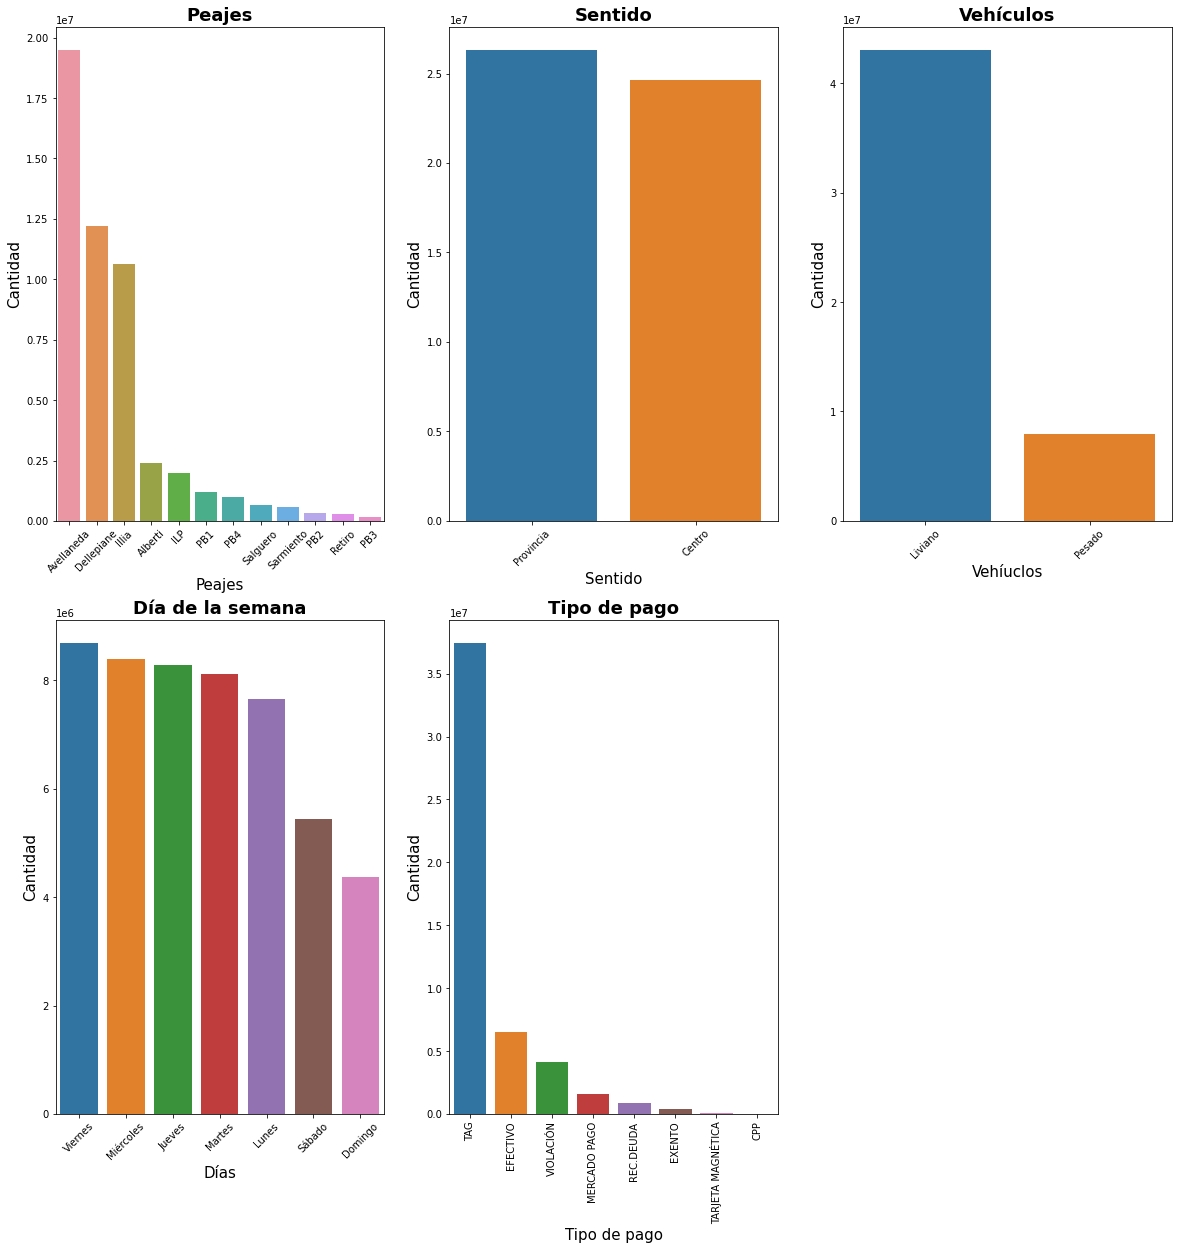

In [136]:
plt.figure(figsize=(20,20))

plt.subplot(2, 3, 1)
plt.title("Peajes", fontsize = 18, fontweight="bold")
sns.barplot(data=data21_13e, x="estacion", y="suma")
plt.ylabel('Cantidad de vehiculos')
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Peajes", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)

plt.subplot(2, 3, 2)
plt.title("Sentido", fontsize = 18, fontweight="bold")
sns.barplot(data=data21_13s, x="sentido", y="suma")
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Sentido", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)

plt.subplot(2, 3, 3)
plt.title("Vehículos", fontsize = 18, fontweight="bold")
sns.barplot(data=data21_13v, x="tipo_vehiculo", y="suma")
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Vehíuclos", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)

plt.subplot(2, 3, 4)
plt.title("Día de la semana", fontsize = 18, fontweight="bold")
sns.barplot(data=data21_13d, x="dia", y="suma")
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Días", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)

plt.subplot(2, 3, 5)
plt.title("Tipo de pago", fontsize = 18, fontweight="bold")
sns.barplot(data=data21_13p, x="forma_pago", y="suma")
plt.xticks(rotation = 90, fontsize = 10)
plt.xlabel("Tipo de pago", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)

Observamos que las tres columnas principles son 'Avellaneda', 'Dellepiane' e 'Illía', está muy parejo entre el Centro y Provincia, vemos que hay mucha diferencia entre Livianos y Pesados. También observamos Que el mayor día de tráfico son los viernes y la mayoría de días de tráfico son de lunes a viernes. También vemos que las columnas de tipo de pago son 'TAG', 'Efectivo' y 'violación', siendo 'Tag' muy por encima que las demás.

In [137]:
data_2021T = data_2021[data_2021['Tipo Cobro'] == 'Tag']
data_2021T.Observacion.unique()

array(['Tag - PosPago', 'Tag - PosPago OCR', 'Tag - Exento',
       'Tag - PrePago OCR', 'Metrobus no hab. TAG pospago',
       'Metrobus no hab. OCR pospago', 'Tag - PrePago',
       'Metrobus no hab. TAG prepago', 'Metrobus no hab. OCR prepago'],
      dtype=object)

Al ver lo que tiene TAG en la columna de observación hace referencia esencialmente al TELEPASE, una aparato que se pone en el vidrio para cobro automático, por lo que vamos a entender TAG por Telepase.

In [138]:
H21 = data21_13.resample('H', on = 'fecha').sum()
print(H21.shape)
H21.head()

(4344, 2)


periodo  cantidad_pasos
fecha                                       
2021-01-01 00:00:00   410263            4720
2021-01-01 01:00:00   375906            3110
2021-01-01 02:00:00   371864            1898
2021-01-01 03:00:00   365801            1639
2021-01-01 04:00:00   375906            2157

Hacemos un resampleo de los datos de fecha por horas para poder sumar todos los datos por horas y poder tener una mejor observación de los gráficos.

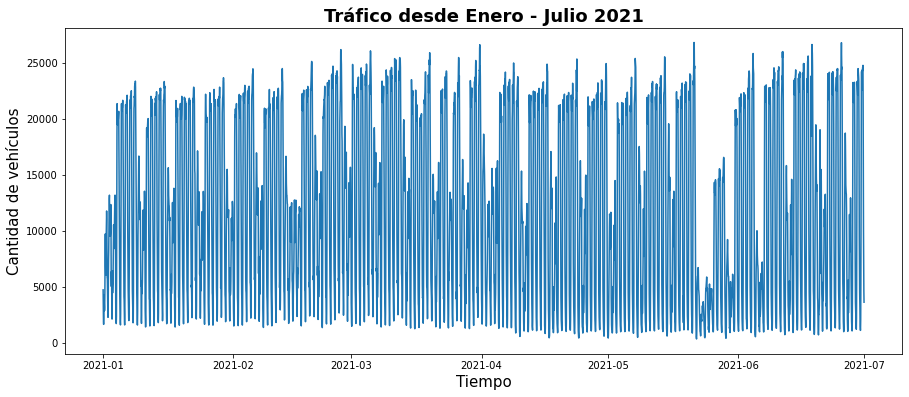

In [139]:
plt.figure(figsize = (15,6))
plt.plot(H21.index, H21.cantidad_pasos)
plt.title("Tráfico desde Enero - Julio 2021", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos como es el gráfico desde Enero hasta Julio para el 2021. Lo primero que se observa es que hay picos altos y bajos. Los picos altos son los días laborales (lunes - viernes), los picos bajos son fin de semana (sábado y domingo), por lo que hay mucho **más tráfico en la semana que el fin de semana**. Lo segundo que se observa es que dentro de los días labolares el últimos tiene un pico más alto que corresponde al viernes, por lo que **los viernes hay más tráfico**. Tercero se observan dos bajadas irregulares en el gráfico, uno más grande y otro más chico en Febrero. **La bajada más gande corresponde a la vuelta de la cuarentena estricta fase 1 del 20/05 al 31/06**, el más chico lo vamos a observar en otro gráfico.  

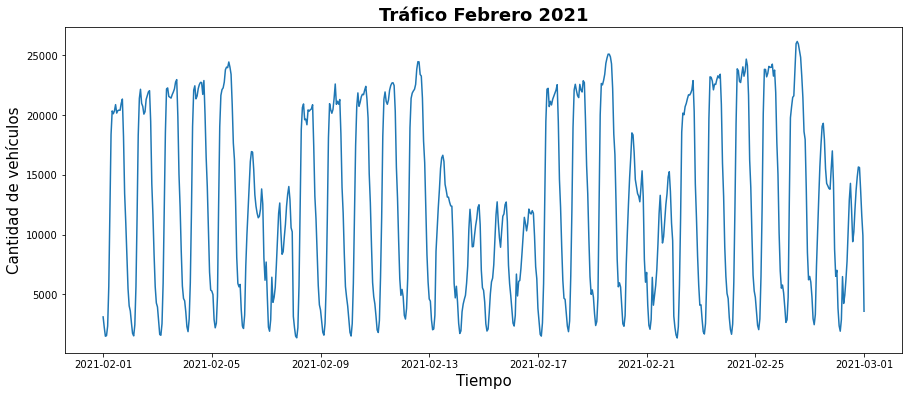

In [140]:
H21_Febrero = H21[('2021-02-01' <= H21.index) & (H21.index <= '2021-03-01')]

plt.figure(figsize = (15,6))
plt.plot(H21_Febrero.index, H21_Febrero.cantidad_pasos)
plt.title("Tráfico Febrero 2021", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos mejor el gráfico en febrero y vemos que **la bajada irregular más chica corresponde a dos días particulares, el lunes 15/02 y el martes 16/02, los cuales fueron feriados por carnaval** y mucha gente se fue de vaciones.

In [141]:
data21_13P = data21_13[data21_13.sentido == 'Provincia']
data21_13C = data21_13[data21_13.sentido == "Centro"]

H21P = data21_13P.resample('H', on = 'fecha').sum()
H21C = data21_13C.resample('H', on = 'fecha').sum()

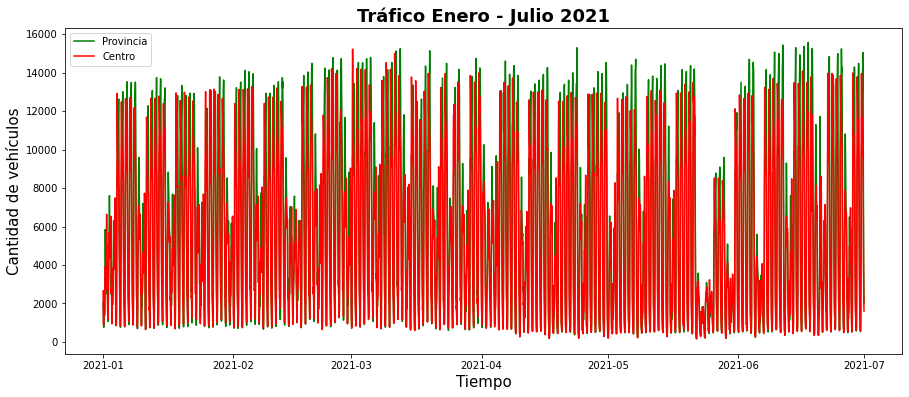

In [142]:
plt.figure(figsize = (15,6))
plt.plot(H21P.index, H21P['cantidad_pasos'], "g", label='Provincia')
plt.plot(H21C.index, H21C['cantidad_pasos'], "r", label='Centro')
plt.legend(fontsize = 10)
plt.title("Tráfico Enero - Julio 2021", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Vemos como en general hay más **tráfico por día yendo a la provincia que yendo para el centro.**

In [143]:
H21_Enero = H21[H21.index <= '2021-02-01']

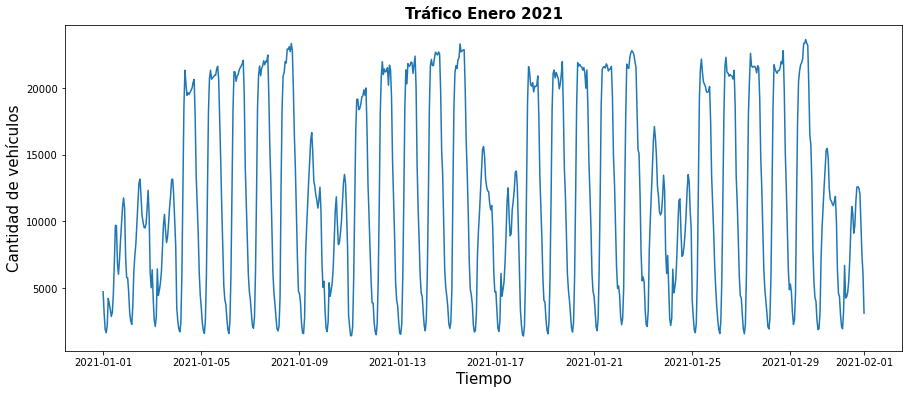

In [144]:
plt.figure(figsize = (15,6))
plt.plot(H21_Enero.index, H21_Enero['cantidad_pasos'])
plt.title("Tráfico Enero 2021", fontsize = 15, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos el comportamiento del tráfico en Enero del 2021 y vemos el comportamiento antes explicado de **mayor tráfico de lunes a viernes, siendo el viernes el día de mayor tráfico**. Acá también vemos el **viernes 01/01 que al ser feriado es un pico bajo que se comporta como fin de semana.**  

In [145]:
H21_Enero1 = H21[H21.index <= '2021-01-09']

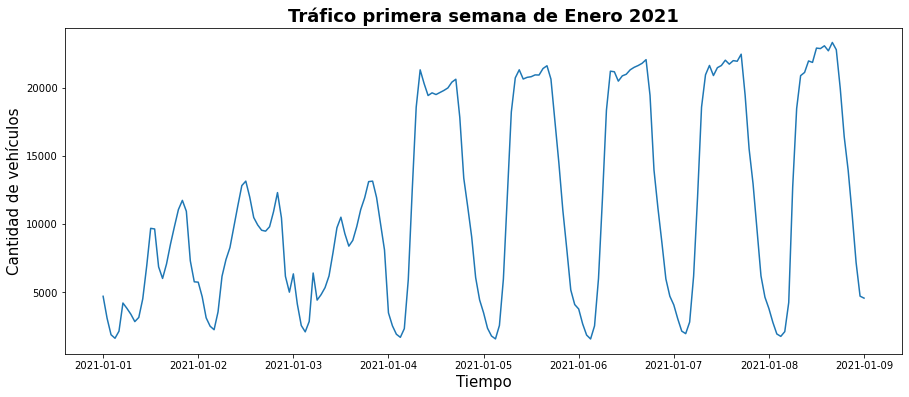

In [146]:
plt.figure(figsize = (15,6))
plt.plot(H21_Enero1.index, H21_Enero1['cantidad_pasos'])
plt.title("Tráfico primera semana de Enero 2021", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos la primera semana de Enero del 2021. Vemos que **los días laborales tienen picos y en el medio una bajada o valle. Estos picos muestran las horas de ingreso al trabajo y las horas de salida del trabajo, u horas pico.** Vemos que **el viernes tiene otro tipo de comportamiento con mayor tráfico en las úlimas horas laborales**, es posible a que se deba a mayor movilización hacia la provincia de personas que van a sus casas en la provincia para el fin de semana. 

In [147]:
data21_13Enero1P = data21_13[(data21_13.fecha <= '2021-01-09') & (data21_13.sentido == 'Provincia')]
data21_13Enero1C = data21_13[(data21_13.fecha <= '2021-01-09') & (data21_13.sentido == 'Centro')]

In [148]:
H21Enero1P = data21_13Enero1P.resample('H', on = 'fecha').sum()
H21Enero1C = data21_13Enero1C.resample('H', on = 'fecha').sum()

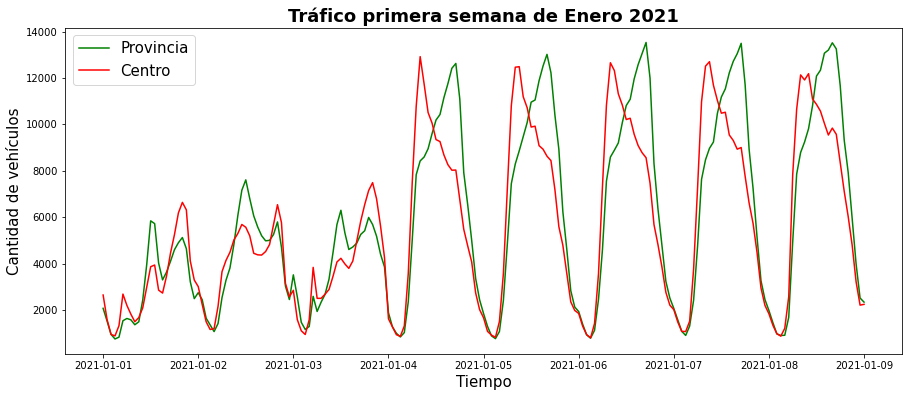

In [149]:
plt.figure(figsize = (15,6))
plt.plot(H21Enero1P.index, H21Enero1P['cantidad_pasos'], "g", label='Provincia')
plt.plot(H21Enero1C.index, H21Enero1C['cantidad_pasos'], "r", label='Centro')
plt.title("Tráfico primera semana de Enero 2021", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Observamos el tráfico de la primera semana de Enero en Buenos Aires del 2021 y vemos un comportamiento diferente yendo hacia el Centro o a la Provincia por horas de acuerdo al día d ela semana. **Para el feriado del primer día de Enero y los del fin de semana hay mayor tráfico yendo a Provincia en las primeras horas y volviendo hacia el Centro en las horas de la tarde.** Esto se debe a que **muchas personas viviendo en Capital tienen casa de fin de semana en Provincia o van hacia la casa de algún familiar viviendo en Provincia para el fin de semana.** Mientras que en la semana laboral se da diferente el comportamiento, **en las primeras horas del día las personas van hacia el Centro, mientras que para el final del día vuelven para Provincia. Esto se debe a que mucha gente viviendo en Provincia trabaja en Centro.**

In [150]:
data21_13Enero1L = data21_13[(data21_13.fecha <= '2021-01-09') & (data21_13['tipo_vehiculo'] == 'Liviano')]
data21_13Enero1PE = data21_13[(data21_13.fecha <= '2021-01-09') & (data21_13['tipo_vehiculo'] == 'Pesado')]

H21Enero1L = data21_13Enero1L.resample('H', on = 'fecha').sum()
H21Enero1PE = data21_13Enero1PE.resample('H', on = 'fecha').sum()

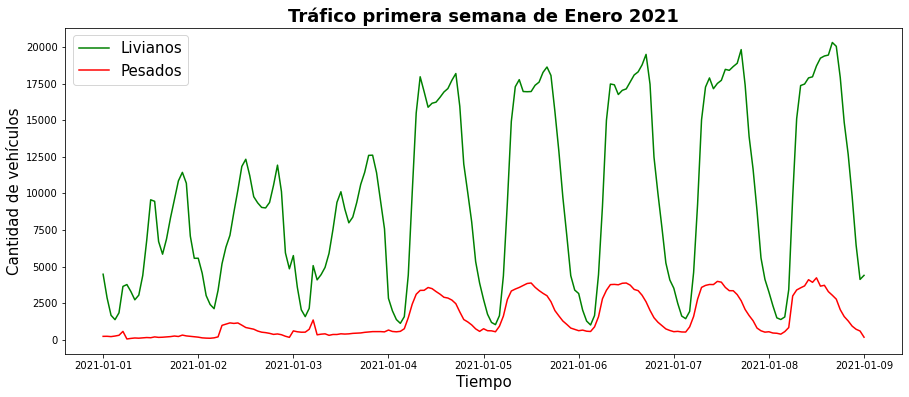

In [151]:
plt.figure(figsize = (15,6))
plt.plot(H21Enero1L.index, H21Enero1L['cantidad_pasos'], "g", label = "Livianos")
plt.plot(H21Enero1PE.index, H21Enero1PE['cantidad_pasos'], "r", label = "Pesados")
plt.title("Tráfico primera semana de Enero 2021", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Observamos un comportamiento de los livianos parecido a lo que estuvimos viendo, mientas que los pesados tienen otro comportamiento no teniendo esos picos de hora pico durante la semana, sino un tráfico constante durante horas laborales. También tienen menos tráfico el fin de semana.

In [152]:
data21_13Enero1A = data21_13[(data21_13.fecha <= '2021-01-09') & (data21_13.estacion == 'Avellaneda')]
data21_13Enero1I = data21_13[(data21_13.fecha <= '2021-01-09') & (data21_13.estacion == 'Illia')]
data21_13Enero1D = data21_13[(data21_13.fecha <= '2021-01-09') & (data21_13.estacion == 'Dellepiane')]

H21Enero1A = data21_13Enero1A.resample('H', on = 'fecha').sum()
H21Enero1I = data21_13Enero1I.resample('H', on = 'fecha').sum()
H21Enero1D = data21_13Enero1D.resample('H', on = 'fecha').sum()

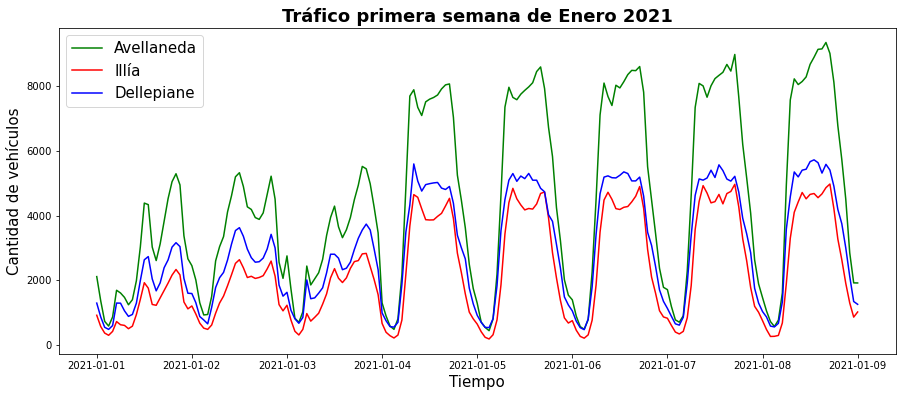

In [153]:
plt.figure(figsize = (15,6))
plt.plot(H21Enero1A.index, H21Enero1A['cantidad_pasos'], "g", label = "Avellaneda")
plt.plot(H21Enero1I.index, H21Enero1I['cantidad_pasos'], "r", label = "Illía")
plt.plot(H21Enero1D.index, H21Enero1D['cantidad_pasos'], "b", label = "Dellepiane")
plt.title("Tráfico primera semana de Enero 2021", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Para esta primer smeana de Enero observamos que el tráfico en los tres peajes se comportan parecido durante el fin de semana, mientras que en la semana **el peaje de Dellepiane no tiene estos picos de hora pico marcados como si los tienen Avellaneda e Illía**, por lo que vemos que **los que vienen desde el Sur de Buenos Aires y pasan por Dellepiane tienen un comportamiento distinto** a los que vienen desde el Oeste(peaje Avellaneda) o los que vienen desde el Norte(peaje Illía).

In [154]:
data21_13Enero1TA = data21_13[(data21_13.fecha <= '2021-01-09') & (data21_13['forma_pago'] == 'TAG')]
data21_13Enero1EF = data21_13[(data21_13.fecha <= '2021-01-09') & (data21_13['forma_pago'] == 'EFECTIVO')]

H21Enero1TA = data21_13Enero1A.resample('H', on = 'fecha').sum()
H21Enero1EF = data21_13Enero1I.resample('H', on = 'fecha').sum()

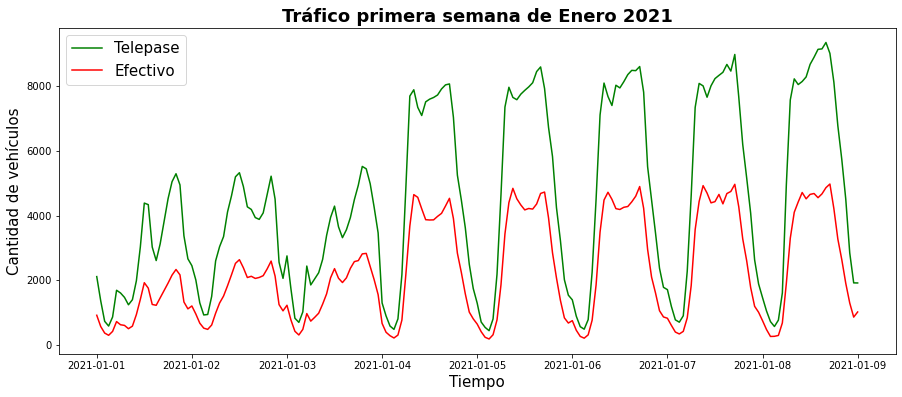

In [155]:
plt.figure(figsize = (15,6))
plt.plot(H21Enero1TA.index, H21Enero1TA['cantidad_pasos'], "g", label = "Telepase")
plt.plot(H21Enero1EF.index, H21Enero1EF['cantidad_pasos'], "r", label = "Efectivo")
plt.title("Tráfico primera semana de Enero 2021", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Observamos como **los que pagan con Telepase tienen un comportamiento parecido a los que pagan con efectivo** con respecto a la hora pico.

In [156]:
data21_13Enero1V = data21_13[(data21_13.fecha <= '2021-01-09') & (data21_13['forma_pago'] == 'VIOLACIÓN')]

H21Enero1V = data21_13Enero1V.resample('H', on = 'fecha').sum()

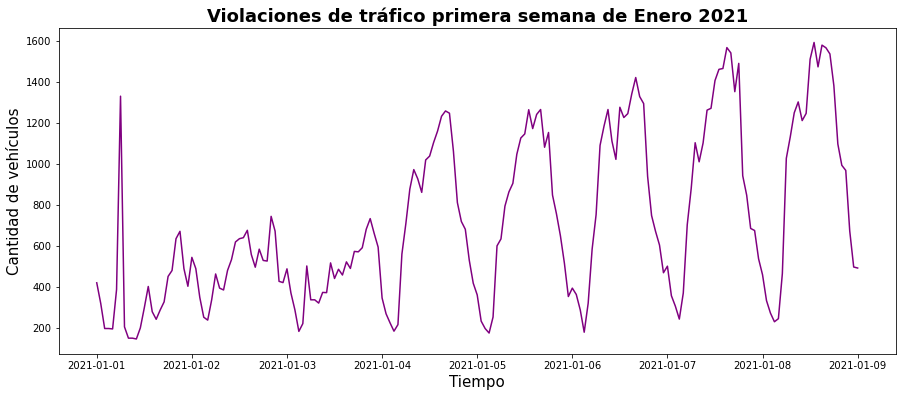

In [157]:
plt.figure(figsize = (15,6))
plt.plot(H21Enero1V.index, H21Enero1V['cantidad_pasos'], color = "purple")
plt.title("Violaciones de tráfico primera semana de Enero 2021", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos las **violaciones en la primera semana de Enero**, teniendo un **pico muy grando el primero de Enero y en la semana siendo incremental de lunes a viernes con mayor número de violaciones en las horas de salida del trabajo.** Esto se puede deber al cansancio de las personas luego de la jornada laboral y que cometen más infracciones por impaciencia.

Text(0, 0.5, 'Cantidad')

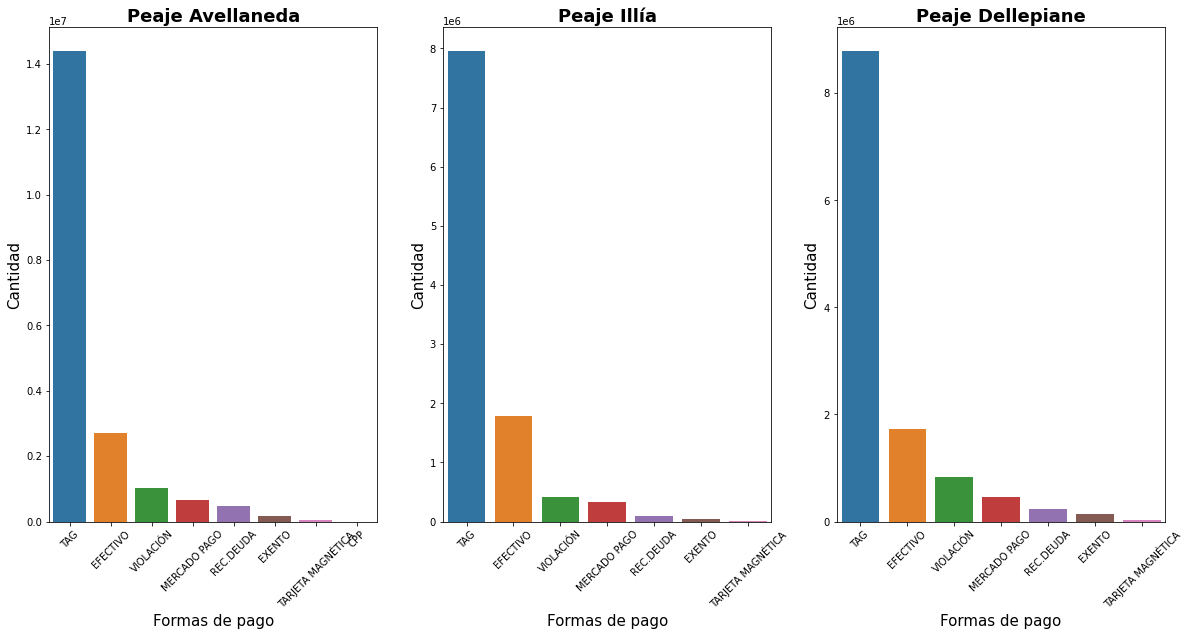

In [158]:
data21_13A = data21_13[data21_13.estacion == 'Avellaneda']
data21_13I = data21_13[data21_13.estacion == 'Illia']
data21_13D = data21_13[data21_13.estacion == 'Dellepiane']

H21fpA = data21_13A['cantidad_pasos'].groupby(data21_13A['forma_pago']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)
H21fpI = data21_13I['cantidad_pasos'].groupby(data21_13I['forma_pago']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)
H21fpD = data21_13D['cantidad_pasos'].groupby(data21_13D['forma_pago']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)

plt.figure(figsize=(20,20))

plt.subplot(2, 3, 1)
plt.title("Peaje Avellaneda", fontsize = 18, fontweight="bold")
sns.barplot(data=H21fpA, x="forma_pago", y="suma")
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Formas de pago", fontsize = 15)

plt.subplot(2, 3, 2)
plt.title("Peaje Illía", fontsize = 18, fontweight="bold")
sns.barplot(data=H21fpI, x="forma_pago", y = "suma")
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Formas de pago", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)

plt.subplot(2, 3, 3)
plt.title("Peaje Dellepiane", fontsize = 18, fontweight="bold")
sns.barplot(data=H21fpD, x="forma_pago", y="suma")
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Formas de pago", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)


Observamos que es **parecida la proporción de vehiculos que utilizan el Telepase en los tres peajes comparado al efectivo.** Observamos que en el peaje Dellepiane hay un poco más de violaciones que en los otros dos.

In [159]:
dia21 = data21_13.resample('D', on = 'fecha').sum()
print(dia21.shape)
dia21.head()

(181, 2)


periodo  cantidad_pasos
fecha                               
2021-01-01   9917047          147195
2021-01-02  12445318          197402
2021-01-03  12639334          189411
2021-01-04  17008736          312214
2021-01-05  17235088          318900

Hacemos un resampleo por día para ver como se observa.

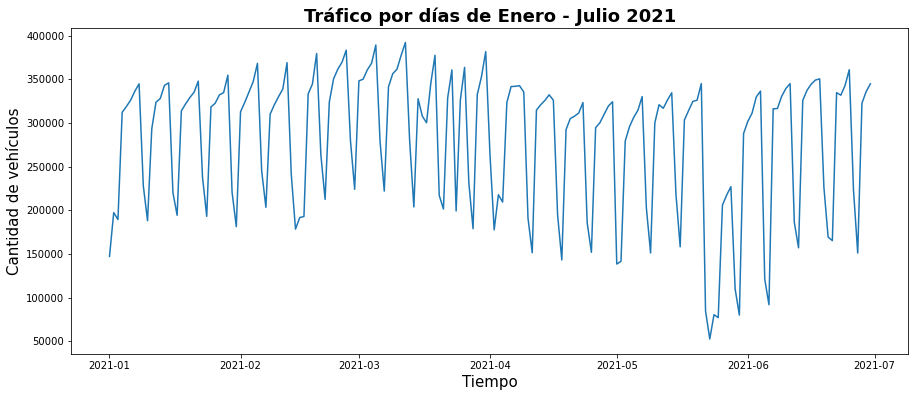

In [160]:
plt.figure(figsize = (15,6))
plt.plot(dia21.index, dia21.cantidad_pasos)
plt.title("Tráfico por días de Enero - Julio 2021", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Hacemos un resampleo por días y observamos además de las bajadas antes mencionadas unos picos extraños la última quincena de Marzo.

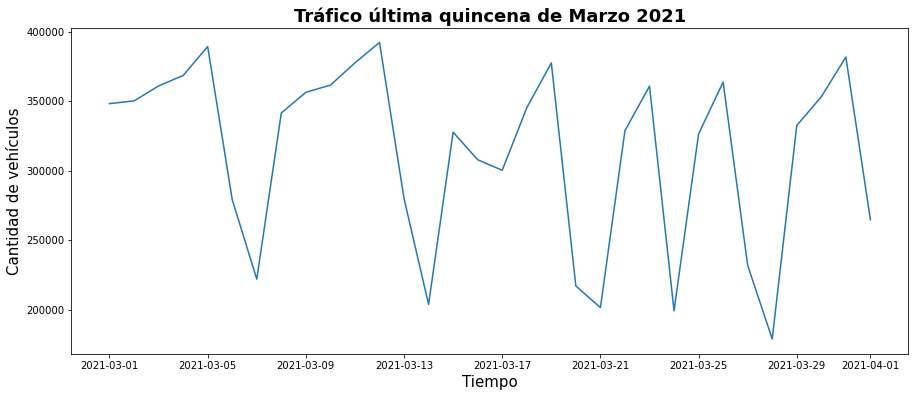

In [161]:
dia21Marzo = dia21[(dia21.index >= '2021-03-01') & (dia21.index <= '2021-04-01')]

plt.figure(figsize = (15,6))
plt.plot(dia21Marzo.index, dia21Marzo.cantidad_pasos)
plt.title("Tráfico última quincena de Marzo 2021", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Vemos dos bajadas, una más leve el 17 de Marzo y **otra más fuerte el 24 de Marzo.** Del la primera no encontramos la razón, de la segunda es porque **fue feriado nacional.**

In [162]:
sem21 = data21_13.resample('w', on = 'fecha').sum()
print(sem21.shape)
sem21.head()

(27, 2)


periodo  cantidad_pasos
fecha                                
2021-01-03   35001699          534008
2021-01-10  112464608         2054666
2021-01-17  112125080         2048928
2021-01-24  111155000         2079419
2021-01-31  106951320         2064501

Hacemos un resampleo por semana para ver como se observa.

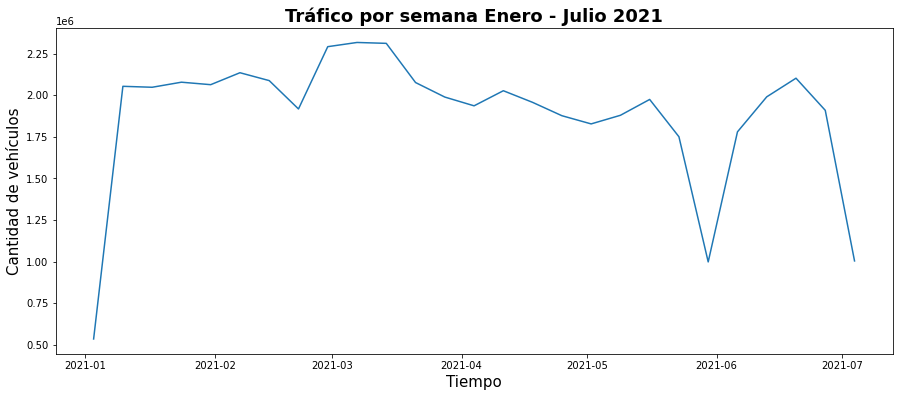

In [163]:
plt.figure(figsize = (15,6))
plt.plot(sem21.index, sem21.cantidad_pasos)
plt.title("Tráfico por semana Enero - Julio 2021", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos la bajada importante al final de Mayo por la cuarentena y una bajada al final de Febrero.

## 2. ANÁLISIS TRÁFICO 2020

Hacmeos un pequeño análisis del 2020 para poder continuar ya con todos los datasets juntos.

In [164]:
sem20 = data20N13.resample('W', on = 'fecha').sum()
print(sem20.shape)
sem20.head()

(53, 2)


periodo  cantidad_pasos
fecha                                
2020-01-05   71720100         1412175
2020-01-12  114309780         2412162
2020-01-19  113610860         2438139
2020-01-26  114182520         2415326
2020-02-02  115628840         2464097

Hacemos un resampleo por semana.

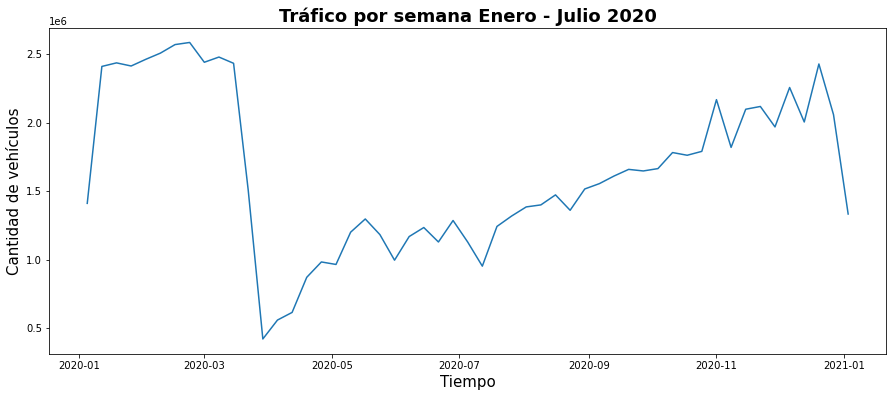

In [165]:
plt.figure(figsize = (15,6))
plt.plot(sem20.index, sem20.cantidad_pasos)
plt.title("Tráfico por semana Enero - Julio 2020", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos que en el **final de Marzo hay una bajada muy fuerte que fue cuando se estableció la cuarentena estricta que fue el 20/03.** También se puede obervar una **bajada medianamente fuerte en la primera quincena de Julio que fue cuando se volvió a la cuarentena estricta** y **una bajada un poco menor a principios de Junio que se puede deber a que el lunes 15 fue feriado nacional.**

## EXPLORACIÓN DATASETS 2017 - 2021

Empezamos a explorar todos los datasets para compararlos entre ellos.

In [166]:
data17p = data17_3['cantidad_pasos'].groupby(data17_3['forma_pago']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)
data18p = data18_3['cantidad_pasos'].groupby(data18_3['forma_pago']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)
data19p = data19_1['cantidad_pasos'].groupby(data19_1['forma_pago']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)
data21p = data21_13['cantidad_pasos'].groupby(data21_13['forma_pago']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)
data20p = data20N13['cantidad_pasos'].groupby(data20N13['forma_pago']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)

Hacemos un groupby de cantidad de pasos con la forma de pago.

Text(0, 0.5, 'Cantidad')

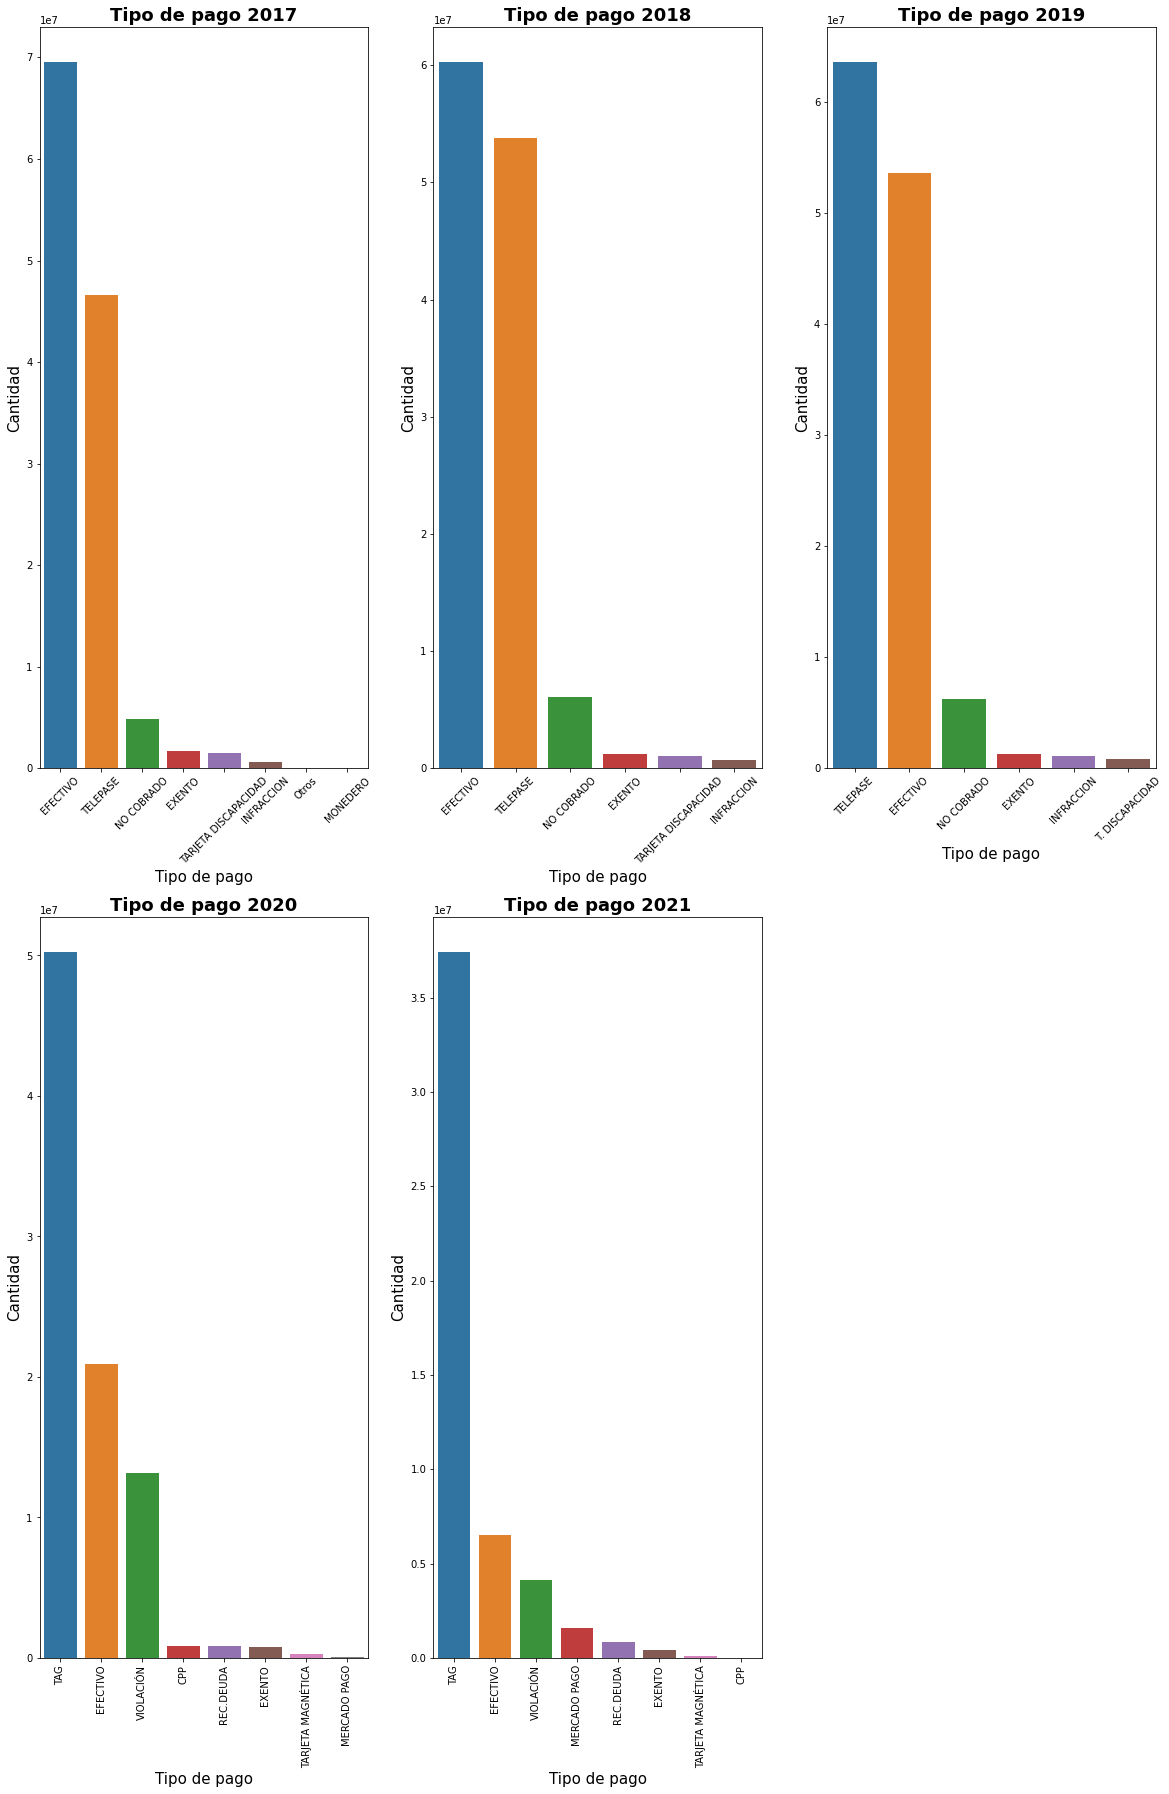

In [167]:
plt.figure(figsize=(20,30))

plt.subplot(2, 3, 1)
plt.title("Tipo de pago 2017", fontsize = 18, fontweight="bold")
sns.barplot(data=data17p, x="forma_pago", y="suma")
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Tipo de pago", fontsize = 15)

plt.subplot(2, 3, 2)
plt.title("Tipo de pago 2018", fontsize = 18, fontweight="bold")
sns.barplot(data=data18p, x="forma_pago", y="suma")
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Tipo de pago", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)

plt.subplot(2, 3, 3)
plt.title("Tipo de pago 2019", fontsize = 18, fontweight="bold")
sns.barplot(data=data19p, x="forma_pago", y="suma")
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Tipo de pago", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)

plt.subplot(2, 3, 4)
plt.title("Tipo de pago 2020", fontsize = 18, fontweight="bold")
sns.barplot(data=data20p, x="forma_pago", y="suma")
plt.xticks(rotation = 90, fontsize = 10)
plt.xlabel("Tipo de pago", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)

plt.subplot(2, 3, 5)
plt.title("Tipo de pago 2021", fontsize = 18, fontweight="bold")
sns.barplot(data=data21p, x="forma_pago", y="suma")
plt.xticks(rotation = 90, fontsize = 10)
plt.xlabel("Tipo de pago", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)

Visualizamos de forma muy interesante como en el **2017 y 2018 prevalecía el tipo de pago de Efectivo. Desde el 2019 ya prevalece la forma de pago de Telepase y se acentúa mucho más en el 2020 y 2021.** Hay que tener en cuenta que en la ciudad hubo una medida en la cuál **desde el 28/08/2020 el pago con Telepase se hizo obligatorio con la penalidad de pagar doble tarifa para el que no tenía**, lo cuál incentivó mucho al cambio en la forma de pago.

In [168]:
Años = pd.concat([data21_13, data20N13, data19_1, data18_3, data17_3])
Años.shape
Años.head()

periodo tipo_vehiculo estacion    sentido  cantidad_pasos      fecha  \
0     2021       Liviano  Alberti  Provincia               7 2021-04-01   
1     2021       Liviano  Alberti  Provincia               4 2021-04-01   
2     2021       Liviano  Alberti     Centro               1 2021-04-01   
3     2021       Liviano  Alberti  Provincia               1 2021-04-01   
4     2021       Liviano  Alberti     Centro              19 2021-04-01   

      dia    forma_pago  
0  Jueves      EFECTIVO  
1  Jueves  MERCADO PAGO  
2  Jueves  MERCADO PAGO  
3  Jueves     REC.DEUDA  
4  Jueves           TAG

Unimos los datasets del 2017 al 2021.

In [169]:
semAños = Años.resample('W', on = 'fecha').sum()
print(semAños.shape)
semAños.head()

(236, 2)


periodo  cantidad_pasos
fecha                               
2017-01-01   5349084          220443
2017-01-08  52986590         2260596
2017-01-15  53160052         2314268
2017-01-22  53769186         2257919
2017-01-29  54039464         2282364

Hacemos un resampleo por semana.

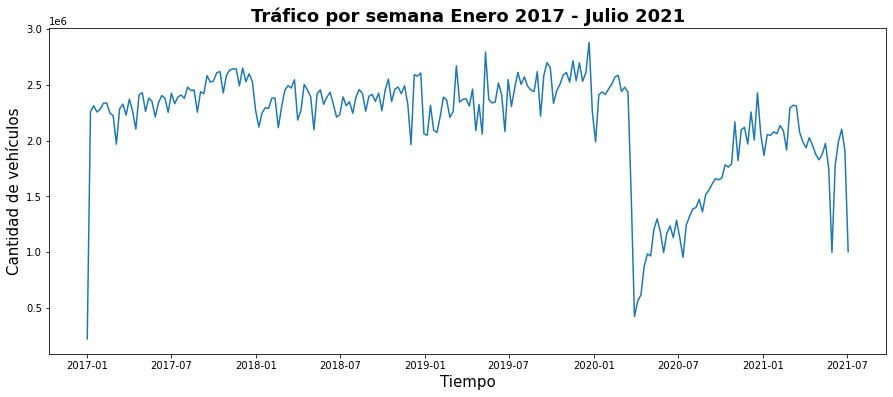

In [170]:
plt.figure(figsize = (15,6))
plt.plot(semAños.index, semAños.cantidad_pasos)
plt.title("Tráfico por semana Enero 2017 - Julio 2021", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos como se mantiene **relativamente estable entre 2017 y 2019 y hay una bajada muy fuerte en 2020 debido a la pandemia que luego se va recuperando debido a una mayor confianza social. Sin embargo, no llega nunca a los picos anteriores.** 

In [171]:
sem17 = semAños[semAños.index < '2018-01-01' ]
sem18 = semAños[('2017-12-31' < semAños.index) & (semAños.index < '2019-01-01')]
sem19 = semAños[('2018-12-31' < semAños.index) & (semAños.index < '2020-01-01')]
sem20 = semAños[('2019-12-31' < semAños.index) & (semAños.index < '2021-01-01')]
sem21 = semAños[semAños.index > '2021-01-01']

print("Máximo de tráfico 2017: ", sem17['cantidad_pasos'].max())
print("Máximo de tráfico 2018: ", sem18['cantidad_pasos'].max())
print("Máximo de tráfico 2019: ", sem19['cantidad_pasos'].max())
print("Máximo de tráfico 2020: ", sem20['cantidad_pasos'].max())
print("Máximo de tráfico 2021: ", sem21['cantidad_pasos'].max())

Máximo de tráfico 2017:  2653142
Máximo de tráfico 2018:  2608145
Máximo de tráfico 2019:  2882347
Máximo de tráfico 2020:  2587170
Máximo de tráfico 2021:  2318542


Observamos como **en 2021 todavía no se llegó a alcanzar el pico máximo menor en 2018 y mucho menos el de 2019.**

In [172]:
mask = np.logical_and(Años.estacion=='Illia', Años.forma_pago == 'EFECTIVO')
AñosIE= Años[mask]

Hacemos un filro con el peaje Illía y el tipo de pago Efectivo que son los campos que nos vamos a centrar para nuestra predicción.

In [173]:
semAñosIE = AñosIE.resample('W', on = 'fecha').sum()
print(semAñosIE.shape)
semAñosIE.head()

(236, 2)


periodo  cantidad_pasos
fecha                              
2017-01-01   465927           31183
2017-01-08  4395043          347212
2017-01-15  4399077          366413
2017-01-22  4421264          357215
2017-01-29  4427315          354581

Hacemos un resampleo por semana.

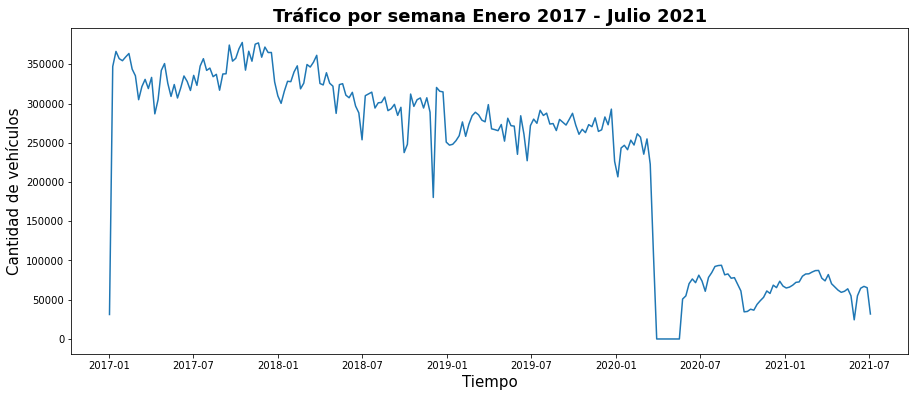

In [174]:
plt.figure(figsize = (15,6))
plt.plot(semAñosIE.index, semAñosIE.cantidad_pasos)
plt.title("Tráfico por semana Enero 2017 - Julio 2021", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos como hay una **bajada desde el 2017 y una bajada muy fuerte desde el 2020.** Es diferente al gráfico anterior de todo el año y **muestra una bajada muy pronunciada debido al cambio de tipo de cambio también, más pronunciada en 2020 y 2021.**

## ANÁLISIS DATASET PARA PREDICCIÓN

In [175]:
Añosproy_2 = AñosIE[(AñosIE.fecha >= '2017-01-02') & (AñosIE.fecha < '2020-01-01')].reset_index(drop = True)
print(Añosproy_2.shape)
Añosproy_2.head()

(238638, 8)


periodo tipo_vehiculo estacion    sentido  cantidad_pasos  \
0     2019       Liviano    Illia     Centro             537   
1     2019        Pesado    Illia     Centro               1   
2     2019       Liviano    Illia  Provincia             443   
3     2019        Pesado    Illia  Provincia               1   
4     2019       Liviano    Illia     Centro             769   

                fecha     dia forma_pago  
0 2019-01-01 02:00:00  Martes   EFECTIVO  
1 2019-01-01 02:00:00  Martes   EFECTIVO  
2 2019-01-01 02:00:00  Martes   EFECTIVO  
3 2019-01-01 02:00:00  Martes   EFECTIVO  
4 2019-01-01 03:00:00  Martes   EFECTIVO

Hacemos un filtro hasta el primero de enero del 2020 del ya filtrado antes del peaje Ilía y pago con efectivo.

In [176]:
Añosproy_2d = Añosproy_2['cantidad_pasos'].groupby(Añosproy_2['dia']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)
Añosproy_2s = Añosproy_2['cantidad_pasos'].groupby(Añosproy_2['sentido']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)
Añosproy_2v = Añosproy_2['cantidad_pasos'].groupby(Añosproy_2['tipo_vehiculo']).sum().reset_index(name='suma').sort_values(by=['suma'], ascending = False)

Text(0, 0.5, 'Cantidad')

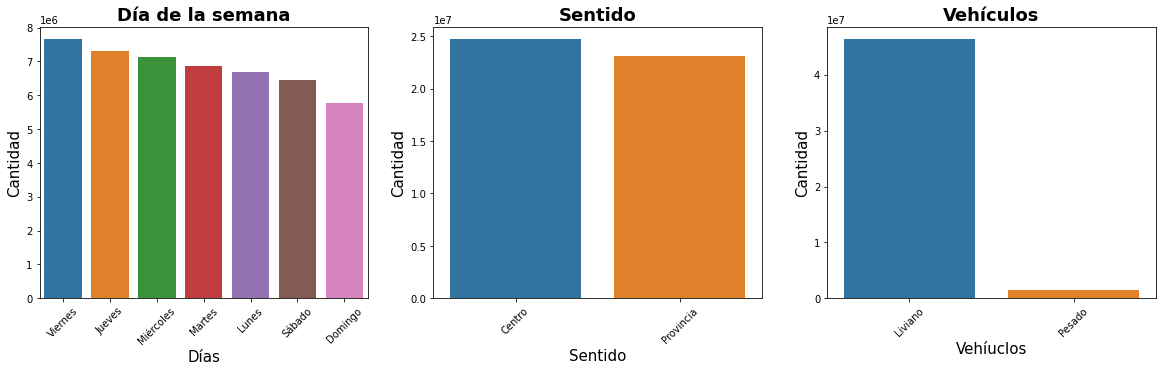

In [177]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.title("Día de la semana", fontsize = 18, fontweight="bold")
sns.barplot(data = Añosproy_2d, x="dia", y="suma")
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Días", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)

plt.subplot(1, 3, 2)
plt.title("Sentido", fontsize = 18, fontweight="bold")
sns.barplot(data = Añosproy_2s, x="sentido", y="suma")
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Sentido", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)

plt.subplot(1, 3, 3)
plt.title("Vehículos", fontsize = 18, fontweight="bold")
sns.barplot(data = Añosproy_2v, x="tipo_vehiculo", y="suma")
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Vehíuclos", fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Cantidad", fontsize = 15)

Observamos las métricas comparadas a las de antes y vemos que se da de manera parecida, excepto que en vehiculos **es mucho mayor el Liviano que el Pesado**, lo cuál que pensamos que es por el peaje Ilía donde creemos que psarían menos camiones que otros peajes.

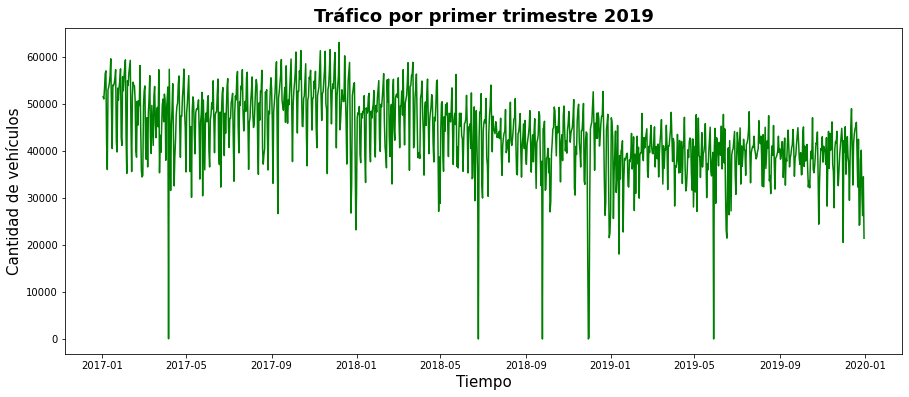

In [178]:
Dproy = Añosproy_2.resample('D', on = 'fecha').sum()

plt.figure(figsize = (15,6))
plt.plot(Dproy.index, Dproy.cantidad_pasos, "g", label = "Liviano")
plt.title("Tráfico por primer trimestre 2019", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Hacemos un **resampleo por semana** de nuetro dataset para el proyecto y observamos una **leve tendencia a disminuir el tráfico que paga en Efectivo en la autopista Ilía de 2017 a 2019.**

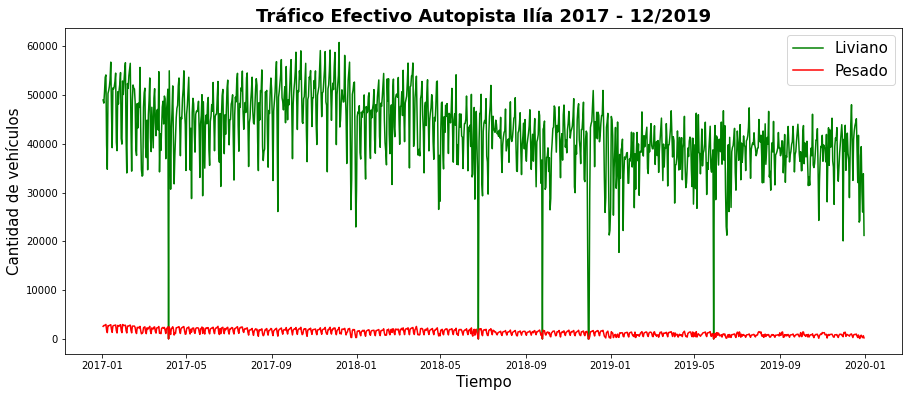

In [179]:
Añosproy_2L = Añosproy_2[Añosproy_2['tipo_vehiculo'] == 'Liviano']
Añosproy_2P= Añosproy_2[Añosproy_2['tipo_vehiculo'] == 'Pesado']

DproyL = Añosproy_2L.resample('D', on = 'fecha').sum()
DproyP = Añosproy_2P.resample('D', on = 'fecha').sum()

plt.figure(figsize = (15,6))
plt.plot(Dproy.index, DproyL.cantidad_pasos, "g", label = "Liviano")
plt.plot(Dproy.index, DproyP.cantidad_pasos, "r", label = "Pesado")
plt.title("Tráfico Efectivo Autopista Ilía 2017 - 12/2019", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.legend(fontsize = 15, loc = 'upper right')
plt.show()

**Los livianos se comportan casi igual que el gráfico anterior**, mientras que los pesados no se puede visualizar bien por lo que vamos a hacer otro gráfico.

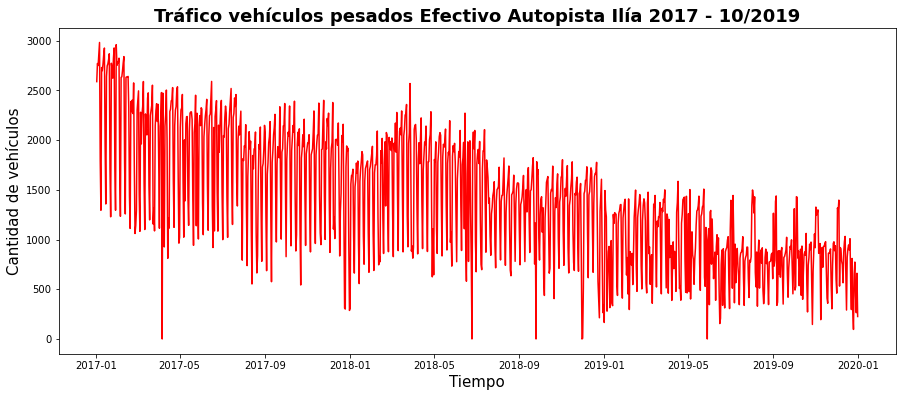

In [180]:
plt.figure(figsize = (15,6))
plt.plot(Dproy.index, DproyP.cantidad_pasos, "r", label = "Pesado")
plt.title("Tráfico vehículos pesados Efectivo Autopista Ilía 2017 - 10/2019", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos que **la disminución de vehiculos que pagan en Efectivo por la autopista Ilía es mucho más pronunciada para vehiculos pesados que livianos.**

### Conclusiones EDA

Dellepiane es el peaje de los que vienen del Sur de la Ciudad de Buenos Aires, Avellaneda es el peaje de los que vienen del Oeste de la Ciudad de Buenos Aires e Ilía es el peaje de los que vienen del Norte de la Ciudad de Buenos Aires. Esta es una generalidad, pero se da bastante en la realidad.

- Parejo entre el Centro y Provincia con una leve superioridad de Provincia. 
- Mucha diferencia entre vehículos Livianos y Pesados
- El mayor día de tráfico son los viernes con una mayoría de tráfico entre lunes a viernes y una bajada de tráfico el fin de semana. El mayor tráfico los días de la semana se concentran en las horas pico, 6,7 AM y 5,6 PM que son las horas de entrada y salida laboral. Sin embargo, uno de los peajes, Dellepiane, no tiene este comportamiento, por lo que podemos analizar que los del Sur de la Ciudad de Buenos Aires tienen un comportamiento diferente a los del Oeste y los del Norte.
- Los fin de semana y feriados hay más vehículos que van hacia Provincia en las primeras horas y más vehículos que van hacia el Centro hacia la tarde. Esto se debe a que muchas personas viviendo en Capital tienen casa o familiares en Provincia donde suelen pasar su tiempo libre. Diferente pasa en la semana cuando hay más vehiculos que van hacia el Centro en la mañana y más vehículos que van a Provincia hacia la tarde. Estos se debe a que muchas personas viviendo en Provincia trabajan en la Ciudad de Buenos Aires, por lo que van hacia esa dirección a trabajar y vuelven a la tarde a sus casas.
- A lo largo de los años va aumentando el tipo de pago de TAG o Telepase y bajando el Efectivo. Desde el 2020 esa bajada se da de manera más acentuada en especial por la medida del 28/08/2020 para obligar al uso del Telepase con castigos de doble tarifa para el que no lo cumplía.
- En las cuarentenas se observan una bajada muy importante del tráfico. Después de Julio del 2020 el tráfico empieza a subir, pero nunca llega a niveles normales, ni en 2021. 
- Los feriados tienen bajadas muy grandes en el tráfico.
- Los que pagan con Telepase tienen un comportamiento parecido a los que pagan con Efectivo. También se observa que los que pagan con Telepase es parecido entre los tres peajes.
- Hay una bajada más pronunciada en los que pagan con Efectivo en Pesados que en Livianos.

## COMPONENTES DE LA SERIE DE TIEMPO

Analizamos los componentes de la serie de tiempo empezando a revisar los valores atípicos. 

### 1. Análisis valores valores atípicos

In [181]:
d19_trim1 = Añosproy_2[('2018-12-20' < Añosproy_2.fecha) & (Añosproy_2.fecha < '2019-04-01')]
d19_trim2 = Añosproy_2[('2019-04-01' <= Añosproy_2.fecha) & (Añosproy_2.fecha < '2019-07-01')]
d19_trim3 = Añosproy_2[('2019-07-01' <= Añosproy_2.fecha) & (Añosproy_2.fecha < '2019-10-01')]
d19_trim4 = Añosproy_2[('2019-10-01' <= Añosproy_2.fecha) & (Añosproy_2.fecha < '2019-12-01')]

Dd19_trim1 = d19_trim1.resample('D', on = 'fecha').sum()

Separamos el 2019 en los cuatro trimestres para analizarlos mejor

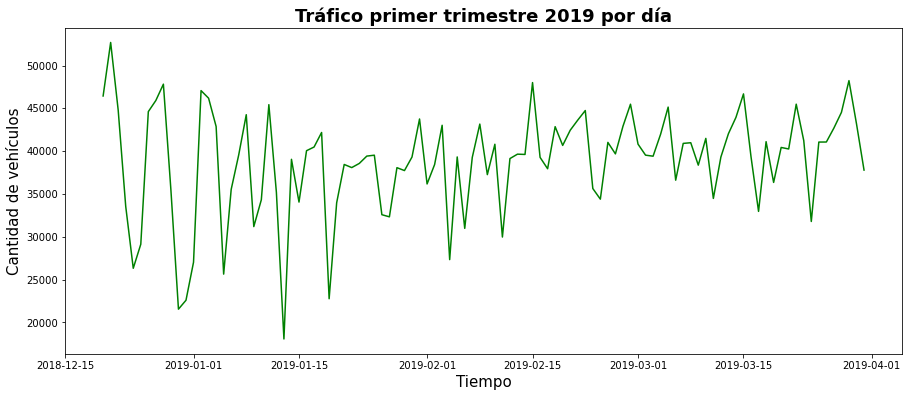

In [182]:
plt.figure(figsize = (15,6))
plt.plot(Dd19_trim1.index, Dd19_trim1.cantidad_pasos, "g")
plt.title("Tráfico primer trimestre 2019 por día", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observmaos el comportamiento en el primer trimestre, habiendo bajadas el **25 de Diciembre de 2018 por Navidad**, también para **fin de año** y **bajadas atípicas en Enero que pensamos que es por el periodo de vacaciones de verano.**

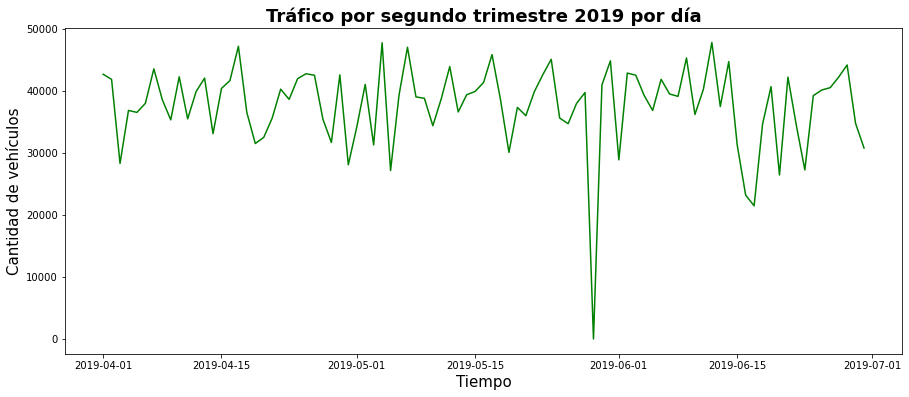

In [183]:
Dd19_trim2 = d19_trim2.resample('D', on = 'fecha').sum()

plt.figure(figsize = (15,6))
plt.plot(Dd19_trim2.index, Dd19_trim2.cantidad_pasos, "g", label = "Liviano")
plt.title("Tráfico por segundo trimestre 2019 por día", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos una bajada muy grande en Mayo, la cuál vamos a profundizar.

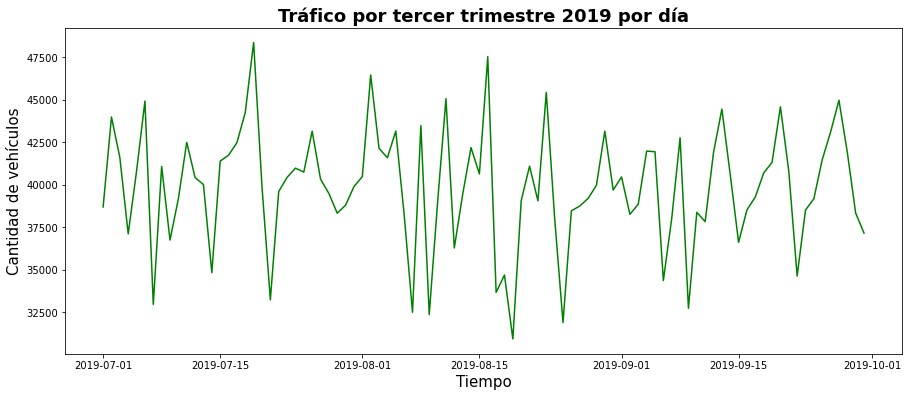

In [184]:
Dd19_trim3 = d19_trim3.resample('D', on = 'fecha').sum()

plt.figure(figsize = (15,6))
plt.plot(Dd19_trim3.index, Dd19_trim3.cantidad_pasos, "g", label = "Liviano")
plt.title("Tráfico por tercer trimestre 2019 por día", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos como el flujo se da bastante regular en el tercer trimestre del 2019.

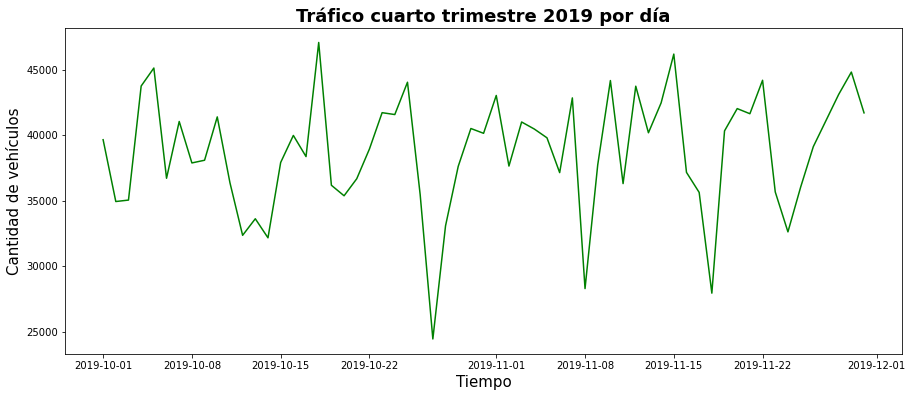

In [185]:
Dd19_trim4 = d19_trim4.resample('D', on = 'fecha').sum()

plt.figure(figsize = (15,6))
plt.plot(Dd19_trim4.index, Dd19_trim4.cantidad_pasos, "g", label = "Liviano")
plt.title("Tráfico cuarto trimestre 2019 por día", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos bastante regular el tráfico en el cuarto trimestre del 2019

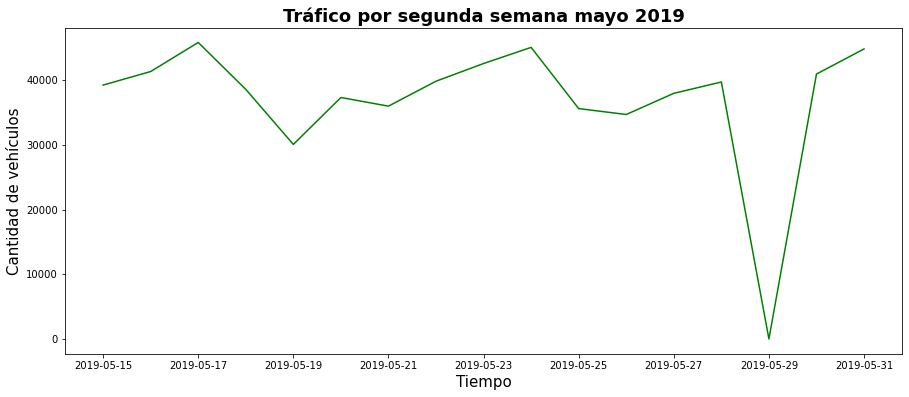

In [186]:
d19_at = Añosproy_2[('2019-05-15' < Añosproy_2.fecha) & (Añosproy_2.fecha < '2019-06-01')]

Dd19_at = d19_at.resample('D', on = 'fecha').sum()

plt.figure(figsize = (15,6))
plt.plot(Dd19_at.index, Dd19_at.cantidad_pasos, "g", label = "Liviano")
plt.title("Tráfico por segunda semana mayo 2019", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos una **bajada muy grande el 29 de Mayo de 2019 debido a un paro nacional de transporte.**

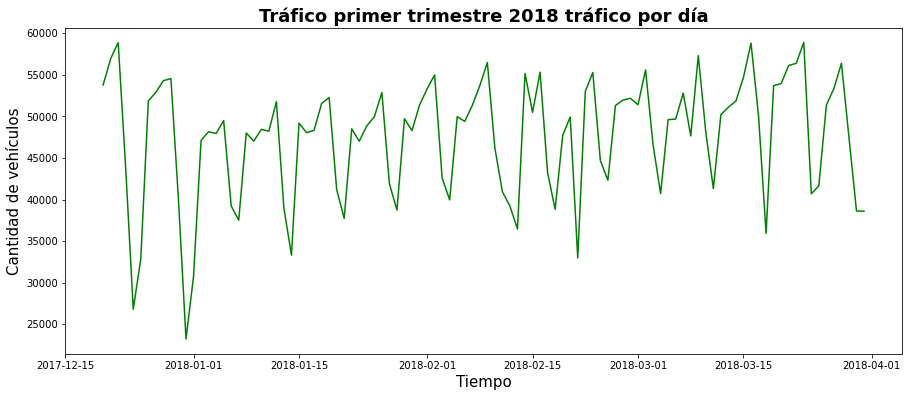

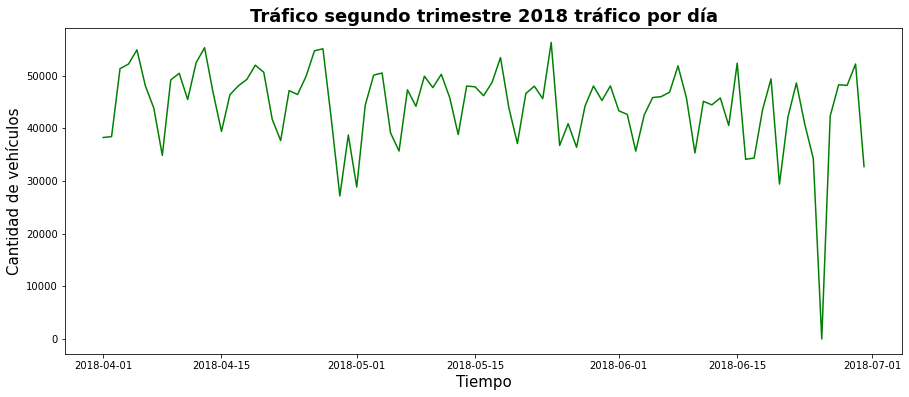

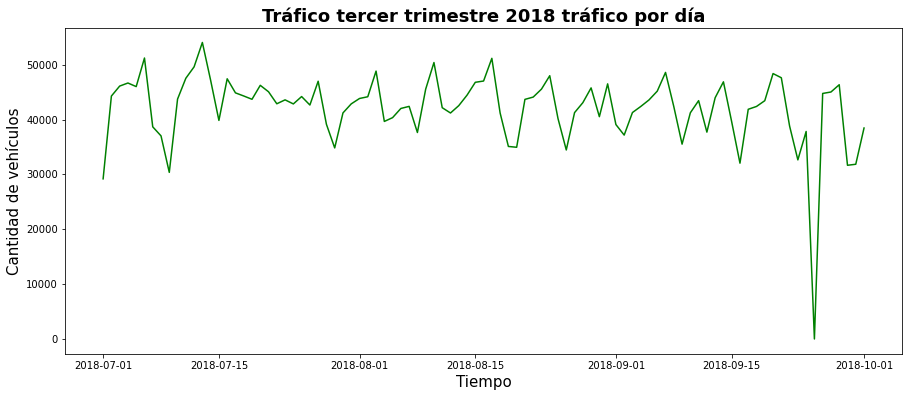

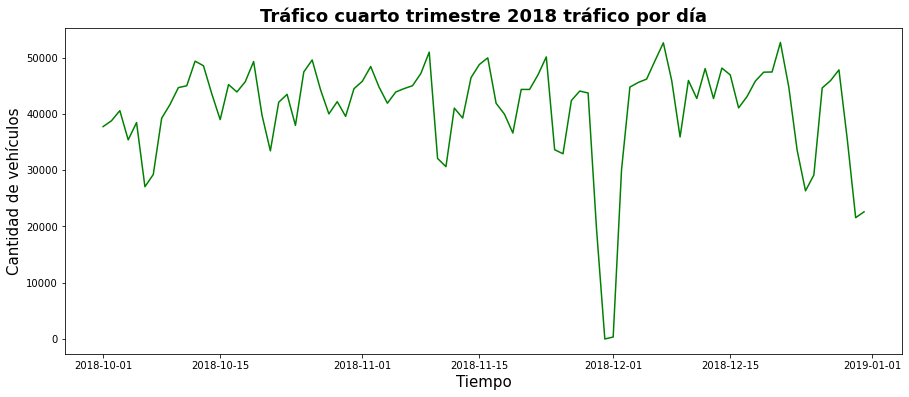

In [187]:
dtrimestre18_1 = Añosproy_2[('2017-12-20' < Añosproy_2.fecha) & (Añosproy_2.fecha < '2018-04-01')]
dtrimestre18_2 = Añosproy_2[('2018-04-01' < Añosproy_2.fecha) & (Añosproy_2.fecha < '2018-07-01')]
dtrimestre18_3 = Añosproy_2[('2018-07-01' < Añosproy_2.fecha) & (Añosproy_2.fecha < '2018-10-02')]
dtrimestre18_4 = Añosproy_2[('2018-10-01' < Añosproy_2.fecha) & (Añosproy_2.fecha < '2019-01-01')]

D18L_1trim = dtrimestre18_1.resample('D', on = 'fecha').sum()
D18L_2trim = dtrimestre18_2.resample('D', on = 'fecha').sum()
D18L_3trim = dtrimestre18_3.resample('D', on = 'fecha').sum()
D18L_4trim = dtrimestre18_4.resample('D', on = 'fecha').sum()

plt.figure(figsize = (15,6))
plt.plot(D18L_1trim .index, D18L_1trim .cantidad_pasos, "g")
plt.title("Tráfico primer trimestre 2018 tráfico por día", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

plt.figure(figsize = (15,6))
plt.plot(D18L_2trim.index, D18L_2trim.cantidad_pasos, "g")
plt.title("Tráfico segundo trimestre 2018 tráfico por día", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

plt.figure(figsize = (15,6))
plt.plot(D18L_3trim.index, D18L_3trim.cantidad_pasos, "g")
plt.title("Tráfico tercer trimestre 2018 tráfico por día", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

plt.figure(figsize = (15,6))
plt.plot(D18L_4trim.index, D18L_4trim.cantidad_pasos, "g")
plt.title("Tráfico cuarto trimestre 2018 tráfico por día", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

En el **primer trimestre del 2018 observamos las bajadas normales del 25 de Diciembre y fin de año.**  En el **segundo trimestre vemos una bajada importantes para finales de junio.** En el **tercer trimestre vemos una bajada importante a finales de septiembre** y en el **cuarto trimestre una bajada importante a principios de diciembre.**

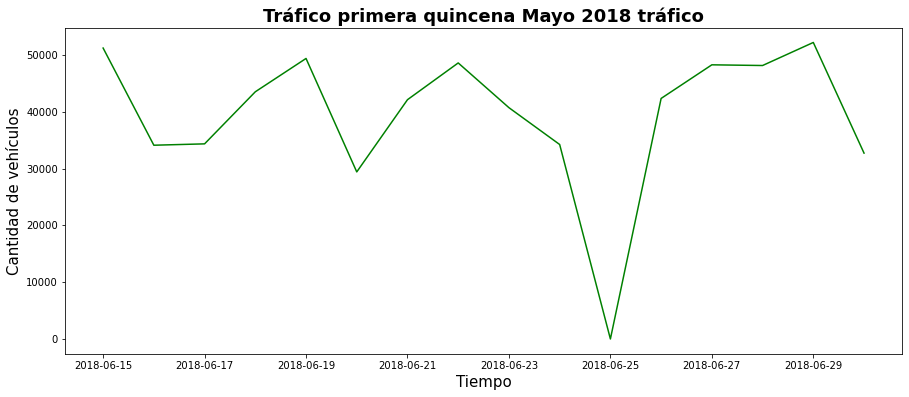

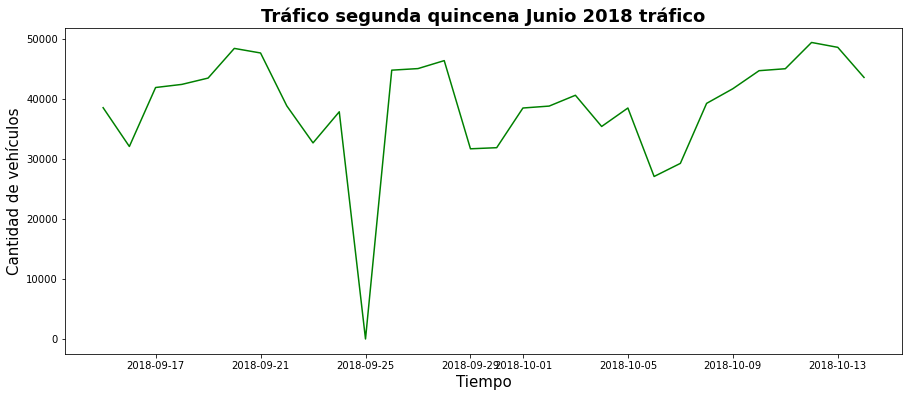

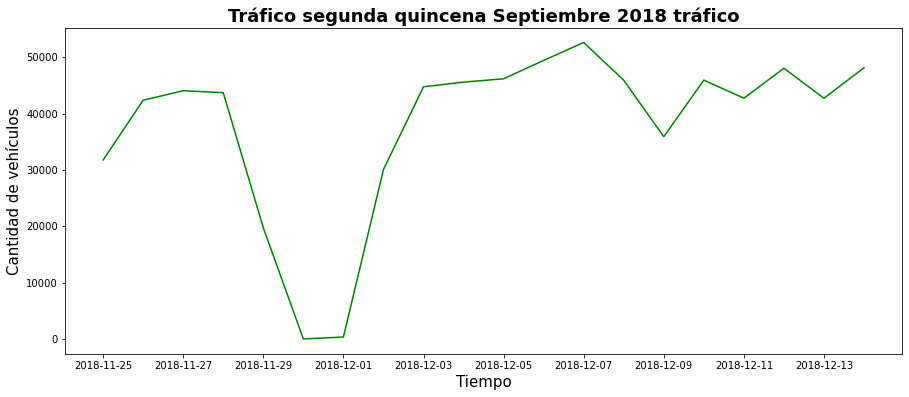

In [188]:
d18_dat1 = Añosproy_2[('2018-06-15' < Añosproy_2.fecha) & (Añosproy_2.fecha < '2018-07-01')]
d18_dat2 = Añosproy_2[('2018-09-15' < Añosproy_2.fecha) & (Añosproy_2.fecha < '2018-10-15')]
d18_dat3 = Añosproy_2[('2018-11-25' < Añosproy_2.fecha) & (Añosproy_2.fecha < '2018-12-15')]

D18L_dat1 = d18_dat1.resample('D', on = 'fecha').sum()
D18L_dat2 = d18_dat2.resample('D', on = 'fecha').sum()
D18L_dat3 = d18_dat3.resample('D', on = 'fecha').sum()

plt.figure(figsize = (15,6))
plt.plot(D18L_dat1.index, D18L_dat1.cantidad_pasos, "g")
plt.title("Tráfico primera quincena Mayo 2018 tráfico", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

plt.figure(figsize = (15,6))
plt.plot(D18L_dat2.index, D18L_dat2.cantidad_pasos, "g")
plt.title("Tráfico segunda quincena Junio 2018 tráfico", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

plt.figure(figsize = (15,6))
plt.plot(D18L_dat3.index, D18L_dat3.cantidad_pasos, "g")
plt.title("Tráfico segunda quincena Septiembre 2018 tráfico", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

**El 25/06 hay una bajada por haber paro general de transporte. El 25/09 hubo una bajada por haber una movilización masiva. El 30 de Noviembre y el 01 de Diciembre hubo una bajada por haber una cumbre del G20 en la Capital y no se podía ir al Centro.**

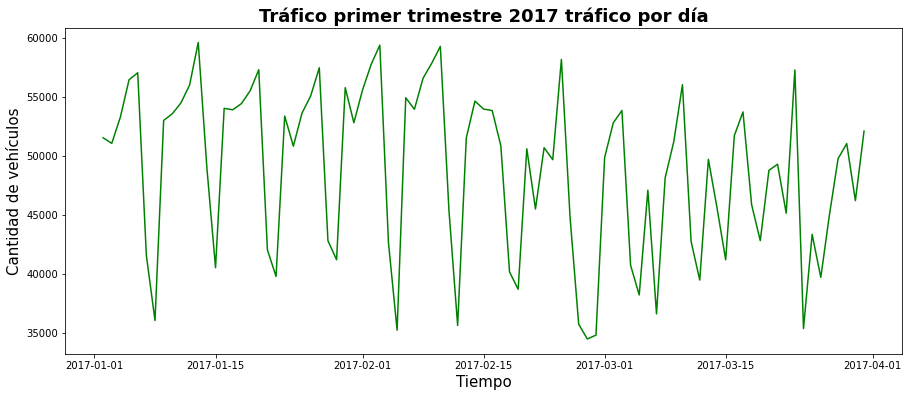

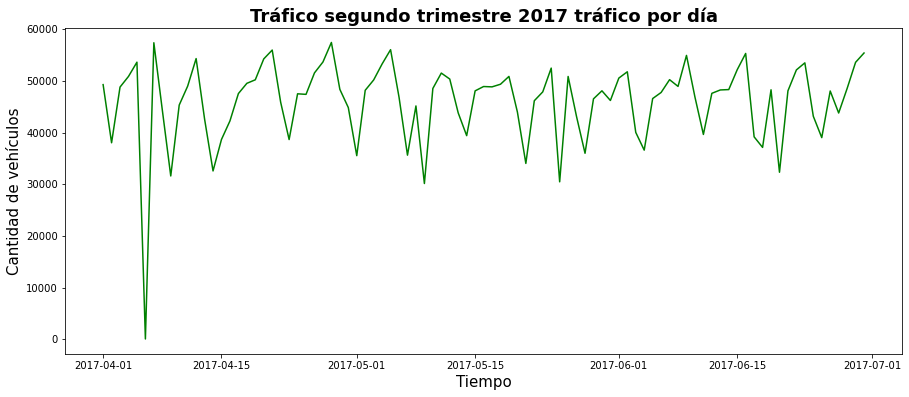

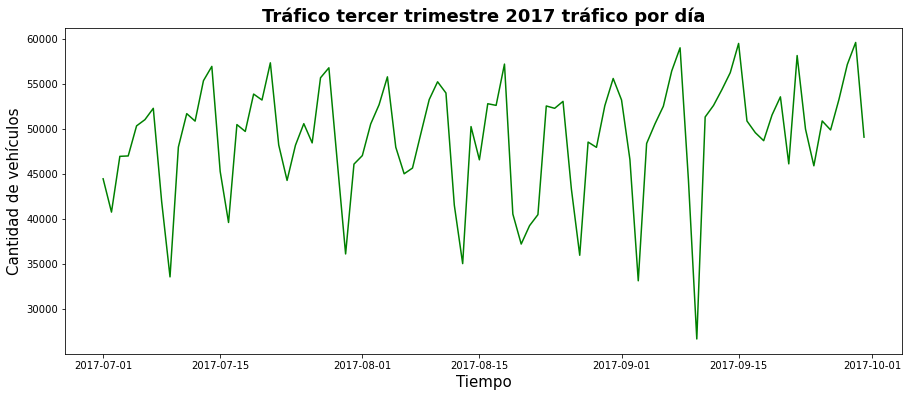

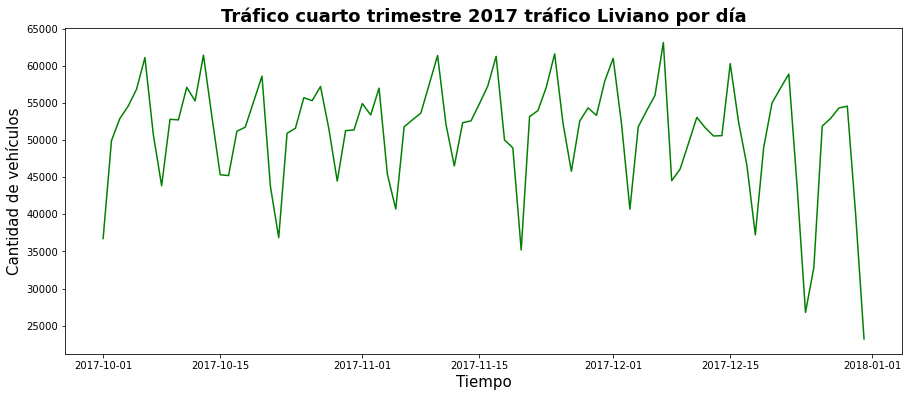

In [189]:
dtrimestre17_1 = Añosproy_2[('2017-01-01' <= Añosproy_2.fecha) & (Añosproy_2.fecha < '2017-04-01')]
dtrimestre17_2 = Añosproy_2[('2017-04-01' < Añosproy_2.fecha) & (Añosproy_2.fecha < '2017-07-01')]
dtrimestre17_3 = Añosproy_2[('2017-07-01' < Añosproy_2.fecha) & (Añosproy_2.fecha < '2017-10-01')]
dtrimestre17_4 = Añosproy_2[('2017-10-01' < Añosproy_2.fecha) & (Añosproy_2.fecha < '2018-01-01')]

D17L_1trim = dtrimestre17_1.resample('D', on = 'fecha').sum()
D17L_2trim = dtrimestre17_2.resample('D', on = 'fecha').sum()
D17L_3trim = dtrimestre17_3.resample('D', on = 'fecha').sum()
D17L_4trim = dtrimestre17_4.resample('D', on = 'fecha').sum()

plt.figure(figsize = (15,6))
plt.plot(D17L_1trim .index, D17L_1trim .cantidad_pasos, "g")
plt.title("Tráfico primer trimestre 2017 tráfico por día", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

plt.figure(figsize = (15,6))
plt.plot(D17L_2trim.index, D17L_2trim.cantidad_pasos, "g")
plt.title("Tráfico segundo trimestre 2017 tráfico por día", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize= 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

plt.figure(figsize = (15,6))
plt.plot(D17L_3trim .index, D17L_3trim .cantidad_pasos, "g")
plt.title("Tráfico tercer trimestre 2017 tráfico por día", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

plt.figure(figsize = (15,6))
plt.plot(D17L_4trim.index, D17L_4trim.cantidad_pasos, "g")
plt.title("Tráfico cuarto trimestre 2017 tráfico Liviano por día", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Se observa una **bajada atípica principios de abril.**

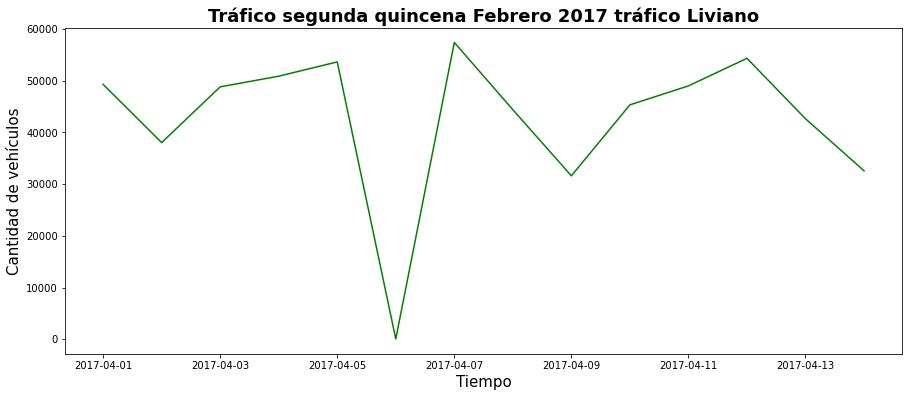

In [190]:
d17_dat1 = Añosproy_2[('2017-04-01' < Añosproy_2.fecha) & (Añosproy_2.fecha < '2017-04-15')]

D17L_dat1 = d17_dat1.resample('D', on = 'fecha').sum()

plt.figure(figsize = (15,6))
plt.plot(D17L_dat1.index, D17L_dat1.cantidad_pasos, "g", label = "Liviano")
plt.title("Tráfico segunda quincena Febrero 2017 tráfico Liviano", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

**El 6 de abril vemos una bajada atípica por haber habido un paro general.**

### 2. Tratamiento valores atípicos

In [191]:
at1 = Añosproy_2[('2019-05-29' == Añosproy_2.fecha) | (Añosproy_2.fecha == '2018-06-25') | (Añosproy_2.fecha == '2018-11-30') |  (Añosproy_2.fecha == '2018-12-01') | (Añosproy_2.fecha == '2017-04-06') | (Añosproy_2.fecha == '2018-09-25')]
at1

periodo tipo_vehiculo estacion    sentido  cantidad_pasos      fecha  \
126677     2018       Liviano    Illia     Centro               6 2018-12-01   
126678     2018       Liviano    Illia     Centro             149 2018-12-01   
126679     2018        Pesado    Illia     Centro               2 2018-12-01   
126683     2018       Liviano    Illia  Provincia              12 2018-12-01   
126684     2018       Liviano    Illia  Provincia             141 2018-12-01   
126685     2018        Pesado    Illia  Provincia               1 2018-12-01   
126686     2018        Pesado    Illia  Provincia               3 2018-12-01   

           dia forma_pago  
126677  Sábado   EFECTIVO  
126678  Sábado   EFECTIVO  
126679  Sábado   EFECTIVO  
126683  Sábado   EFECTIVO  
126684  Sábado   EFECTIVO  
126685  Sábado   EFECTIVO  
126686  Sábado   EFECTIVO

Vemos que **solo nos trajo datos del 01/12/2018**, no nos trajo datos de las otras fechas.

In [192]:
at2 = Añosproy_2[('2019-05-29' == Añosproy_2.fecha)]
at2

Empty DataFrame
Columns: [periodo, tipo_vehiculo, estacion, sentido, cantidad_pasos, fecha, dia, forma_pago]
Index: []

**Probamos la fecha del 29/05/2019 y vemos que no viene ningún dato**, por lo que suponemos que **la fecha no existe en el dataset porque no hay nada ingesado y lo mismo pasa con las otras fechas que no aparecen**, por lo que **vamos a tener que crear como nulo e instertar los nulos como hicimos antes** para poder tener un dataset más coherente. Vamos a hacer el **mismo procedimiento con la fecha del 01/12/2018** al ser muy atípico su comportamiento.

In [193]:
arregloperiodo = np.zeros(24*32)
arregloperiodo[:24*4] = 2019
arregloperiodo[24*4:24*28] = 2018
arregloperiodo[24*28:24*32] = 2017

arregloestacion = ['Illia']
arregloestacion = arregloestacion *24*32

arreglovehiculo = (['Liviano'] *24 + ['Pesado']*24 + ['Pesado']*24 + ['Liviano'] *24) *8

arreglosentido = (['Centro'] *24 + ['Provincia']*24 + ['Centro']*24 + ['Provincia'] *24)*8

lista = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
lista2 = lista *32
arreglohora = np.array(lista2)

arreglodia = np.zeros(24*32)
arreglodia[:24*4] = 29
arreglodia[24*4:24*8] = 25
arreglodia[24*8:24*12] = 25
arreglodia[24*12:24*16] = 29
arreglodia[24*16:24*20] = 30
arreglodia[24*20:24*24] = 1
arreglodia[24*24:24*28] = 2
arreglodia[24*28:24*32] = 6

arreglofecha1 = ['2019-05-29'] * 24 * 4 + ['2018-06-25'] * 24 * 4 + ['2018-09-25'] * 24 * 4 + ['2018-11-29'] * 24 * 4 + ['2018-11-30'] * 24 * 4 + ['2018-12-01'] * 24 * 4 + ['2018-12-02'] *24 * 4 + ['2017-04-06'] * 24 * 4  

arregloforma_pago = ['EFECTIVO']
arregloforma_pago = arregloforma_pago *24*32

falt1 = pd.DataFrame({'periodo':arregloperiodo,
                   'tipo_vehiculo':arreglovehiculo,
                    'estacion': arregloestacion,
                      'sentido' : arreglosentido,
                      'cantidad_pasos' : np.nan,
                      'hora' : arreglohora,
                      'fecha' : arreglofecha1,
                      'dia' : np.nan,
                      'forma_pago' : arregloforma_pago})
falt1

periodo tipo_vehiculo estacion    sentido  cantidad_pasos  hora  \
0     2019.0       Liviano    Illia     Centro             NaN     0   
1     2019.0       Liviano    Illia     Centro             NaN     1   
2     2019.0       Liviano    Illia     Centro             NaN     2   
3     2019.0       Liviano    Illia     Centro             NaN     3   
4     2019.0       Liviano    Illia     Centro             NaN     4   
..       ...           ...      ...        ...             ...   ...   
763   2017.0       Liviano    Illia  Provincia             NaN    19   
764   2017.0       Liviano    Illia  Provincia             NaN    20   
765   2017.0       Liviano    Illia  Provincia             NaN    21   
766   2017.0       Liviano    Illia  Provincia             NaN    22   
767   2017.0       Liviano    Illia  Provincia             NaN    23   

          fecha  dia forma_pago  
0    2019-05-29  NaN   EFECTIVO  
1    2019-05-29  NaN   EFECTIVO  
2    2019-05-29  NaN   EFECTIVO  
3    2019-05-29  NaN   EFECTIVO  
4    2019-05-29  NaN   EFECTIVO  
..          ...  ...        ...  
763  2017-04-06  NaN   EFECTIVO  
764  2017-04-06  NaN   EFECTIVO  
765  2017-04-06  NaN   EFECTIVO  
766  2017-04-06  NaN   EFECTIVO  
767  2017-04-06  NaN   EFECTIVO  

[768 rows x 9 columns]

**Creamos un dataset con las fechas en las que hay datos inexistentes e incluimos el 29/11/2018, el 01/12/2018 y el 02/12/2018 por ser una semana sumamente atípica por la cumbre del G20. Los datos creados están por día, por hora. La columna dia está con nulos porque le vamos a insertar el día de la semana ahí.**

In [194]:
falt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   periodo         768 non-null    float64
 1   tipo_vehiculo   768 non-null    object 
 2   estacion        768 non-null    object 
 3   sentido         768 non-null    object 
 4   cantidad_pasos  0 non-null      float64
 5   hora            768 non-null    int32  
 6   fecha           768 non-null    object 
 7   dia             0 non-null      float64
 8   forma_pago      768 non-null    object 
dtypes: float64(3), int32(1), object(5)
memory usage: 51.1+ KB


Vemos la info y antes de poder unirlo a nuestro dataset más grande **vamos a tener que hacer un preprocesamiento.**

In [195]:
falt2 = falt1.copy()

falt2['fecha2'] = pd.to_datetime(falt1.fecha) + pd.to_timedelta(falt1.hora, unit = 'h')

falt2.drop(columns=['fecha', 'hora'], inplace = True)

falt2.rename(columns = {'fecha2':'fecha'}, inplace = True) 

trans_dict_dia = {'Sunday':'Domingo', 'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Miércoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sábado'}

falt2['Day'] = falt2['fecha'].dt.day_name()
falt2['dia'] = falt2['Day']

falt2['dia'].replace(trans_dict_dia, inplace = True)
falt2.drop(columns = ['Day'], inplace = True)

falt2['periodo'] = falt2['periodo'].astype(int)

falt2['hora'] = falt2.apply(lambda x: x.fecha.hour, axis=1)
falt2['Mes'] = falt2.apply(lambda x: x.fecha.month, axis=1)
falt2['NDia'] = falt2.apply(lambda x: x.fecha.day, axis=1)

print(falt2.info())
falt2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   periodo         768 non-null    int32         
 1   tipo_vehiculo   768 non-null    object        
 2   estacion        768 non-null    object        
 3   sentido         768 non-null    object        
 4   cantidad_pasos  0 non-null      float64       
 5   dia             768 non-null    object        
 6   forma_pago      768 non-null    object        
 7   fecha           768 non-null    datetime64[ns]
 8   hora            768 non-null    int64         
 9   Mes             768 non-null    int64         
 10  NDia            768 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(5)
memory usage: 63.1+ KB
None


periodo tipo_vehiculo estacion    sentido  cantidad_pasos        dia  \
0       2019       Liviano    Illia     Centro             NaN  Miércoles   
1       2019       Liviano    Illia     Centro             NaN  Miércoles   
2       2019       Liviano    Illia     Centro             NaN  Miércoles   
3       2019       Liviano    Illia     Centro             NaN  Miércoles   
4       2019       Liviano    Illia     Centro             NaN  Miércoles   
..       ...           ...      ...        ...             ...        ...   
763     2017       Liviano    Illia  Provincia             NaN     Jueves   
764     2017       Liviano    Illia  Provincia             NaN     Jueves   
765     2017       Liviano    Illia  Provincia             NaN     Jueves   
766     2017       Liviano    Illia  Provincia             NaN     Jueves   
767     2017       Liviano    Illia  Provincia             NaN     Jueves   

    forma_pago               fecha  hora  Mes  NDia  
0     EFECTIVO 2019-05-29 00:00:00     0    5    29  
1     EFECTIVO 2019-05-29 01:00:00     1    5    29  
2     EFECTIVO 2019-05-29 02:00:00     2    5    29  
3     EFECTIVO 2019-05-29 03:00:00     3    5    29  
4     EFECTIVO 2019-05-29 04:00:00     4    5    29  
..         ...                 ...   ...  ...   ...  
763   EFECTIVO 2017-04-06 19:00:00    19    4     6  
764   EFECTIVO 2017-04-06 20:00:00    20    4     6  
765   EFECTIVO 2017-04-06 21:00:00    21    4     6  
766   EFECTIVO 2017-04-06 22:00:00    22    4     6  
767   EFECTIVO 2017-04-06 23:00:00    23    4     6  

[768 rows x 11 columns]

**Obtenemos el dato del día de la semana para la columna dia y también agregamos la columna Mes y el número de día. También cambiamos la columna fecha de tipo de dato string a datatime y le agregamos la hora.**

In [196]:
at3 = Añosproy_2[(('2019-05-30 00:00:00' < Añosproy_2.fecha) | ((Añosproy_2.fecha > '2018-12-02 23:00:00') & ('2019-05-29 00:00:00' > Añosproy_2.fecha)) | ((Añosproy_2.fecha > '2018-09-25 23:00:00 ') & (Añosproy_2.fecha < '2018-11-29 00:00:00')) | ((Añosproy_2.fecha > '2018-06-25 23:00:00 ') & (Añosproy_2.fecha < '2018-09-25 00:00:00')) | ((Añosproy_2.fecha > '2017-04-06 23:00:00') & (Añosproy_2.fecha < '2018-06-25 00:00:00 ')) | (Añosproy_2.fecha < '2017-04-06 00:00:00'))]
at3['hora'] = at3.apply(lambda x: x.fecha.hour, axis=1)
at3['Mes'] = at3.apply(lambda x: x.fecha.month, axis=1)
at3['NDia'] = at3.apply(lambda x: x.fecha.day, axis=1)

at3.head()

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


periodo tipo_vehiculo estacion    sentido  cantidad_pasos  \
0     2019       Liviano    Illia     Centro             537   
1     2019        Pesado    Illia     Centro               1   
2     2019       Liviano    Illia  Provincia             443   
3     2019        Pesado    Illia  Provincia               1   
4     2019       Liviano    Illia     Centro             769   

                fecha     dia forma_pago  hora  Mes  NDia  
0 2019-01-01 02:00:00  Martes   EFECTIVO     2    1     1  
1 2019-01-01 02:00:00  Martes   EFECTIVO     2    1     1  
2 2019-01-01 02:00:00  Martes   EFECTIVO     2    1     1  
3 2019-01-01 02:00:00  Martes   EFECTIVO     2    1     1  
4 2019-01-01 03:00:00  Martes   EFECTIVO     3    1     1

**Filtramos el dataset normal y le sacamos las fechas que luego le vamos a imputar con los datos nuevos.** También le agregamos las columnas de hora, Mes y NDia que las vamos a utilizar para poder agregar los datos nuevos luego.

In [197]:
print(falt2.Mes.unique())

[ 5  6  9 11 12  4]


Imprimimos los datos de los meses del dataset de los datos faltantes.

In [198]:
print(falt2[falt2.Mes == 5].dia.unique(), falt2[falt2.Mes == 5].periodo.unique())
print(falt2[falt2.Mes == 6].dia.unique(), falt2[falt2.Mes == 6].periodo.unique())
print(falt2[falt2.Mes == 9].dia.unique(), falt2[falt2.Mes == 9].periodo.unique())
print(falt2[falt2.Mes == 11].dia.unique(), falt2[falt2.Mes == 11].periodo.unique())
print(falt2[falt2.Mes == 12].dia.unique(), falt2[falt2.Mes == 12].periodo.unique())
print(falt2[falt2.Mes == 4].dia.unique(), falt2[falt2.Mes == 4].periodo.unique())

['Miércoles'] [2019]
['Lunes'] [2018]
['Martes'] [2018]
['Jueves' 'Viernes'] [2018]
['Sábado' 'Domingo'] [2018]
['Jueves'] [2017]


Vamos a ver según los meses los dias de la semana que le corresponde y los años en los cuáles se encuentran.

In [199]:
nuevo2 = at3[(((at3.dia == "Miércoles") & (at3.Mes == 5) & (at3.periodo == 2019))  | ((at3.dia == 'Lunes') & (at3.Mes == 6) & (at3.periodo == 2018)) | (('Martes' == at3.dia) & (at3.Mes == 9) & (at3.periodo == 2018)) | ((at3.dia == 'Viernes') & (at3.Mes == 11) & (at3.periodo == 2018))  | ((at3.dia == 'Jueves') & (at3.Mes == 11) & (at3.periodo == 2018)) | ((at3.dia == 'Sábado') & (at3.Mes == 12) & (at3.periodo == 2018)) | ((at3.dia == 'Domingo') & (at3.Mes == 12) & (at3.periodo == 2018)) | ((at3.dia == 'Jueves') & (at3.Mes == 4) & (at3.periodo == 2017)))]

nuevo3 = nuevo2['cantidad_pasos'].groupby([nuevo2.dia, nuevo2.hora, nuevo2.Mes, nuevo2.periodo, nuevo2.sentido, nuevo2['tipo_vehiculo'], nuevo2.NDia]).sum().astype(int).reset_index().rename(columns = {'cantidad_pasos' : 'suma'})

nuevo4 = nuevo3['suma'].groupby([nuevo3.dia, nuevo3.hora, nuevo3.Mes, nuevo3.periodo, nuevo3.sentido, nuevo3['tipo_vehiculo']]).mean().astype(int).reset_index().rename(columns = {'suma' : 'mean'})

nuevo4

dia  hora  Mes  periodo    sentido tipo_vehiculo  mean
0    Domingo     0   12     2018     Centro       Liviano   623
1    Domingo     0   12     2018     Centro        Pesado    11
2    Domingo     0   12     2018  Provincia       Liviano   640
3    Domingo     0   12     2018  Provincia        Pesado     6
4    Domingo     1   12     2018     Centro       Liviano   600
..       ...   ...  ...      ...        ...           ...   ...
763  Viernes    22   11     2018  Provincia        Pesado    17
764  Viernes    23   11     2018     Centro       Liviano   755
765  Viernes    23   11     2018     Centro        Pesado    15
766  Viernes    23   11     2018  Provincia       Liviano   797
767  Viernes    23   11     2018  Provincia        Pesado    15

[768 rows x 7 columns]

**Utilizamos los datos de los meses, día de la semana y año para hacer un filtrado del dataset sin los datos faltantes para quedarnos con menos datos.** Luego **hacemos un groupby sumando los datos por todas las columnas inclusive el número de día por lo que nos va a sumar la cantidad de vehiculos por cada día de la semana en el mes.** Por ejemplo suma toda la cantidad de vehiculos de cada hora de cada domingo del mes 12 del 2018 por sentido y por tipo de vehiculo. Luego, **sobre esa suma vamos a hacer un promedio para obtener el promedio de día de la semana de ese mes de ese año**. Por ejemplo, obtenemos el promedio de cantidad de vehiculos de cada hora de todos los domingos del mes 12 del 2018, ese promedio es por sentido y por cantidad de vehiculos. **Ese promedio es el que vamos a usar para imputar nuestros valores faltantes.**

In [200]:
nuevo5 = nuevo4.sort_values(by = ['periodo', 'dia','hora', 'sentido', 'tipo_vehiculo'])
nuevo6 = nuevo5.reset_index(drop = True)
nuevo6

dia  hora  Mes  periodo    sentido tipo_vehiculo  mean
0       Jueves     0    4     2017     Centro       Liviano   513
1       Jueves     0    4     2017     Centro        Pesado    30
2       Jueves     0    4     2017  Provincia       Liviano   546
3       Jueves     0    4     2017  Provincia        Pesado     6
4       Jueves     1    4     2017     Centro       Liviano   314
..         ...   ...  ...      ...        ...           ...   ...
763  Miércoles    22    5     2019  Provincia        Pesado    11
764  Miércoles    23    5     2019     Centro       Liviano   540
765  Miércoles    23    5     2019     Centro        Pesado     8
766  Miércoles    23    5     2019  Provincia       Liviano   553
767  Miércoles    23    5     2019  Provincia        Pesado    10

[768 rows x 7 columns]

**Ordenamos los datos anteriormente obtenidos por año, por hora, sentido y tipo de vehiculo** para poder insetar exactamente los mismos valores en el otro dataset. También reiniciamos el indíce.

In [201]:
falt3 = falt2.sort_values(by = ['periodo', 'dia', 'hora', 'sentido', 'tipo_vehiculo'])
falt4 = falt3.reset_index(drop = True)
falt4

periodo tipo_vehiculo estacion    sentido  cantidad_pasos        dia  \
0       2017       Liviano    Illia     Centro             NaN     Jueves   
1       2017        Pesado    Illia     Centro             NaN     Jueves   
2       2017       Liviano    Illia  Provincia             NaN     Jueves   
3       2017        Pesado    Illia  Provincia             NaN     Jueves   
4       2017       Liviano    Illia     Centro             NaN     Jueves   
..       ...           ...      ...        ...             ...        ...   
763     2019        Pesado    Illia  Provincia             NaN  Miércoles   
764     2019       Liviano    Illia     Centro             NaN  Miércoles   
765     2019        Pesado    Illia     Centro             NaN  Miércoles   
766     2019       Liviano    Illia  Provincia             NaN  Miércoles   
767     2019        Pesado    Illia  Provincia             NaN  Miércoles   

    forma_pago               fecha  hora  Mes  NDia  
0     EFECTIVO 2017-04-06 00:00:00     0    4     6  
1     EFECTIVO 2017-04-06 00:00:00     0    4     6  
2     EFECTIVO 2017-04-06 00:00:00     0    4     6  
3     EFECTIVO 2017-04-06 00:00:00     0    4     6  
4     EFECTIVO 2017-04-06 01:00:00     1    4     6  
..         ...                 ...   ...  ...   ...  
763   EFECTIVO 2019-05-29 22:00:00    22    5    29  
764   EFECTIVO 2019-05-29 23:00:00    23    5    29  
765   EFECTIVO 2019-05-29 23:00:00    23    5    29  
766   EFECTIVO 2019-05-29 23:00:00    23    5    29  
767   EFECTIVO 2019-05-29 23:00:00    23    5    29  

[768 rows x 11 columns]

**Ordenamos de la misma manera el dataset con los valores faltantes** para poder insertar exactamente los valores que le corresponden.

In [202]:
falt5 = falt4.copy()
falt5['cantidad_pasos'] = nuevo6['mean']
falt5

periodo tipo_vehiculo estacion    sentido  cantidad_pasos        dia  \
0       2017       Liviano    Illia     Centro             513     Jueves   
1       2017        Pesado    Illia     Centro              30     Jueves   
2       2017       Liviano    Illia  Provincia             546     Jueves   
3       2017        Pesado    Illia  Provincia               6     Jueves   
4       2017       Liviano    Illia     Centro             314     Jueves   
..       ...           ...      ...        ...             ...        ...   
763     2019        Pesado    Illia  Provincia              11  Miércoles   
764     2019       Liviano    Illia     Centro             540  Miércoles   
765     2019        Pesado    Illia     Centro               8  Miércoles   
766     2019       Liviano    Illia  Provincia             553  Miércoles   
767     2019        Pesado    Illia  Provincia              10  Miércoles   

    forma_pago               fecha  hora  Mes  NDia  
0     EFECTIVO 2017-04-06 00:00:00     0    4     6  
1     EFECTIVO 2017-04-06 00:00:00     0    4     6  
2     EFECTIVO 2017-04-06 00:00:00     0    4     6  
3     EFECTIVO 2017-04-06 00:00:00     0    4     6  
4     EFECTIVO 2017-04-06 01:00:00     1    4     6  
..         ...                 ...   ...  ...   ...  
763   EFECTIVO 2019-05-29 22:00:00    22    5    29  
764   EFECTIVO 2019-05-29 23:00:00    23    5    29  
765   EFECTIVO 2019-05-29 23:00:00    23    5    29  
766   EFECTIVO 2019-05-29 23:00:00    23    5    29  
767   EFECTIVO 2019-05-29 23:00:00    23    5    29  

[768 rows x 11 columns]

In [203]:
falt5[falt5.dia == 'Domingo']

periodo tipo_vehiculo estacion    sentido  cantidad_pasos      dia  \
96      2018       Liviano    Illia     Centro             623  Domingo   
97      2018        Pesado    Illia     Centro              11  Domingo   
98      2018       Liviano    Illia  Provincia             640  Domingo   
99      2018        Pesado    Illia  Provincia               6  Domingo   
100     2018       Liviano    Illia     Centro             600  Domingo   
..       ...           ...      ...        ...             ...      ...   
187     2018        Pesado    Illia  Provincia              10  Domingo   
188     2018       Liviano    Illia     Centro             900  Domingo   
189     2018        Pesado    Illia     Centro              14  Domingo   
190     2018       Liviano    Illia  Provincia             638  Domingo   
191     2018        Pesado    Illia  Provincia               6  Domingo   

    forma_pago               fecha  hora  Mes  NDia  
96    EFECTIVO 2018-12-02 00:00:00     0   12     2  
97    EFECTIVO 2018-12-02 00:00:00     0   12     2  
98    EFECTIVO 2018-12-02 00:00:00     0   12     2  
99    EFECTIVO 2018-12-02 00:00:00     0   12     2  
100   EFECTIVO 2018-12-02 01:00:00     1   12     2  
..         ...                 ...   ...  ...   ...  
187   EFECTIVO 2018-12-02 22:00:00    22   12     2  
188   EFECTIVO 2018-12-02 23:00:00    23   12     2  
189   EFECTIVO 2018-12-02 23:00:00    23   12     2  
190   EFECTIVO 2018-12-02 23:00:00    23   12     2  
191   EFECTIVO 2018-12-02 23:00:00    23   12     2  

[96 rows x 11 columns]

Insertamos los datos del promedio en la columna de cantidad_pasos y vemos nuestro dataset con los valores nuevos insertados.

In [204]:
Añosproy_3 = at3.append(falt5)
print(Añosproy_3.isnull().sum())
Añosproy_4 = Añosproy_3.drop(['hora', 'Mes', 'NDia'], axis = 1).reset_index(drop = True)
Añosproynull = Añosproy_4.isnull()

periodo           0
tipo_vehiculo     0
estacion          0
sentido           0
cantidad_pasos    0
fecha             0
dia               0
forma_pago        0
hora              0
Mes               0
NDia              0
dtype: int64


Observmaos como ahora no hay datos nulos.

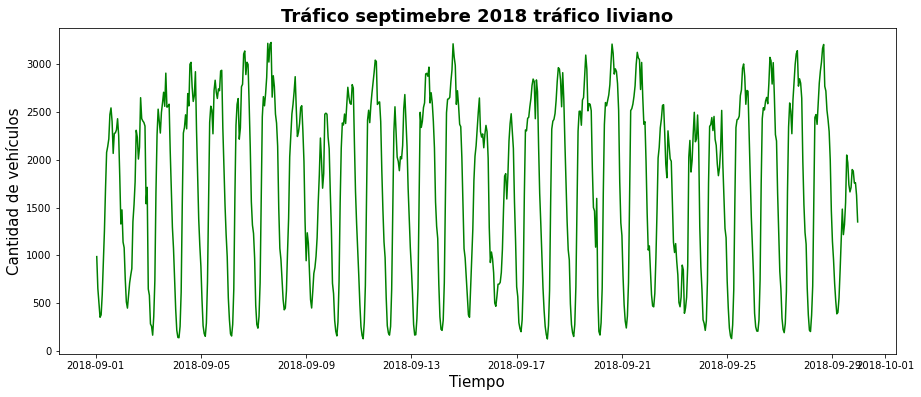

In [205]:
d19n = Añosproy_4[('2018-09-01' < Añosproy_4.fecha) & (Añosproy_4.fecha < '2018-09-30')]

d19LH = d19n.resample('H', on = 'fecha').sum()

plt.figure(figsize = (15,6))
plt.plot(d19LH.index, d19LH.cantidad_pasos, "g")
plt.title("Tráfico septimebre 2018 tráfico liviano", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos como queda nuestro **dataset por ejemplo para el 25/09/2018 que hubo paro** y vemos como además de **ya no estar inexistente, se comporta como un martes normal de ese mes.**

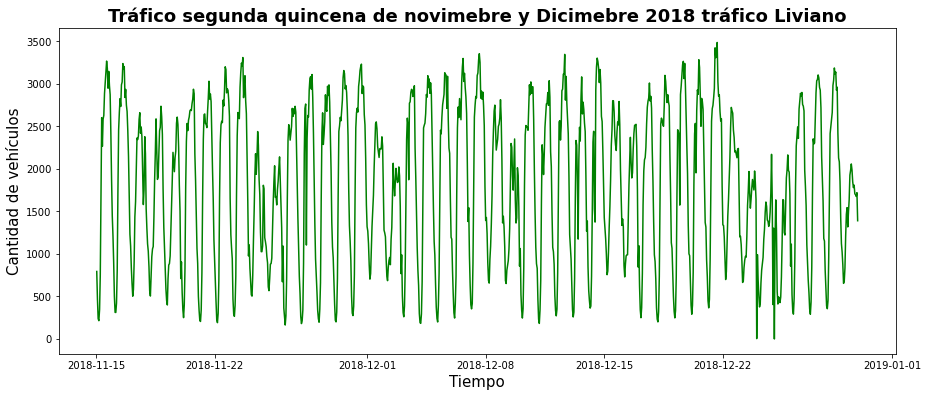

In [206]:
d18_dat4_3 = Añosproy_3[('2018-11-15' < Añosproy_3.fecha) & (Añosproy_3.fecha < '2018-12-30')]

H18L_dat4_3 = d18_dat4_3.resample('H', on = 'fecha').sum()

plt.figure(figsize = (15,6))
plt.plot(H18L_dat4_3.index, H18L_dat4_3.cantidad_pasos, "g")
plt.title("Tráfico segunda quincena de novimebre y Dicimebre 2018 tráfico Liviano", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Observamos como quedaron los datos desde mitad de Noviembre a finales de Dicimebre y vemos como los **4 días que teníamos extraños por la cumbre del G20 ya se normalizaron.**

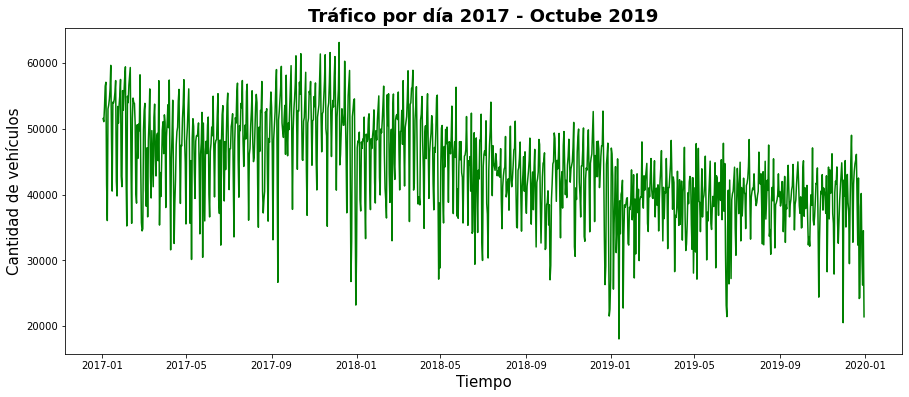

In [207]:
Dproy = Añosproy_4.resample('D', on = 'fecha').sum()

plt.figure(figsize = (15,6))
plt.plot(Dproy.index, Dproy.cantidad_pasos, "g", label = "Liviano")
plt.title("Tráfico por día 2017 - Octube 2019", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Obervamos como queda nuestro dataset con **picos bajos normales en Enero del 2018 y 2019 por las vacaciones de verano**, así como también **picos bajos por Junio de ambos años por las vaciones de invierno.** Hay un pico bajo en Septiembre del 2017, pero no pudimos encontrar una razón vàlida para ello.

### 3. TENDENCIA, ESTACIONALIDAD Y RUIDO

In [208]:
Añosproy_5 = Añosproy_4.copy()
print(Añosproy_5.shape)
Añosproy_5.head()

(238956, 8)


periodo tipo_vehiculo estacion    sentido  cantidad_pasos  \
0     2019       Liviano    Illia     Centro             537   
1     2019        Pesado    Illia     Centro               1   
2     2019       Liviano    Illia  Provincia             443   
3     2019        Pesado    Illia  Provincia               1   
4     2019       Liviano    Illia     Centro             769   

                fecha     dia forma_pago  
0 2019-01-01 02:00:00  Martes   EFECTIVO  
1 2019-01-01 02:00:00  Martes   EFECTIVO  
2 2019-01-01 02:00:00  Martes   EFECTIVO  
3 2019-01-01 02:00:00  Martes   EFECTIVO  
4 2019-01-01 03:00:00  Martes   EFECTIVO

Volvemos a visualizar el dataset.

In [209]:
Dpory5 = Añosproy_5.copy()
Dproy5 = Añosproy_5.resample('D', on = 'fecha').sum()
Dproy6 = Dproy5.drop(['periodo'], axis = 1).reset_index()
print(Dproy6.shape)
Dproy6.head()

(1094, 2)


fecha  cantidad_pasos
0 2017-01-02           51568
1 2017-01-03           51093
2 2017-01-04           53332
3 2017-01-05           56486
4 2017-01-06           57081

Hacemos un resample por día del dataset.

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot de tráfico por día')

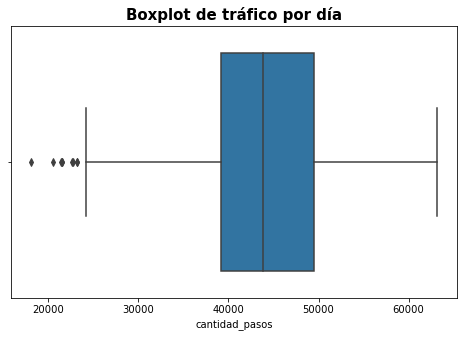

In [210]:
plt.figure(figsize = (8,5))
sns.boxplot(Dproy6['cantidad_pasos'])
plt.title("Boxplot de tráfico por día", fontsize = 15, fontweight="bold")

Observamos los outliers dentro de la cantidad_pasos y vemos que hay algunos por abajo de 25000.

In [211]:
def outliers (v,d):
  q25 = v[d].quantile(0.25)
  q75 = v[d].quantile(0.75)
  iqr = q75 - q25
  mascara_outliers = v[(v[d] < q25 - iqr * 1.5) | (v[d] > q75 + iqr * 1.5)]
  print(q25,q75,iqr)
  print(mascara_outliers.shape)
  return (mascara_outliers)

Dproy6O = outliers(Dproy6, 'cantidad_pasos')
Dproy6O

39139.5 49548.75 10409.25
(9, 2)


fecha  cantidad_pasos
363  2017-12-31           23229
727  2018-12-30           21559
728  2018-12-31           22599
741  2019-01-13           18076
747  2019-01-19           22774
895  2019-06-16           23190
896  2019-06-17           21469
1063 2019-12-01           20553
1093 2019-12-31           21447

Hacemos una visualización de los cuantiles por abajo del 25% - el intercuatilico y por arriba del 75% + eñ intercuartilico y observamos que son todos menores a 24000. 

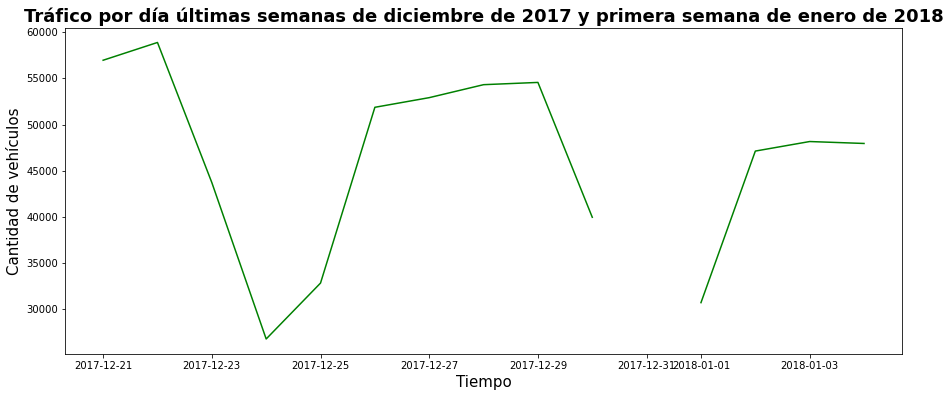

In [212]:
Dproy6_2 = Dproy6.set_index(Dproy6.columns[0])

Dproy6_2['cantidad_pasos'][Dproy6_2['cantidad_pasos'] < 24000] = np.nan

Dproy6f = Dproy6_2[(Dproy6_2.index < '2018-01-05') & (Dproy6_2.index > '2017-12-20')]

plt.figure(figsize = (15,6))
plt.plot(Dproy6f.index, Dproy6f.cantidad_pasos, "g", label = "Liviano")
plt.title("Tráfico por día últimas semanas de diciembre de 2017 y primera semana de enero de 2018", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehículos', fontsize = 15)
plt.show()

Hacemos un filtro poniendo como nulos a los menores a 24000 y observamos que ya no está uno de los datos.

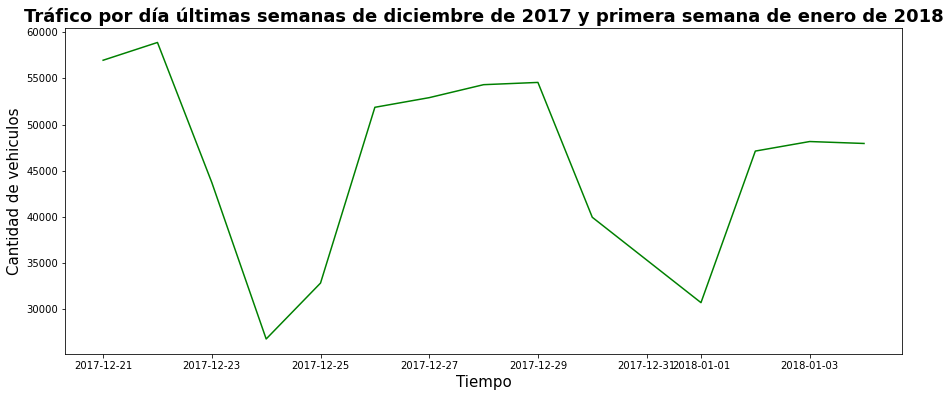

In [213]:
Dproy_7 = Dproy6_2.copy()
Dproy_8 = Dproy_7.interpolate()

Dproy8f = Dproy_8[(Dproy_8.index < '2018-01-05') & (Dproy_8.index > '2017-12-20')]

plt.figure(figsize = (15,6))
plt.plot(Dproy8f.index, Dproy8f.cantidad_pasos, "g", label = "Liviano")
plt.title("Tráfico por día últimas semanas de diciembre de 2017 y primera semana de enero de 2018", fontsize = 18, fontweight="bold")
plt.xlabel('Tiempo', fontsize = 15)
plt.ylabel('Cantidad de vehiculos', fontsize = 15)
plt.show()

Hacemos un interpolate y vemos como se rellenó la cantidad de vehiculos.

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot de tráfico por día')

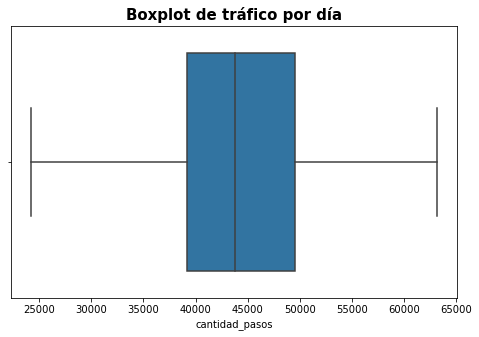

In [214]:
plt.figure(figsize = (8,5))
sns.boxplot(Dproy_8['cantidad_pasos'])
plt.title("Boxplot de tráfico por día", fontsize = 15, fontweight="bold")

Observamos como ya no hay outliers

In [215]:
Dproy_8

cantidad_pasos
fecha                     
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0
2017-01-06         57081.0
...                    ...
2019-12-27         40182.0
2019-12-28         30681.0
2019-12-29         26259.0
2019-12-30         34523.0
2019-12-31         34523.0

[1094 rows x 1 columns]

Volvemos a visualizar el dataset por día que nos quedó.

In [216]:
result = seasonal_decompose(Dproy_8['cantidad_pasos'], model='additive')

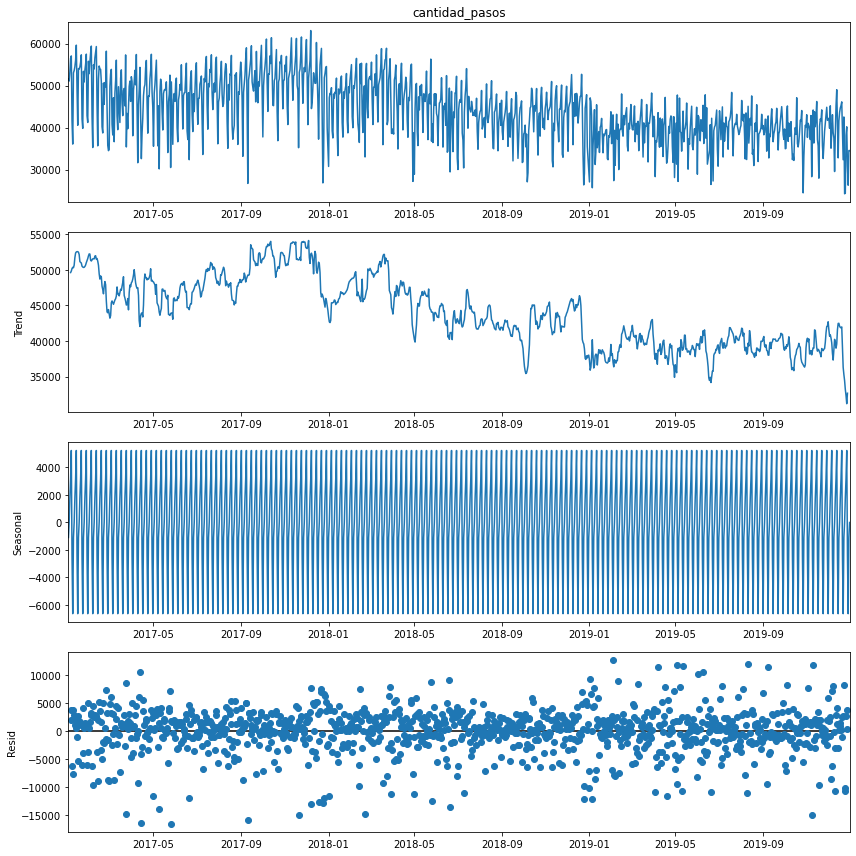

In [217]:
plt.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

Observamos una **clara tendencia negativa desde 2017 a 2019 en cuanto a la cantidad de vehiculos que pagan en Efectivo y transitan por la autopista Ilía. Esto puede ser causa a lo anteriormente comentado del cambio de método de pago de Efectivo a Telepase y no por la cantidad de disminusión de vehiculos en general.** En el componente de estacionalidad vemos que hay **cambios hasta +4000 vehiculos por día y hasta -6000 vehiculos por día.** **Los componentes de redisualidad vemos que se conentran mucho cerca del 0.**

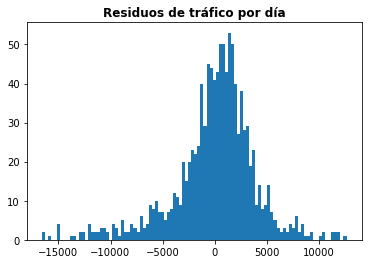

In [218]:
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 100)
plt.title("Residuos de tráfico por día", fontsize = 12, fontweight="bold")
plt.show()

Vemos como nuestro ruido blanco tiene una **distribución normal.**

In [219]:
nlags =  100
autocorr = acf(Dproy_8['cantidad_pasos'], nlags = nlags)
autocorr.shape

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


(101,)

Hacemos una **autocorrelación de 100 días**, es decir se compara 1 día con el anterior y así hasta el 100 anterior.

Text(0.5, 1.0, 'Autocorrelograma')

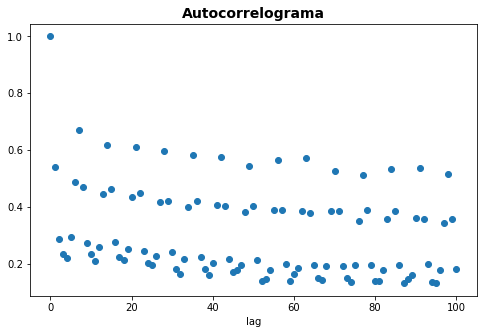

In [220]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')
plt.title("Autocorrelograma", fontsize = 14, fontweight="bold")

Observamos el autoccorelograma, se ve como **los puntos de más arriba son los que se dan cada siete días**, es decir un día de semana comparado al anterior, **ejemplo, miércoles contra miércoles.** Luego hay **otros dos puntos en el medio que son el día anterior y el siguiente** y **cuatro puntos abajo que serían los otros cuatro días de la semana.**

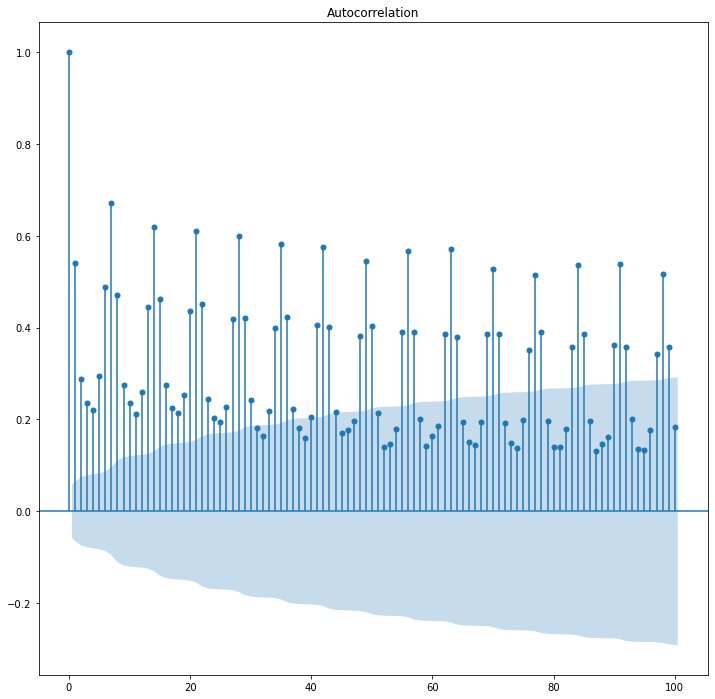

In [221]:
plot_acf(Dproy_8['cantidad_pasos'], lags = 100)
plt.show()

En este gráfico observamos **lo mismo que el anterior con mayor claridad**, viendo como los días en el medio son justo el anterior y el siguiente al día d ela semana.

### CONCLUSIÓN

- Los valores atípicos que hemos observado son correspondientes a paros, los días del G20 y  feriados. Observamos que para los paros y los días del G20 los valores llegaron a 0 por lo que no hubo registros esos días. Los hemos tratado con un tratamiento para imputar esos datos. Los feriados no los hemos tratado.
- Tendencia negativa desde 2017 a 2019 en cuanto a la cantidad de vehiculos que pagan en Efectivo y transitan por la autopista Ilía. Esto puede ser causa del cambio de método de pago de Efectivo a Telepase y no por la cantidad de disminusión de vehiculos en general.
- Componentes de estacionalidad tiene máximos de 4000 vehículos y mínimos de 6000 por lo que oscila en esos rangos el tráfico por día, con +4000/-6000. 
- La redisualidad se concetró mucho cerca de 0 con una distribución normal.
- En la autocorrelación hay una alta correlación cada 7 días y una un poco menor el día anterior y posterior y una correlación menor con los otros días. A medida que se aleja más en el tiempo tiene una correlación menor.

## MODELOS

Procedemos con la investigación de los modelos. Vamos a investigar modelo de Benchmark de regresión lineal, Rolling Window, RandomForestRegressor, XGBoostRegressor, ARIMA y PROPHET.

In [222]:
Dproy_9 = Dproy_8.copy()
print(Dproy_9.shape)
Dproy_9.head()

(1094, 1)


cantidad_pasos
fecha                     
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0
2017-01-06         57081.0

### **1. REGRESIÓN LINEAL (BENCHMARK)**

Vamos a utilizar una regresión lineal con benchmark.

In [223]:
m1D = Dproy_9.reset_index()
m1D.head()

fecha  cantidad_pasos
0 2017-01-02         51568.0
1 2017-01-03         51093.0
2 2017-01-04         53332.0
3 2017-01-05         56486.0
4 2017-01-06         57081.0

Volvemos a visualizar nuestro dataset por día.

In [224]:
m2D = m1D.copy()
m2D['fecha_numeros'] = m2D.apply(lambda x: x.fecha.toordinal(), axis=1)
m2D

fecha  cantidad_pasos  fecha_numeros
0    2017-01-02         51568.0         736331
1    2017-01-03         51093.0         736332
2    2017-01-04         53332.0         736333
3    2017-01-05         56486.0         736334
4    2017-01-06         57081.0         736335
...         ...             ...            ...
1089 2019-12-27         40182.0         737420
1090 2019-12-28         30681.0         737421
1091 2019-12-29         26259.0         737422
1092 2019-12-30         34523.0         737423
1093 2019-12-31         34523.0         737424

[1094 rows x 3 columns]

Pasamos nuestra fecha a números para utilizar esa data en el modelo.

In [225]:
lr = LinearRegression()

X_train_fecha = m2D.fecha[m2D.fecha < '2019/10/01']
X_test_fecha = m2D.fecha[m2D.fecha > '2019/10/01']

X_train = m2D[m2D.fecha < '2019/10/01'].fecha_numeros.values.reshape(-1, 1)
X_test = m2D[m2D.fecha > '2019/10/01'].fecha_numeros.values.reshape(-1, 1)

y_train = m2D['cantidad_pasos'][m2D.fecha < '2019/10/01']
y_test = m2D['cantidad_pasos'][m2D.fecha > '2019/10/01']
 
lr.fit(X_train, y_train)

LinearRegression()

Nuestro **train va a ser desde antes de Octubre del 2019** y **nuestro test después de Octubre del 2019 por ser el útlimos trimestre del 2019 y el cuál queremos predecir.**

In [226]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

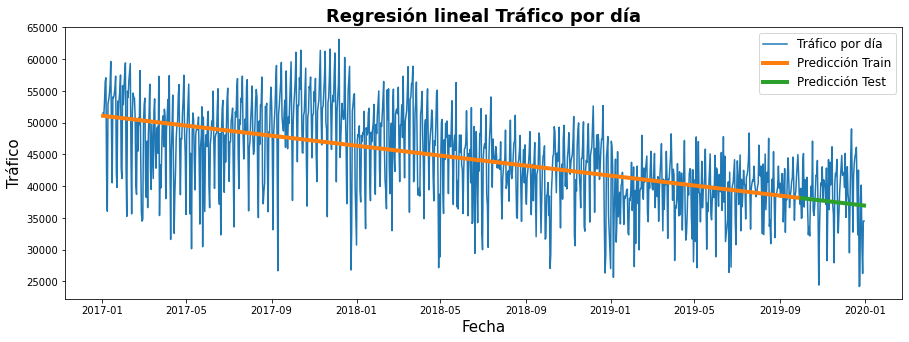

In [227]:
plt.figure(figsize = (15,5))
plt.plot(m2D.fecha, m2D['cantidad_pasos'], label = "Tráfico por día")
plt.plot(X_train_fecha, y_train_pred, lw = 4, label = 'Predicción Train')
plt.plot(X_test_fecha, y_test_pred, lw = 4, label = 'Predicción Test')
plt.xlabel('Fecha', fontsize = 15)
plt.yticks(fontsize = 10)
plt.ylabel("Tráfico", fontsize = 15)
plt.title("Regresión lineal Tráfico por día", fontsize = 18, fontweight="bold")
plt.legend(fontsize = 12, loc = 'upper right')
plt.show()

Observamos como se comporta el modelo lineal comparado con nuestra serie en días. Se ve una tendencia en baja como lo anteriormente observado.

In [228]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 6154.354461560378
Raíz del error cuadrático medio en Test: 5316.887965005764


Observamos nuestro **RMSE de Test de 5316** y observamos que no tiene mucha diferencia con el train.

### **2. ROLLING WINDOW**

In [229]:
ventana = int(7)
diario_promedio_tendencia = m2D['cantidad_pasos'].rolling(window=ventana, center = False).mean()
dpt = pd.DataFrame(diario_promedio_tendencia)
dpt['fecha'] = m2D['fecha']
dpt

cantidad_pasos      fecha
0                NaN 2017-01-02
1                NaN 2017-01-03
2                NaN 2017-01-04
3                NaN 2017-01-05
4                NaN 2017-01-06
...              ...        ...
1089    34441.428571 2019-12-27
1090    33209.714286 2019-12-28
1091    32341.428571 2019-12-29
1092    31197.428571 2019-12-30
1093    32669.285714 2019-12-31

[1094 rows x 2 columns]

Utilizamos un **rolling window de una semana** que nos parece una buena ventana de tiempo para el promedio movil.

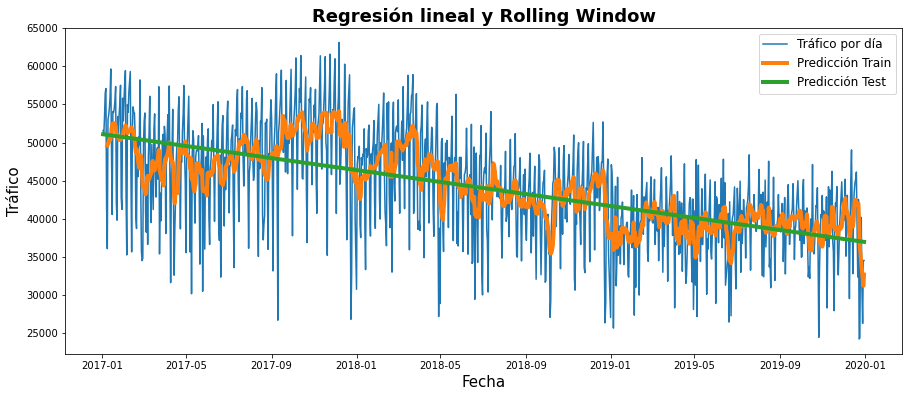

In [230]:
plt.figure(figsize = (15,6))
plt.plot(m2D.fecha, m2D['cantidad_pasos'], label = 'Tráfico por día')
plt.plot(dpt.fecha, dpt['cantidad_pasos'], lw = 4, label = 'Predicción Train')
plt.plot(m2D.fecha, lr.predict(m2D.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Predicción Test')
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Tráfico', fontsize = 15)
plt.title("Regresión lineal y Rolling Window", fontsize = 18, fontweight="bold")
plt.legend(fontsize = 12, loc = 'upper right')
plt.show()

Observamos como se visualiza con la rolling window de una semana comparado al de la regresión lineal.

In [231]:
y_train2 = y_train[y_train.index < 995]
y_train2

0      51568.0
1      51093.0
2      53332.0
3      56486.0
4      57081.0
        ...   
990    41326.0
991    44596.0
992    40820.0
993    34646.0
994    38523.0
Name: cantidad_pasos, Length: 995, dtype: float64

In [232]:
dpt2 = dpt['cantidad_pasos'][dpt.fecha> '2019/10/01']
dpt3 = dpt['cantidad_pasos'][(dpt.fecha> '2017/01/08') & (dpt.fecha< '2019/10/01')]

train_rmse = np.sqrt(mean_squared_error(y_train2, dpt3))
test_rmse = np.sqrt(mean_squared_error(y_test, dpt2))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 5906.464037274884
Raíz del error cuadrático medio en Test: 4766.084267369231


Observamos el **error en Test que bajó a 4766.**

In [233]:
final = {"Modelo":["Benchmark", "Rolling Window"], 
           "Hiper-parámetros":["default", "7 días"], 
           "Variables X": ["tráfico", "tráfico"], "RMSE (test)":["~5316", "~4766"], "Diferencia RMSE Test-Train":["~800", "~1200"]}
pd.DataFrame(final)

Modelo Hiper-parámetros Variables X RMSE (test)  \
0       Benchmark          default     tráfico       ~5316   
1  Rolling Window           7 días     tráfico       ~4766   

  Diferencia RMSE Test-Train  
0                       ~800  
1                      ~1200

### **3. RANDOM FOREST REGRESSOR**

Vamos a probar dos modelos Random Forest Regressor, uno poniendo las variables de X solo con cantidad_pasos y otra poniendo cada día como variable.

1 6021.635291862055 5638.770605050272
2 5839.600772618242 5245.541081962047
3 5626.2162160892585 5280.242117289809
4 5463.115618058132 5316.797164808795
5 5242.072623168687 5322.163674430603
6 4994.81895308354 5337.162520712492
7 4699.502980867451 5312.989342254952
8 4382.513529905459 5339.757826037745
9 4044.632692201524 5265.158822390238
10 3697.2235188716904 5255.388033496567


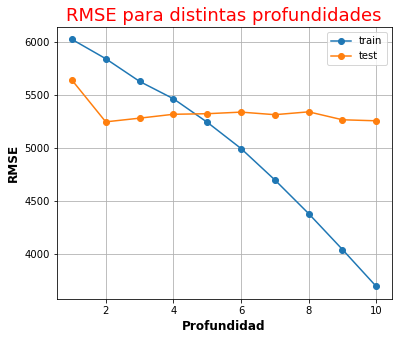

In [234]:
lista_rmse_train = []
lista_rmse_test = []

depth = [1,2,3,4,5,6,7,8,9,10]

for m in depth:
  bosque = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4, max_depth=m)
  bosque.fit(X_train, y_train)
  y_train_pred = bosque.predict(X_train)
  y_test_pred = bosque.predict(X_test) 
  
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

  print(m, train_rmse, test_rmse)

  lista_rmse_train.append(train_rmse)
  lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(depth, lista_rmse_train,'o-',label='train' )
plt.plot(depth, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("RMSE para distintas profundidades", fontsize = 18, color = "r")

plt.show()

Observamos como la mejor profundidad para el Random Forest con las variables de cantidad_pasos es 5, luego se seaparan mucho los errores. **Para la profundidad 5 el RMSE de test es 5322.**

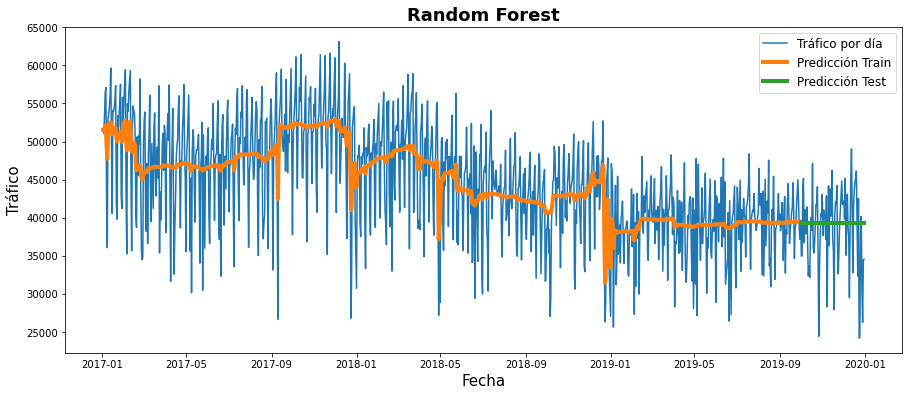

In [235]:
bosque = RandomForestRegressor(max_depth=5)
bosque.fit(X_train, y_train)
y_train_pred = bosque.predict(X_train)
y_test_pred = bosque.predict(X_test) 

plt.figure(figsize = (15,6))
plt.plot(m2D.fecha, m2D['cantidad_pasos'], label = 'Tráfico por día')
plt.plot(X_train_fecha, y_train_pred, lw = 4, label = 'Predicción Train')
plt.plot(X_test_fecha, y_test_pred, lw = 4, label = 'Predicción Test')
plt.title("Random Forest", fontsize = 18, fontweight="bold")
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Tráfico', fontsize = 15)
plt.legend(fontsize = 12, loc = 'upper right')
plt.show()

Observamos como queda el gráfico y que para test no suma mucho.

Hacemos un **segundo modelo de Random Forest utilizando un look back y las instancias como variables para el modelo.**

In [236]:
m2D_2 = Dproy_9.copy()

In [237]:
look_back = 100

N = m2D_2.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(993, 100) (993,)


Hacemos un look back de 100 días y hacemos dos arrays, uno con los días menos el look back menos 1 y el look back y otro con solo los días menos el look back menos 1.

In [238]:
for i in range(X.shape[0]):
    X[i,:] = m2D_2['cantidad_pasos'].iloc[i:i+look_back]
    y[i] = m2D_2['cantidad_pasos'].iloc[i+look_back]

In [239]:
N_train = 1093 - 100 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 100 #cantidad de puntos que vamos a usar para evaluar

N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train2 = X[:N_train,:]
y_train2 = y[:N_train]
print(X_train2.shape, y_train2.shape)

X_test2 = X[N_train:N_train+N_test,:]
y_test2 = y[N_train:N_train+N_test]
print(X_test2.shape, y_test2.shape)

(893, 100) (893,)
(100, 100) (100,)


In [240]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train2,y_train2)

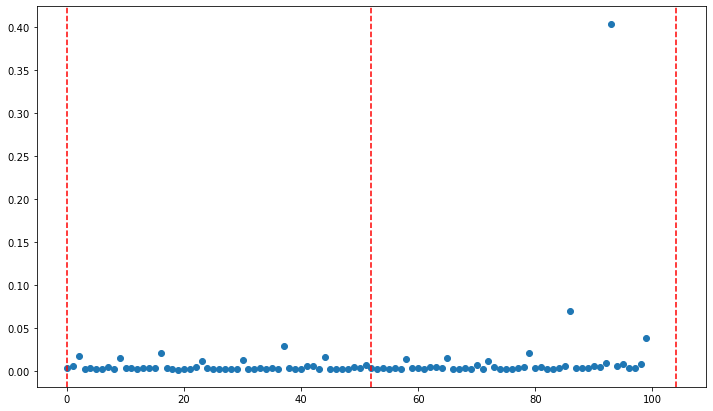

In [241]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(3)*52:
  plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

Observamos la importancia de las instancias del look back y vemos como **hay mayor importancia cada 7 días por ser el mismo día de la semana**, ejemplo miércoles y miércoles de la semana anterior. Observamos un pico muy alto en el día 94 también.

In [242]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train2)
y_test_pred = rf.predict(X_test2)

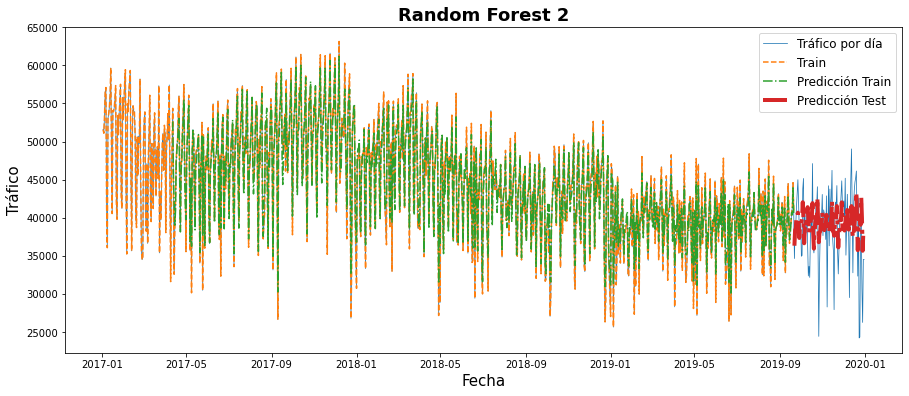

In [243]:
plt.figure(figsize=(15,6))
plt.plot(m2D_2.index, m2D_2['cantidad_pasos'] ,lw = 0.75, label = 'Tráfico por día')
plt.plot(m2D_2.index[:N_train + look_back], m2D_2[:N_train + look_back],'--', label = 'Train')
plt.plot(m2D_2.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicción Train')
plt.plot(m2D_2.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicción Test')
plt.legend(fontsize = 12, loc = 'upper right')
plt.title("Random Forest 2", fontsize = 18, fontweight="bold")
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Tráfico', fontsize = 15)
plt.show()

Observamos el gráfico y vemos que se ajusta un poco mejor la predicción.

In [244]:
train_rmse = np.sqrt(mean_squared_error(y_train2, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test2, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 1688.8853658762566
Raíz del error cuadrático medio en Test: 4495.333816881781


Observamos que **mejora nuestro error en Test a 4495, pero hay bastate overfitting.**

### **3. XGBoost**

Para el XGBoost Regressor vamos a hacer el mismo procedimiento que para el Random Forest.

In [245]:
X_train = m2D[m2D.fecha < '2019/10/01'].fecha_numeros.values.reshape(-1, 1)
X_test = m2D[m2D.fecha > '2019/10/01'].fecha_numeros.values.reshape(-1, 1)

y_train = m2D['cantidad_pasos'][m2D.fecha < '2019/10/01']
y_test = m2D['cantidad_pasos'][m2D.fecha > '2019/10/01']

[22:09:02] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


1 5647.6268432814195 5357.9208776248315
[22:09:02] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


2 4903.843048362842 5222.0214417192565
[22:09:02] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verif

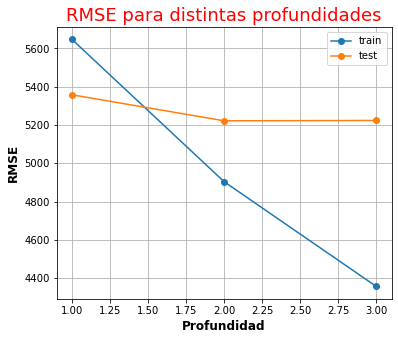

In [246]:
lista_rmse_train = []
lista_rmse_test = []

depth = [1,2,3]

for d in depth:
  XGBR = xgb.XGBRegressor(max_depth=d, silent = True)
  XGBR.fit(X_train, y_train)
  y_train_pred = XGBR.predict(X_train)
  y_test_pred = XGBR.predict(X_test) 
  
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

  print(d, train_rmse, test_rmse)

  lista_rmse_train.append(train_rmse)
  lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(depth, lista_rmse_train,'o-',label='train' )
plt.plot(depth, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("RMSE para distintas profundidades", fontsize = 18, color = "r")

plt.show()

Observamos el modelo de XGBoost y vemos que **la mejor profundidad es de 2 y para ese modelo el RMSE de Test es de 5222.**

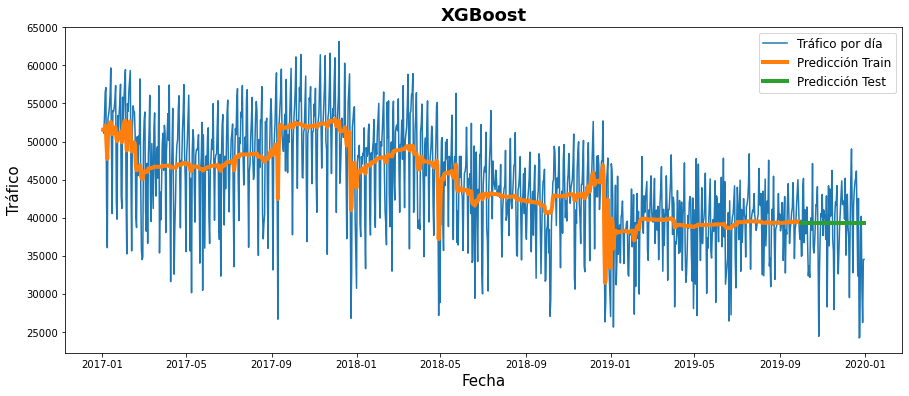

In [247]:
XGBR = xgb.XGBRegressor(max_depth=2)
XGBR.fit(X_train, y_train)
y_train_pred = bosque.predict(X_train)
y_test_pred = bosque.predict(X_test) 

plt.figure(figsize = (15,6))
plt.plot(m2D.fecha, m2D['cantidad_pasos'], label = 'Tráfico por día')
plt.plot(X_train_fecha, y_train_pred, lw = 4, label = 'Predicción Train')
plt.plot(X_test_fecha, y_test_pred, lw = 4, label = 'Predicción Test')
plt.title("XGBoost", fontsize = 18, fontweight="bold")
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Tráfico', fontsize = 15)
plt.legend(fontsize = 12, loc = 'upper right')
plt.show()

Observamos como se ve y vemos que no mejora mucho.

In [248]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 5256.041955684136
Raíz del error cuadrático medio en Test: 5278.3661766556215


Observamos que **con el XGBoost obstenemos un error de Test del 5312 usando X como cantidad_pasos.**

Vamos a hacer nuestro segundo modelo de XGBoost como el segundo modelo de Random Forest.

In [249]:
look_back = 100

N = m2D_2.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(993, 100) (993,)


Hacemos un look back de 100 días y hacemos dos arrays, uno con los días menos el look back menos 1 y el look back y otro con solo los días menos el look back menos 1.

In [250]:
for i in range(X.shape[0]):
    X[i,:] = m2D_2['cantidad_pasos'].iloc[i:i+look_back]
    y[i] = m2D_2['cantidad_pasos'].iloc[i+look_back]

In [251]:
N_train = 1093 - 100 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 100 #cantidad de puntos que vamos a usar para evaluar

N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train2 = X[:N_train,:]
y_train2 = y[:N_train]
print(X_train2.shape, y_train2.shape)

X_test2 = X[N_train:N_train+N_test,:]
y_test2 = y[N_train:N_train+N_test]
print(X_test2.shape, y_test2.shape)

(893, 100) (893,)
(100, 100) (100,)


In [252]:
XGBR = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train2,y_train2)

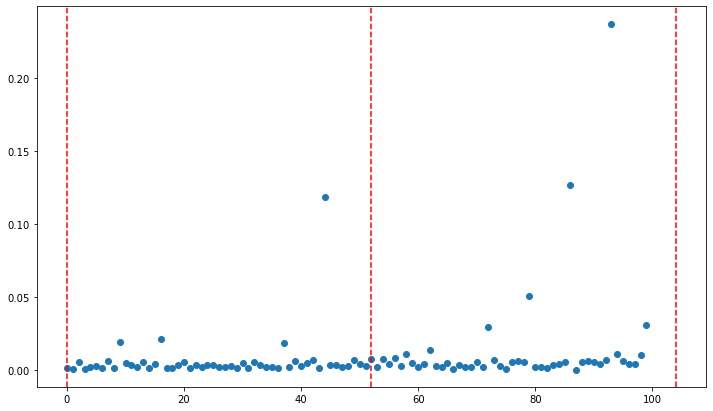

In [253]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(XGBR.feature_importances_.size),XGBR.feature_importances_)
for x in np.arange(3)*52:
  plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

Observamos la importancia de las instancias del look back y **vemos que se comporta diferente a la de Random Forest**, aunque tiene el mismo pico en 95.

In [254]:
y_pred = XGBR.predict(X)
y_train_pred2 = XGBR.predict(X_train2)
y_test_pred2 = XGBR.predict(X_test2)

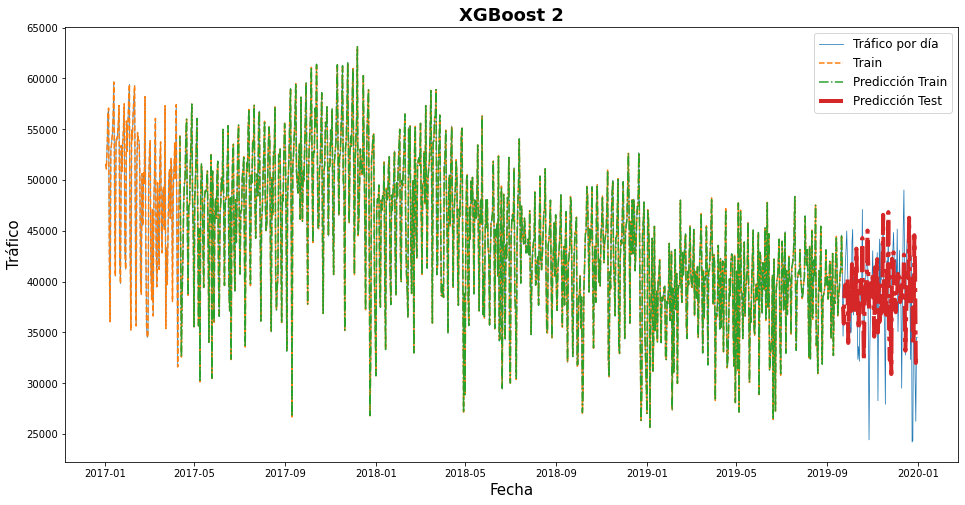

In [255]:
plt.figure(figsize=(16,8))
plt.plot(m2D_2.index, m2D_2['cantidad_pasos'] ,lw = 0.75, label = 'Tráfico por día')
plt.plot(m2D_2.index[:N_train + look_back], m2D_2[:N_train + look_back],'--', label = 'Train')
plt.plot(m2D_2.index[look_back: look_back + N_train], y_train_pred2,'-.',label = 'Predicción Train')
plt.plot(m2D_2.index[N_train+look_back: length_total], y_test_pred2,'-.', lw = 4, label = 'Predicción Test')
plt.legend(fontsize = 12, loc = 'upper right')
plt.title("XGBoost 2", fontsize = 18, fontweight="bold")
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Tráfico', fontsize = 15)
plt.show()

Observamos como este modelo mejoró la visualización de la gráfica.

In [256]:
train_rmse = np.sqrt(mean_squared_error(y_train2, y_train_pred2))
test_rmse = np.sqrt(mean_squared_error(y_test2, y_test_pred2))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 33.37883579275152
Raíz del error cuadrático medio en Test: 4435.454438381079


Observamos como **mejora el error en Test, pero hay más overfitting aún que antes.**

### **4. ARIMA**

In [257]:
m1D_3 = m1D.set_index('fecha')
m1D_3

cantidad_pasos
fecha                     
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0
2017-01-06         57081.0
...                    ...
2019-12-27         40182.0
2019-12-28         30681.0
2019-12-29         26259.0
2019-12-30         34523.0
2019-12-31         34523.0

[1094 rows x 1 columns]

Para utilizar el modelo ARIMA vamos a volver con el dataframe con la fecha en el index.

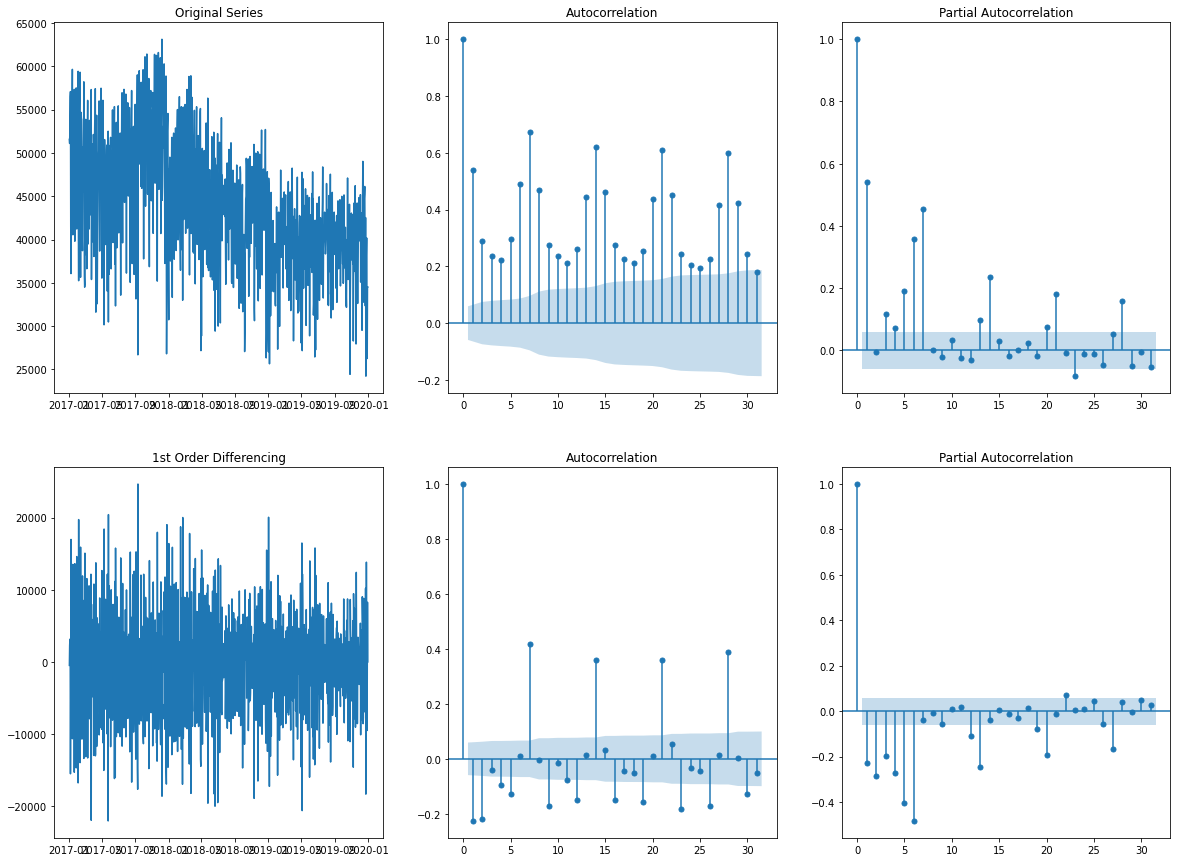

In [258]:
fig, axes = plt.subplots(2,3, figsize=(20, 15))

axes[0, 0].plot(m1D_3); axes[0, 0].set_title('Original Series')
plot_acf(m1D_3, ax=axes[0, 1])
plot_pacf(m1D_3, ax=axes[0, 2])

axes[1, 0].plot(m1D_3.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(m1D_3.diff().dropna(), ax=axes[1, 1])
plot_pacf(m1D_3.diff().dropna(), ax=axes[1, 2])

plt.show()

Observamos las estadísticas de la serire original y diferenciada en 1 y vemos como hay **mucha estacionalidad**, pero lo vamos a comprobar con un test de Dicky Fuller. 

In [259]:
print(ndiffs(m1D_3, test='adf'))

0


Observamos como el test de Dicky-Fuller **nos da 0, por lo que no deberíamos hacer una diferenciación.** 

In [260]:
train = m1D_3[m1D_3.index < '2019-10-01']
test = m1D_3[m1D_3.index >= '2019-10-01']

Vamos a usar auto-arima para establecer mejor los parámetros y **vamos a separar en train lo que vamos a usar para entrenar el modelo y en test lo que vamos a usar para testear el modelo.**

Vamos a probar diferentes modelos de autoArima para tratar de sacar el que mejor nos convenga. Para ello vamos a utilizar diferentes p,d,q y P,D,Q, con un m de 7.

p = El orden de un modelo auto-regrasivo (AR)

d = El grado de diferenciación.

q = El orden de un modelo de media-movil (MA)

P = El orden de componente estacional para un modelo auto-regresivo (AR)

D = El orden de integración para un proceso estacional.

Q = El orden de componente estacional para un modelo de media-movil (MA)

m = El número de observaciones por ciclo estacional. Se elige 7 al ser el componente por día.

In [261]:
arima_model = auto_arima(train, start_p = 0, d= 0, start_q = 0, max_p = 5, 
                         max_d = 5, max_q = 5, start_P = 0, D= 1, start_Q= 0,
                         max_P = 5, max_D=5, max_Q=5, m=7, seasonal=True, 
                         error_action = 'warn', trace = True, 
                         supress_warnings = True, stepwise = True, 
                         random_state= 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=20023.501, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=19884.774, Time=0.33 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=19755.385, Time=1.65 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=20021.642, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=20006.605, Time=0.09 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=19720.854, Time=1.87 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=19889.151, Time=0.24 sec
 ARIMA(0,0,1)(2,1,1)[7] intercept   : AIC=19754.644, Time=4.44 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=19760.226, Time=2.84 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=19758.971, Time=1.81 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=19840.224, Time=0.96 sec
 ARIMA(0,0,1)(2,1,2)[7] intercept   : AIC=inf, Time=9.85 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=19799.871, Time=1.54 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=19634.594, Time=2.66 sec
 ARIMA(1,0,1)(0,1,1)[7] i

**Utilizamos auto-arima** para ver los mejores parámetros para nuestro modelo que son:

p = 1

d = 0

q = 2

P = 0

D = 1

Q = 1

m = 7

In [262]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1002
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 7)   Log Likelihood               -9773.653
Date:                             Thu, 23 Sep 2021   AIC                          19557.307
Time:                                     22:12:02   BIC                          19581.820
Sample:                                          0   HQIC                         19566.626
                                            - 1002                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9890      0.004    223.905      0.000       0.980       0.998
ma.L1         -0.7206      0.025    -28.970      0.000      -0.769      -0.672
ma.L2         -0.0908      0.026     -3.549      0.000      -0.141      -0.041
ma.S.L7       -0.9314      0.012    -76.291      0.000      -0.955      -0.908
sigma2      1.973e+07   1.42e-10   1.39e+17      0.000    1.97e+07    1.97e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               826.49
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -1.27
Prob(H) (two-sided):                  0.95   Kurtosis:                         6.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.62e+32. Standard errors may be unstable.
"""

Observamos que la z para los diferentes parámetros y que son mayores a 1.96 en valores absolutos.

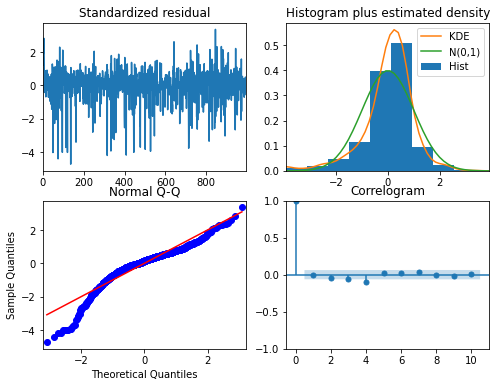

In [263]:
arima_model.plot_diagnostics(figsize=(8, 6))
plt.show()

Observamos el ruido blanco y vemos que tienen una distribución bastante normal, se salen un poco en los primeros Sample Quantiles.

In [264]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 92), index = test.index)
prediction2 = prediction.rename(columns = {0: 'predicted_trafic'}).reset_index()
prediction2

fecha  predicted_trafic
0  2019-10-01      39993.320116
1  2019-10-02      41243.475274
2  2019-10-03      41958.262298
3  2019-10-04      43751.774579
4  2019-10-05      39712.040783
..        ...               ...
87 2019-12-27      43708.682735
88 2019-12-28      39669.425022
89 2019-12-29      37578.164127
90 2019-12-30      38946.208791
91 2019-12-31      40152.073534

[92 rows x 2 columns]

Hacemos nuestra predicción y vemos como queda.

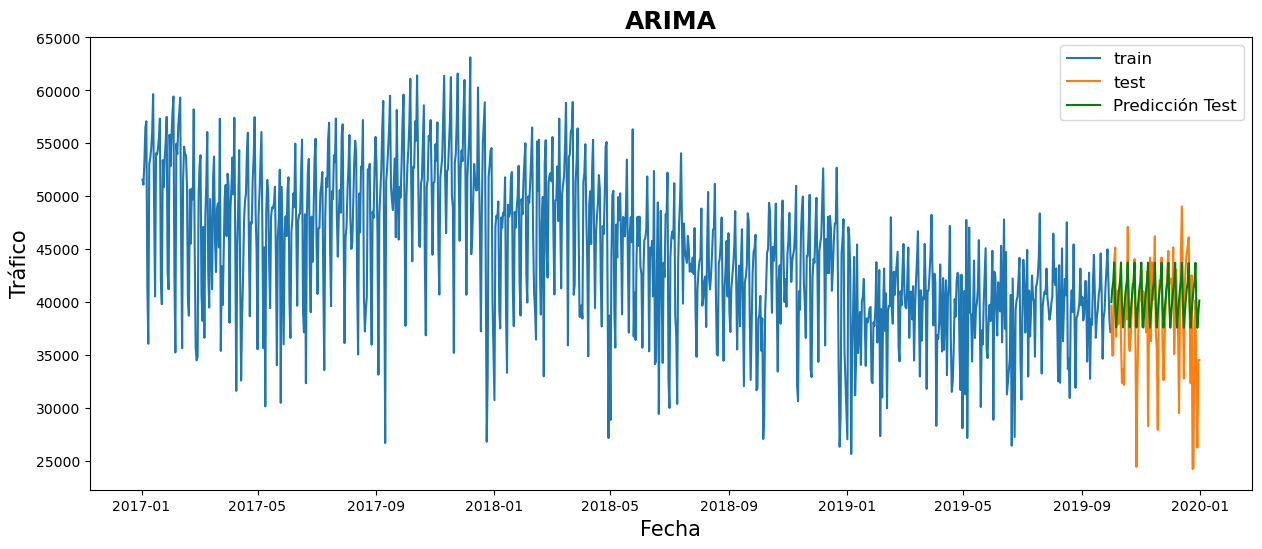

In [265]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(train , label='train')
plt.plot(test , label='test')
plt.plot(prediction, color = 'green',label='Predicción Test')
plt.title("ARIMA", fontsize = 18, fontweight="bold")
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Tráfico', fontsize = 15)
plt.legend(fontsize = 12, loc = 'upper right')
plt.show()

Observamos como queda el gráfico y vemos que la predicción se ajusta pero sin los picos altos y bajos.

In [266]:
test_rmse = np.sqrt(mean_squared_error(test['cantidad_pasos'], prediction2['predicted_trafic']))
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')  

Raíz del error cuadrático medio en Test: 5072.530117744103


Observamos que el error en Test es mayor a los anteriores modelos.

### **5. PROPHET**

Vamos a probar con la libería de Prophet

In [267]:
train2 = train.reset_index()
train2

fecha  cantidad_pasos
0    2017-01-02         51568.0
1    2017-01-03         51093.0
2    2017-01-04         53332.0
3    2017-01-05         56486.0
4    2017-01-06         57081.0
...         ...             ...
997  2019-09-26         43110.0
998  2019-09-27         44985.0
999  2019-09-28         41925.0
1000 2019-09-29         38348.0
1001 2019-09-30         37170.0

[1002 rows x 2 columns]

Volvemos a ver el dataset de train

In [268]:
train3 = train2.rename(columns = {'fecha':'ds', 'cantidad_pasos' : 'y'})
train3

ds        y
0    2017-01-02  51568.0
1    2017-01-03  51093.0
2    2017-01-04  53332.0
3    2017-01-05  56486.0
4    2017-01-06  57081.0
...         ...      ...
997  2019-09-26  43110.0
998  2019-09-27  44985.0
999  2019-09-28  41925.0
1000 2019-09-29  38348.0
1001 2019-09-30  37170.0

[1002 rows x 2 columns]

**Pasamos las columnas a 'ds' e 'y' para usarlas para el modelo de Prophet.**

In [269]:
m = Prophet(daily_seasonality = True)
m.fit(train3)

Establecemos el obejto de Prophet

In [270]:
future = m.make_future_dataframe(periods=92)
future.head()

ds
0 2017-01-02
1 2017-01-03
2 2017-01-04
3 2017-01-05
4 2017-01-06

**Vamos a predecir 92 días que son los del último trimestre.**

In [271]:
forecast = m.predict(future)
forecast1 = forecast.set_index(forecast.columns[0])
forecast2 = forecast1[['yhat', 'yhat_lower', 'yhat_upper']]
forecast2.tail()

yhat    yhat_lower    yhat_upper
ds                                                  
2019-12-27  43734.564162  38354.134770  49588.290877
2019-12-28  35550.237286  29776.131603  41153.652706
2019-12-29  30982.044009  25598.557189  36535.438838
2019-12-30  36717.648488  30861.795469  41961.752041
2019-12-31  37714.358703  31939.501529  43928.865901

**Predecimos y vemos los resultados, el yhat_upper es el límite superior y el yhat_lower el límite inferior.**

In [272]:
prediction = forecast2[forecast2.index >= '2019-10-01']

En la predicción vamos a tener los del último trimestre.

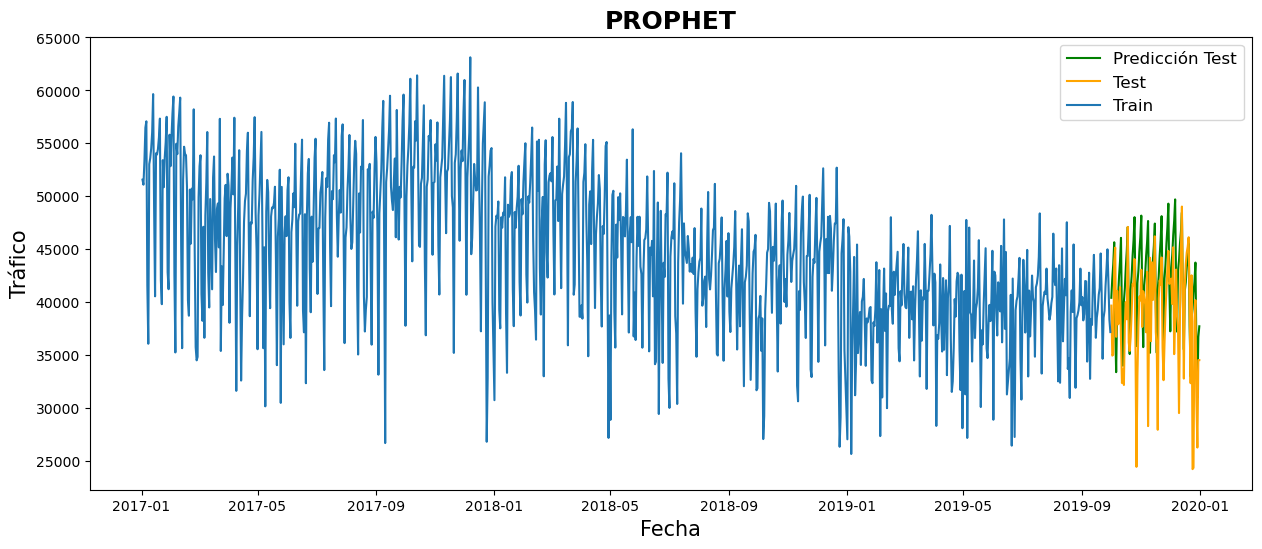

In [273]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(prediction['yhat'], color = 'green', label = 'Predicción Test')
plt.plot(m1D_3[m1D_3.index >= '2019-10-01'] , color = 'orange', label='Test')
plt.plot(m1D_3[m1D_3.index < '2019-10-01'] , label='Train')
plt.title("PROPHET", fontsize = 18, fontweight="bold")
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Tráfico', fontsize = 15)
plt.legend(fontsize = 12, loc = 'upper right')

Observamos como se ve la predicción en test del modelo de Prophet.

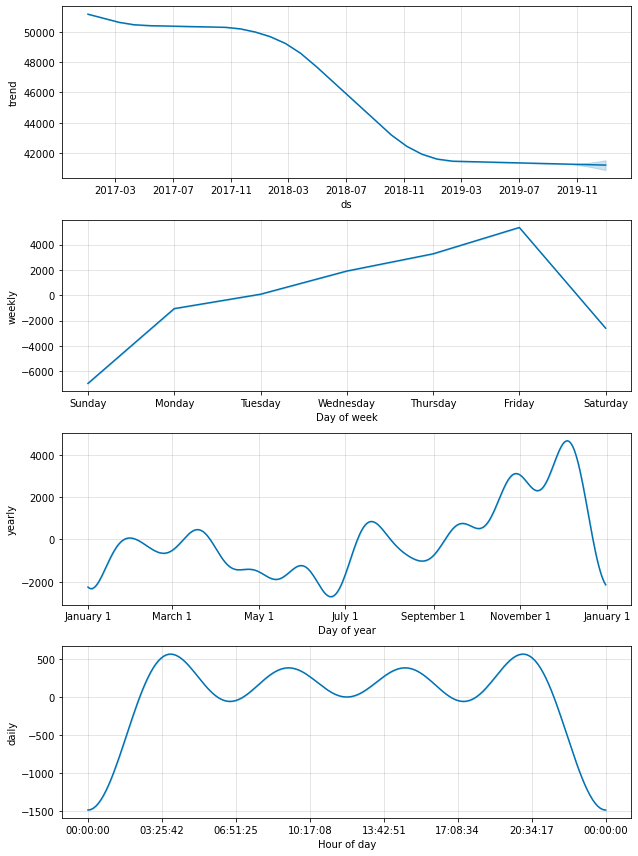

In [274]:
fig2 = m.plot_components(forecast)

Observamos los componentes del forecast y vemos el trend para abajo como las anteriores veces que vimos los componentes, también vemos como el tráfico va creciendo de lunes a viernes y luego baja. Por año vemos como tiene una bajada en Julio por las vacaciones de invierno y luego sube mucho hasta diciembre y vuelve a bajar por las vacaciones de verano. 

In [275]:
rmse = math.sqrt(mean_squared_error(test,forecast.yhat[(forecast['ds'] >= '2019/10/01') & (forecast['ds'] <= '2019/12/31')]))
print('RMSE: '+str(rmse))

RMSE: 5831.069811094682


Observamos un RMSE de test de 5831, bastante menor que los demás.

In [276]:
final = {"Modelo":["Benchmark", "Rolling Window", "Random Forest", "Random Forest", "XGBoost", "XGBoost", "ARIMA", "PROPHET"], 
           "Hiper-parámetros":["default", "7 días", "maxdepth = 5", "Look_back = 100, n_estimators=100", "maxdepth = 2", "Look_back = 100, n_estimators=100", "ARIMA(1,0,2)(0,1,1),7", "periods=92"], 
           "Variables X": ["tráfico", "tráfico", "tráfico", "893 días", "tráfico", "893 días", "tráfico", "tráfico"], "RMSE (test)":["~5316", "~4766", "~5322", "4495", "5255", "4435", "5072", "5831"], "Diferencia RMSE Test-Train":["~800", "~1200", "~60", "~2800", "~60", "~4000", "", ""]}
pd.DataFrame(final)

Modelo                   Hiper-parámetros Variables X RMSE (test)  \
0       Benchmark                            default     tráfico       ~5316   
1  Rolling Window                             7 días     tráfico       ~4766   
2   Random Forest                       maxdepth = 5     tráfico       ~5322   
3   Random Forest  Look_back = 100, n_estimators=100    893 días        4495   
4         XGBoost                       maxdepth = 2     tráfico        5255   
5         XGBoost  Look_back = 100, n_estimators=100    893 días        4435   
6           ARIMA              ARIMA(1,0,2)(0,1,1),7     tráfico        5072   
7         PROPHET                         periods=92     tráfico        5831   

  Diferencia RMSE Test-Train  
0                       ~800  
1                      ~1200  
2                        ~60  
3                      ~2800  
4                        ~60  
5                      ~4000  
6                             
7

### 6. CONCLUSIONES

Observamos como nuestros modelos predicen con un RMSE entre 4000 y 5000. Observamos que algunos hacen más overfitting que otros. El mejor modelo que consideramos es el Random Forest Regressor con los días como parámetros, ya que tine un buen RMSE, y, aunque tiene bastante overfitting, tiene menos que el XGBoost Regressor con los mismos parámetros.

## OPTIMIZACIÓN DE HIPERPARÁMETROS

Vamos a optimizar los hiperparámetros con RandomSearch y ver los resultados. Vamos a optimizar el modelo de RandomForest porque el RMSE de Test es casi igual comparado al XGBoost y tiene un poco menos de overfitting. Vamos a utilizar el modelo N2 que utiliza como variables cada fecha. Por una cuestión de capacidad computacional vamos a utilizat un Random Searh y no un Grid Search.

In [277]:
from sklearn.model_selection import RandomizedSearchCV

In [278]:
param_distributions = {
    "max_depth": np.arange(1,31,1),
    "min_samples_split": np.arange(6,21,2),
    "max_features": np.arange(2,13,1),
    "n_estimators": np.arange(100,1100,100)
}
scoring = 'neg_root_mean_squared_error'

In [279]:
rf = RandomForestRegressor()
random_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_jobs=-1, cv=4, scoring=scoring)

In [280]:
look_back = 100

N = m2D_2.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)

for i in range(X.shape[0]):
    X[i,:] = m2D_2['cantidad_pasos'].iloc[i:i+look_back]
    y[i] = m2D_2['cantidad_pasos'].iloc[i+look_back]

N_train = 1093 - 100 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 100 #cantidad de puntos que vamos a usar para evaluar

N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train2 = X[:N_train,:]
y_train2 = y[:N_train]

X_test2 = X[N_train:N_train+N_test,:]
y_test2 = y[N_train:N_train+N_test]

In [281]:
random_rf.fit(X_train2, y_train2)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
                                        'min_samples_split': array([ 6,  8, 10, 12, 14, 16, 18, 20]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   scoring='neg_root_mean_squared_error')

In [282]:
print(random_rf.best_params_)

{'n_estimators': 500, 'min_samples_split': 14, 'max_features': 9, 'max_depth': 24}


In [283]:
y_train_pred = random_rf.predict(X_train2)
y_test_pred = random_rf.predict(X_test2)

train_rmse = np.sqrt(mean_squared_error(y_train2, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test2, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 2524.0730320347966
Raíz del error cuadrático medio en Test: 4500.831710181289


In [284]:
final = {"Modelo":["Benchmark", "Rolling Window", "Random Forest", "Random Forest", "XGBoost", "XGBoost", "ARIMA", "PROPHET", "Random Forest"], 
           "Hiper-parámetros":["default", "7 días", "maxdepth = 5", "Look_back = 100, n_estimators=100", "maxdepth = 2", "Look_back = 100, n_estimators=100", "ARIMA(1,0,2)(0,1,1),7", "periods=92", "'n_estimators': 400, 'min_samples_split': 12, 'max_features': 7, 'max_depth': 20"], 
           "Variables X": ["tráfico", "tráfico", "tráfico", "893 días", "tráfico", "893 días", "tráfico", "tráfico", "tráfico"], "RMSE (test)":["~5316", "~4766", "~5322", "~4495", "~5255", "~4435", "~5072", "~5831", "~4545"], "Diferencia RMSE Test-Train":["~800", "~1200", "~60", "~2800", "~60", "~4000", "", "", "~1900"]}
pd.DataFrame(final)

Modelo                                   Hiper-parámetros  \
0       Benchmark                                            default   
1  Rolling Window                                             7 días   
2   Random Forest                                       maxdepth = 5   
3   Random Forest                  Look_back = 100, n_estimators=100   
4         XGBoost                                       maxdepth = 2   
5         XGBoost                  Look_back = 100, n_estimators=100   
6           ARIMA                              ARIMA(1,0,2)(0,1,1),7   
7         PROPHET                                         periods=92   
8   Random Forest  'n_estimators': 400, 'min_samples_split': 12, ...   

  Variables X RMSE (test) Diferencia RMSE Test-Train  
0     tráfico       ~5316                       ~800  
1     tráfico       ~4766                      ~1200  
2     tráfico       ~5322                        ~60  
3    893 días       ~4495                      ~2800  
4     tráfico       ~5255                        ~60  
5    893 días       ~4435                      ~4000  
6     tráfico       ~5072                             
7     tráfico       ~5831                             
8     tráfico       ~4545                      ~1900

Vemos que mejoró muy poco el RMSE de Test, pero tiene un poco menos de overfitting.

### **IMPORTANCIA DE VARIABLES**

Vamos a observar la importancia de los parámetros e hiperparámetros de nuestro modelo.

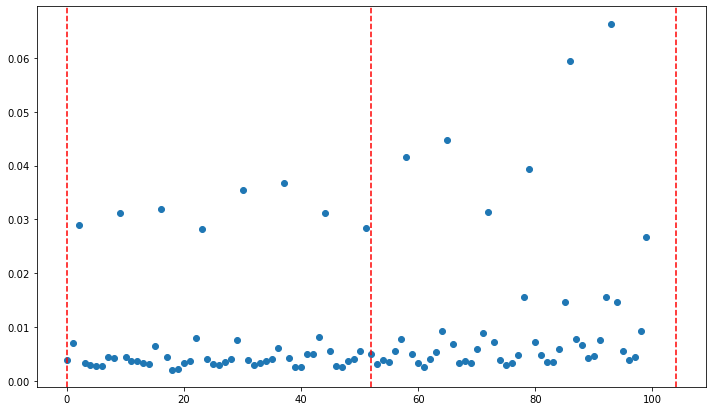

In [285]:
rf2 = RandomForestRegressor(min_samples_split = 12, max_depth = 20, n_estimators = 400, max_features = 7)
rf2.fit(X_train2, y_train2)

plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf2.feature_importances_.size),rf2.feature_importances_)
for x in np.arange(3)*52:
  plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

Observamos como cambia la importancia de las features comparado al anterior modelo del RandomForest. Ahora los días de cada semana, ejemplo: todos los miércoles, suben hasta el día 45 y luego baja y vuelve a subir. Sigue el punto alto en el día 94.

In [286]:
rf2 = RandomForestRegressor(min_samples_split = 2, max_depth = 20, n_estimators = 400, max_features = 7)
rf2.fit(X_train2, y_train2)

y_train_pred = rf2.predict(X_train2)
y_test_pred = rf2.predict(X_test2)

train_rmse = np.sqrt(mean_squared_error(y_train2, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test2, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 1627.0646660807997
Raíz del error cuadrático medio en Test: 4518.262188603455


Bajamos el min_samples_split a 2 y observamos que no varió mucho el RMSE de Test, pero si en Train.

In [287]:
rf2 = RandomForestRegressor(min_samples_split = 12, max_depth = 2, n_estimators = 400, max_features = 7)
rf2.fit(X_train2, y_train2)

y_train_pred = rf2.predict(X_train2)
y_test_pred = rf2.predict(X_test2)

train_rmse = np.sqrt(mean_squared_error(y_train2, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test2, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 4724.38606218464
Raíz del error cuadrático medio en Test: 5155.142815590038


Bajamos el max_depth a 2 y observamos como empeora bastante el RMSE de Test perdiendo 600 puntos y sube el error en Train también.

In [288]:
rf2 = RandomForestRegressor(min_samples_split = 12, max_depth = 20, n_estimators = 200, max_features = 7)
rf2.fit(X_train2, y_train2)

y_train_pred = rf2.predict(X_train2)
y_test_pred = rf2.predict(X_test2)

train_rmse = np.sqrt(mean_squared_error(y_train2, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test2, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 2439.3721746147044
Raíz del error cuadrático medio en Test: 4528.014296140497


Bajamos el n_estimators a la mitad y observamos que no cambia mucho el RMSE de Test.

In [289]:
rf2 = RandomForestRegressor(min_samples_split = 12, max_depth = 20, n_estimators = 400, max_features = 1)
rf2.fit(X_train2, y_train2)

y_train_pred = rf2.predict(X_train2)
y_test_pred = rf2.predict(X_test2)

train_rmse = np.sqrt(mean_squared_error(y_train2, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test2, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 3204.7613560883315
Raíz del error cuadrático medio en Test: 4775.433966675011


Ponemos el max_features en 1 y observamos que no cambia mucho el RMSE de test.

El hiperparámetro que más afecta al modelo es el de max_depth.

Error absoluto medio en Train: 1816.2580685408211
Error absoluto medio en Test: 3374.9302451663248
Raíz del error cuadrático medio en Train: 2444.6908715981995
Raíz del error cuadrático medio en Test: 4545.787885961577


C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


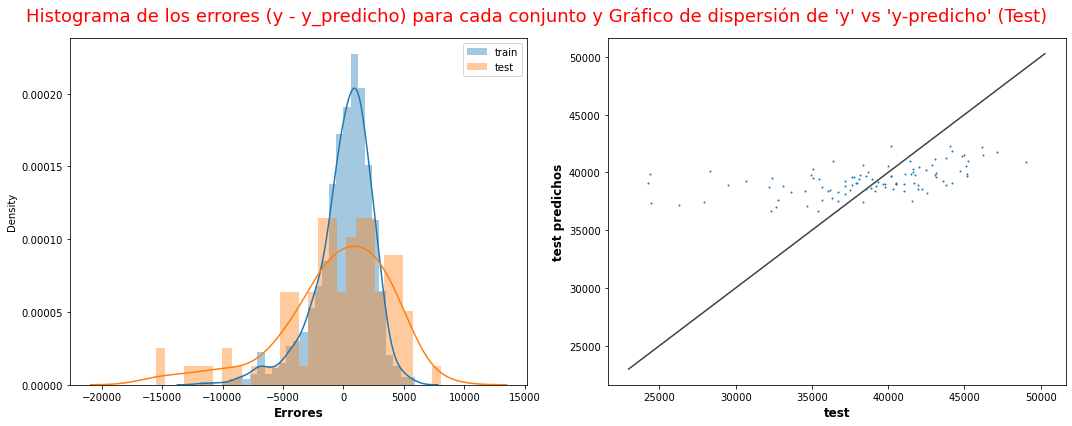

In [290]:
rf2 = RandomForestRegressor(min_samples_split = 12, max_depth = 20, n_estimators = 400, max_features = 7)
rf2.fit(X_train2, y_train2)

y_train_pred = rf2.predict(X_train2)
y_test_pred = rf2.predict(X_test2)

train_mae = mean_absolute_error(y_train2, y_train_pred)
test_mae = mean_absolute_error(y_test2, y_test_pred)
print(f'Error absoluto medio en Train: {train_mae}')
print(f'Error absoluto medio en Test: {test_mae}')

train_rmse = np.sqrt(mean_squared_error(y_train2, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test2, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')  

plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r")

plt.subplot(1,2,1)
sns.distplot(y_train2 - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test2 - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.legend()

ax = plt.subplot(1,2,2)
plt.scatter(y_test2, y_test_pred, s=1) 
plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('test')
plt.ylabel('test predichos')

plt.tight_layout()
plt.show()

En los errores observamos que les falta para tener una distribución normal y que los test predichos no tienen tanta varianza como la serie original, por lo que todos los test predichos se encuentran entre 35000 y 45000.

**¿Qué información está utilizando el modelo para predecir?**

El modelo está utilizando cada instancia de cada día como variables para predecir.

## CONCLUSIONES

- La variable con más relevancia para nuestro son los días exactamente iguales de la semana, por ejemplo miércoles contra miércoles. Vemos un resultado parecido al que tuvimos en la autocorrelación. El de máxima imporancia es el día exacto de la semana anterior. 
- El hiperparámetro más importante es el max_depth, el cuál cambiandolo varían mucho los resultados. 
- Los errores en Test nos dan todos cercanos a 40000, lo que muestra que no predice bien los picos altos y bajos.

## **PREDICCIÓN 2020**

**Vamos a utilizar este modelo para predecir el tráfico de 2020 por Illía y pago en Efectivo para ver como se visualiza**

In [291]:
AñosIE_2 = AñosIE.copy()
print(AñosIE_2.shape)
AñosIE_2.head()

(316260, 8)


periodo tipo_vehiculo estacion    sentido  cantidad_pasos  \
41      2021       Liviano    Illia     Centro              82   
42      2021       Liviano    Illia  Provincia              95   
117     2021       Liviano    Illia     Centro              81   
118     2021       Liviano    Illia  Provincia              93   
188     2021       Liviano    Illia     Centro              81   

                  fecha     dia forma_pago  
41  2021-04-01 00:00:00  Jueves   EFECTIVO  
42  2021-04-01 00:00:00  Jueves   EFECTIVO  
117 2021-04-01 01:00:00  Jueves   EFECTIVO  
118 2021-04-01 01:00:00  Jueves   EFECTIVO  
188 2021-04-01 02:00:00  Jueves   EFECTIVO

Nos traemos el dataset donde están todos los años.

In [292]:
AñosIE2 = AñosIE_2[(AñosIE_2.fecha >= '2020-01-01') & (AñosIE_2.fecha < '2021-01-01')].reset_index(drop = True)
print(AñosIE2.shape)
AñosIE2.head()

(52356, 8)


periodo tipo_vehiculo estacion    sentido  cantidad_pasos  \
0     2020       Liviano    Illia     Centro             326   
1     2020       Liviano    Illia  Provincia             319   
2     2020       Liviano    Illia     Centro             199   
3     2020       Liviano    Illia  Provincia             180   
4     2020       Liviano    Illia     Centro             114   

                fecha        dia forma_pago  
0 2020-01-01 01:00:00  Miércoles   EFECTIVO  
1 2020-01-01 01:00:00  Miércoles   EFECTIVO  
2 2020-01-01 02:00:00  Miércoles   EFECTIVO  
3 2020-01-01 02:00:00  Miércoles   EFECTIVO  
4 2020-01-01 03:00:00  Miércoles   EFECTIVO

Lo separamos para quedarnos solo con las del 2020.

In [293]:
Dproy_2 = AñosIE2.copy()
Dproy_3 = AñosIE2.resample('D', on = 'fecha').sum()
Dproy_4 = Dproy_3.drop('periodo', axis = 1).reset_index()
Dproy_5 = Dproy_4.set_index(Dproy_4.columns[0])
Dproy_5

cantidad_pasos
fecha                     
2020-01-01           21395
2020-01-02           33722
2020-01-03           37067
2020-01-04           30627
2020-01-05           27812
...                    ...
2020-12-27            8434
2020-12-28           10311
2020-12-29           12036
2020-12-30           12527
2020-12-31            6553

[366 rows x 1 columns]

Hacemos un resample con el dataset de solo 2020.

In [294]:
Dproy_9

cantidad_pasos
fecha                     
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0
2017-01-06         57081.0
...                    ...
2019-12-27         40182.0
2019-12-28         30681.0
2019-12-29         26259.0
2019-12-30         34523.0
2019-12-31         34523.0

[1094 rows x 1 columns]

Vemos el dataset por día hasta el 31-12-2019

In [295]:
Dproy_10 = Dproy_9.append(Dproy_5)
Dproy_10

cantidad_pasos
fecha                     
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0
2017-01-06         57081.0
...                    ...
2020-12-27          8434.0
2020-12-28         10311.0
2020-12-29         12036.0
2020-12-30         12527.0
2020-12-31          6553.0

[1460 rows x 1 columns]

Unimos ambos datasets por día.

In [296]:
print(Dproy_10.shape)
Dproy_10.head()

(1460, 1)


cantidad_pasos
fecha                     
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0
2017-01-06         57081.0

In [297]:
look_back = 100

N = Dproy_10.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1359, 100) (1359,)


Hcemos un look-back hasta 100 instancias.

In [298]:
for i in range(X.shape[0]):
    X[i,:] =Dproy_10['cantidad_pasos'].iloc[i:i+look_back]
    y[i] = Dproy_10['cantidad_pasos'].iloc[i+look_back]

In [299]:
N_train = 1459 - 365 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 365 #cantidad de puntos que vamos a usar para evaluar

N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train3 = X[:N_train,:]
y_train3 = y[:N_train]
print(X_train3.shape, y_train3.shape)

X_test3 = X[N_train:N_train+N_test,:]
y_test3 = y[N_train:N_train+N_test]
print(X_test3.shape, y_test3.shape)

(994, 100) (994,)
(365, 100) (365,)


La cantidad que tenemos que evaluar son 365 que son las del año 2020.

In [300]:
rf = RandomForestRegressor(min_samples_split = 12, max_depth = 20, n_estimators = 400, max_features = 7).fit(X_train3,y_train3)

In [301]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train3)
y_test_pred = rf.predict(X_test3)

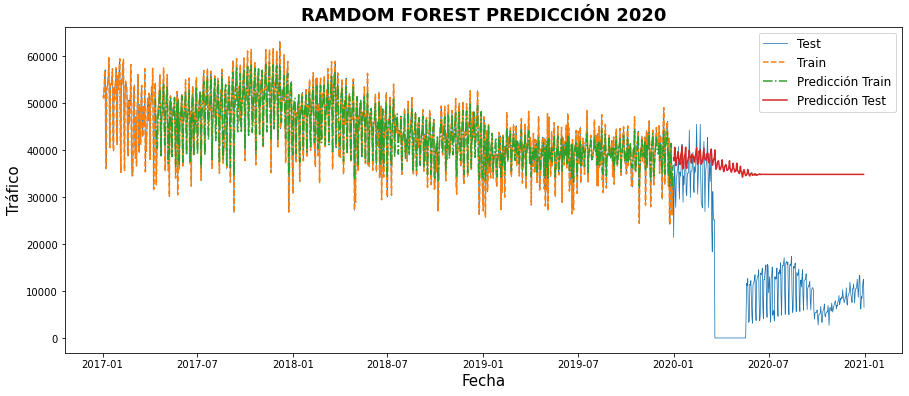

In [302]:
plt.figure(figsize=(15,6))
plt.plot(Dproy_10.index, Dproy_10['cantidad_pasos'] ,lw = 0.75, label = 'Test')
plt.plot(Dproy_10.index[:N_train + look_back], Dproy_10[:N_train + look_back],'--', label = 'Train')
plt.plot(Dproy_10.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicción Train')
plt.plot(Dproy_10.index[N_train+look_back: length_total], y_test_pred, label = 'Predicción Test')
plt.title("RAMDOM FOREST PREDICCIÓN 2020", fontsize = 18, fontweight="bold")
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Tráfico', fontsize = 15)
plt.legend(fontsize = 12, loc = 'upper right')
plt.show()

Vemos **como predice nuestro modelo las instancias del 2020 y vemos que no es muy bueno. Va disminuyendo hasta quedar en constante.** Por otro lado el tráfico del 2020 se vio muy afectado por la pandemia como vimos antes.

In [303]:
train_rmse = np.sqrt(mean_squared_error(y_train3, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test3, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 2446.7819991323454
Raíz del error cuadrático medio en Test: 25049.444398791875


Observamos que incrementó mucho el error en Test por la gran diferencia por la pandemia.

Vamos a utilizar otro modelo de **PROPHET** para predecir y visualizar el resultado.

In [304]:
train4 = Dproy_10[Dproy_10.index < '2020-01-01']
train5 = train4.reset_index()
test4 = Dproy_10[(Dproy_10.index >= '2020-01-02') & (Dproy_10.index < '2021-01-01') ]

In [305]:
train6 = train5.rename(columns = {'fecha':'ds', 'cantidad_pasos' : 'y'})
train6

ds        y
0    2017-01-02  51568.0
1    2017-01-03  51093.0
2    2017-01-04  53332.0
3    2017-01-05  56486.0
4    2017-01-06  57081.0
...         ...      ...
1089 2019-12-27  40182.0
1090 2019-12-28  30681.0
1091 2019-12-29  26259.0
1092 2019-12-30  34523.0
1093 2019-12-31  34523.0

[1094 rows x 2 columns]

Organizamos el dataset para usar PROPHET.

In [306]:
m = Prophet(daily_seasonality = True)
m.fit(train6)

In [307]:
future = m.make_future_dataframe(periods=365)
future.head()

ds
0 2017-01-02
1 2017-01-03
2 2017-01-04
3 2017-01-05
4 2017-01-06

In [308]:
forecast = m.predict(future)
forecast1 = forecast.set_index(forecast.columns[0])
forecast2 = forecast1[['yhat', 'yhat_lower', 'yhat_upper']]
forecast2.tail()

yhat    yhat_lower    yhat_upper
ds                                                  
2020-12-26  29892.552932  23821.619946  35508.177821
2020-12-27  25398.936084  19216.173703  31803.415748
2020-12-28  30761.559349  24577.858434  36387.090059
2020-12-29  31638.203729  25368.858849  37601.548775
2020-12-30  33261.604964  27043.162130  39536.993102

Observamos la predicción con el yhat, el yhat inferior y el yhat superior.

In [309]:
prediction = forecast2[forecast2.index >= '2020-01-01']

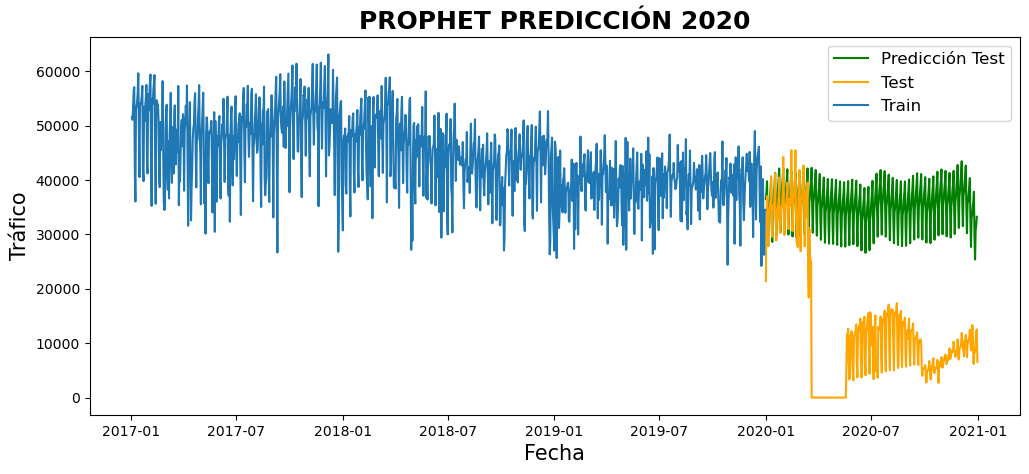

In [310]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(prediction['yhat'], color = 'green', label = 'Predicción Test')
plt.plot(Dproy_10[Dproy_10.index >= '2020-01-01'] , color = 'orange', label='Test')
plt.plot(Dproy_10[Dproy_10.index < '2020-01-01'] , label='Train')
plt.title("PROPHET PREDICCIÓN 2020", fontsize = 18, fontweight="bold")
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Tráfico', fontsize = 15)
plt.legend(fontsize = 12, loc = 'upper right')

Observamos como queda nuestro modelo y vemos que **parece más realista al anterior modelo.**

In [311]:
rmse = math.sqrt(mean_squared_error(test4,forecast.yhat[(forecast['ds'] >= '2020/01/01') & (forecast['ds'] < '2021/01/01')]))
print('RMSE: '+str(rmse))

RMSE: 25483.910006898855


Observamos el RMSE de test que es un poco peor que nuestro anterior modelo, pero parece más realista el modelo.

In [312]:
arima_model = auto_arima(train4, start_p = 0, d= 0, start_q = 0, max_p = 5, 
                         max_d = 5, max_q = 5, start_P = 0, D= 1, start_Q= 0,
                         max_P = 5, max_D=5, max_Q=5, m=7, seasonal=True, 
                         error_action = 'warn', trace = True, 
                         supress_warnings = True, stepwise = True, 
                         random_state= 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=21911.469, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=21737.571, Time=0.34 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=21621.559, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=21909.882, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=21884.680, Time=0.09 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=21533.786, Time=2.06 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=21742.825, Time=0.31 sec
 ARIMA(0,0,1)(2,1,1)[7] intercept   : AIC=21587.229, Time=5.42 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=21584.794, Time=6.70 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=21595.502, Time=2.23 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=21688.975, Time=1.10 sec
 ARIMA(0,0,1)(2,1,2)[7] intercept   : AIC=inf, Time=9.83 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=21641.403, Time=1.91 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=2.57 sec
 ARIMA(0,0,2)(1,1,1)[7] interce

In [313]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1094
Model:             SARIMAX(1, 0, 3)x(1, 1, [1], 7)   Log Likelihood              -10744.612
Date:                             Thu, 23 Sep 2021   AIC                          21505.223
Time:                                     22:15:55   BIC                          21545.153
Sample:                                          0   HQIC                         21520.338
                                            - 1094                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.9053      9.585      0.825      0.410     -10.881      26.692
ar.L1          0.8991      0.037     24.153      0.000       0.826       0.972
ma.L1         -0.6501      0.055    -11.859      0.000      -0.758      -0.543
ma.L2         -0.1212      0.051     -2.384      0.017      -0.221      -0.022
ma.L3          0.0555      0.046      1.214      0.225      -0.034       0.145
ar.S.L7        0.0416      0.048      0.873      0.383      -0.052       0.135
ma.S.L7       -0.8500      0.031    -27.101      0.000      -0.912      -0.789
sigma2      3.114e+07   4.25e-05   7.33e+11      0.000    3.11e+07    3.11e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.35   Jarque-Bera (JB):               681.92
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -1.16
Prob(H) (two-sided):                  0.30   Kurtosis:                         6.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.21e+26. Standard errors may be unstable.
"""

In [314]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1094
Model:             SARIMAX(1, 0, 3)x(1, 1, [1], 7)   Log Likelihood              -10744.612
Date:                             Thu, 23 Sep 2021   AIC                          21505.223
Time:                                     22:15:55   BIC                          21545.153
Sample:                                          0   HQIC                         21520.338
                                            - 1094                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.9053      9.585      0.825      0.410     -10.881      26.692
ar.L1          0.8991      0.037     24.153      0.000       0.826       0.972
ma.L1         -0.6501      0.055    -11.859      0.000      -0.758      -0.543
ma.L2         -0.1212      0.051     -2.384      0.017      -0.221      -0.022
ma.L3          0.0555      0.046      1.214      0.225      -0.034       0.145
ar.S.L7        0.0416      0.048      0.873      0.383      -0.052       0.135
ma.S.L7       -0.8500      0.031    -27.101      0.000      -0.912      -0.789
sigma2      3.114e+07   4.25e-05   7.33e+11      0.000    3.11e+07    3.11e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.35   Jarque-Bera (JB):               681.92
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -1.16
Prob(H) (two-sided):                  0.30   Kurtosis:                         6.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.21e+26. Standard errors may be unstable.
"""

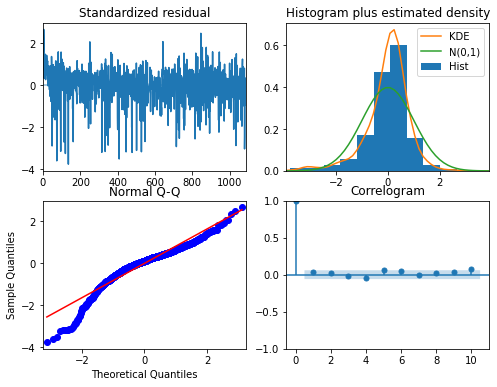

In [315]:
arima_model.plot_diagnostics(figsize=(8, 6))
plt.show()

In [316]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 365), index = test4.index)
prediction2 = prediction.rename(columns = {0: 'predicted_trafic'}).reset_index()
prediction2

fecha  predicted_trafic
0   2020-01-02      34981.802680
1   2020-01-03      38278.538181
2   2020-01-04      40440.177262
3   2020-01-05      35495.161992
4   2020-01-06      32297.349154
..         ...               ...
360 2020-12-27      41795.729380
361 2020-12-28      38456.659909
362 2020-12-29      41769.745513
363 2020-12-30      40540.340097
364 2020-12-31      42258.608897

[365 rows x 2 columns]

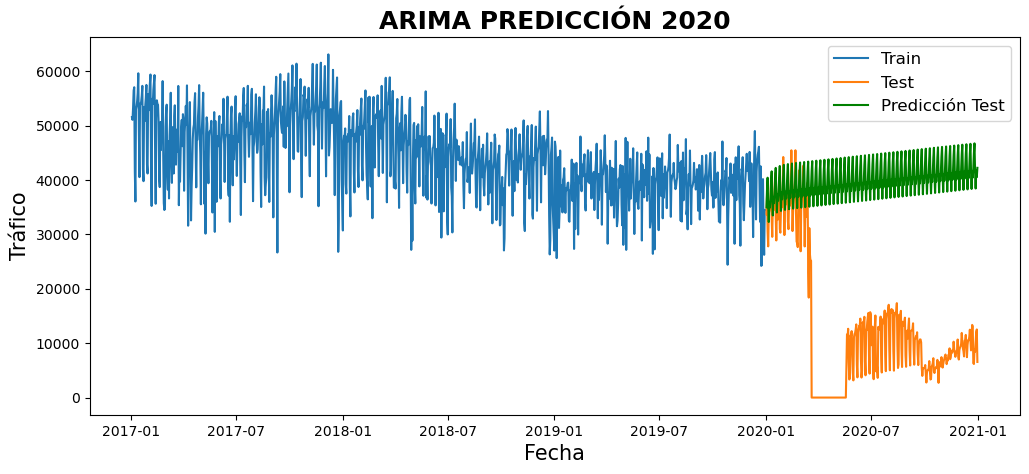

In [317]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train4 , label='Train')
plt.plot(test4 , label='Test')
plt.plot(prediction, color = 'green',label='Predicción Test')
plt.legend(loc='upper left', fontsize=8)
plt.title("ARIMA PREDICCIÓN 2020", fontsize = 18, fontweight="bold")
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Tráfico', fontsize = 15)
plt.legend(fontsize = 12, loc = 'upper right')

In [318]:
test_rmse = np.sqrt(mean_squared_error(test4['cantidad_pasos'], prediction2['predicted_trafic']))
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')  

Raíz del error cuadrático medio en Test: 29989.542243491614


In [319]:
final = {"Modelo":["Random Forest", "PROPHET", "ARIMA"], 
           "Hiper-parámetros":["min_samples_split = 12, max_depth = 20, n_estimators = 400, max_features = 7", "periods=365", "ARIMA(1,0,3)(1,1,1),7"], 
           "Variables X": ["729 días", "tráfico", "tráfico"], "RMSE (test)":["~25126", "~25483", "~29989"], "Diferencia RMSE Test-Train":["~2449", "", ""]}
pd.DataFrame(final)

Modelo                                   Hiper-parámetros  \
0  Random Forest  min_samples_split = 12, max_depth = 20, n_esti...   
1        PROPHET                                        periods=365   
2          ARIMA                              ARIMA(1,0,3)(1,1,1),7   

  Variables X RMSE (test) Diferencia RMSE Test-Train  
0    729 días      ~25126                      ~2449  
1     tráfico      ~25483                             
2     tráfico      ~29989

Observamos que el error en test es muy parecido en el modelo de PROPHET y el de Random Forest. Nos parece más realista el de PROPHET para la predicción. Da un eror mucho más grande por la anomalía de la pandemia.

## **EXTRAS**

**Vamos a probar usar datasets del 2015 - 2016 para ver si mejoran nuestras perdicciones.**

In [320]:
data_2016 = pd.read_csv('targetdir/flujo-vehicular-2016.csv', sep =',')
data_2015 = pd.read_csv('targetdir/flujo-vehicular-2015.csv', sep =',')

In [321]:
print(data_2016.info())
print(data_2016.isnull().sum())
data_2016

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1379443 non-null  int64 
 1   fecha           1379443 non-null  object
 2   hora_inicio     1379443 non-null  int64 
 3   hora_fin        1379443 non-null  int64 
 4   dia             1379443 non-null  object
 5   estacion        1379443 non-null  object
 6   sentido         1379443 non-null  object
 7   tipo_vehiculo   1379443 non-null  object
 8   forma_pago      1379443 non-null  object
 9   cantidad_pasos  1379443 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.2+ MB
None
periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64


periodo       fecha  hora_inicio  hora_fin      dia   estacion  \
0           2016  2016-01-01            0         1  Viernes    Alberdi   
1           2016  2016-01-01            0         1  Viernes    Alberdi   
2           2016  2016-01-01            1         2  Viernes    Alberdi   
3           2016  2016-01-01            1         2  Viernes    Alberdi   
4           2016  2016-01-01            1         2  Viernes    Alberdi   
...          ...         ...          ...       ...      ...        ...   
1379438     2016  2016-12-31           21        22   Sábado  Sarmiento   
1379439     2016  2016-12-31           22        23   Sábado  Sarmiento   
1379440     2016  2016-12-31           22        23   Sábado  Sarmiento   
1379441     2016  2016-12-31           23         0   Sábado  Sarmiento   
1379442     2016  2016-12-31           23         0   Sábado  Sarmiento   

           sentido tipo_vehiculo  forma_pago  cantidad_pasos  
0           Centro       Liviano  NO COBRADO              32  
1           Centro       Liviano      AUPASS               9  
2           Centro       Liviano  NO COBRADO               1  
3           Centro       Liviano    EFECTIVO               4  
4           Centro       Liviano      EXENTO               3  
...            ...           ...         ...             ...  
1379438  Provincia       Liviano      AUPASS              77  
1379439  Provincia       Liviano  NO COBRADO               2  
1379440  Provincia       Liviano      AUPASS               6  
1379441  Provincia       Liviano  NO COBRADO               1  
1379442  Provincia       Liviano      AUPASS               3  

[1379443 rows x 10 columns]

Observamos que no hay valores  nulos y que el dataset se parece mucho a los antriores vistos.

In [322]:
print(data_2015.info())
print(data_2015.isnull().sum())
data_2015

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017958 entries, 0 to 1017957
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1017958 non-null  int64 
 1   fecha           1017958 non-null  object
 2   hora            1017958 non-null  int64 
 3   dia             1017958 non-null  object
 4   estacion        1017958 non-null  object
 5   tipo_vehiculo   1017958 non-null  object
 6   forma_pago      1017958 non-null  object
 7   cantidad_pasos  1017958 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 62.1+ MB
None
periodo           0
fecha             0
hora              0
dia               0
estacion          0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64


periodo       fecha  hora     dia   estacion tipo_vehiculo  \
0           2015  2015-01-01     0  Jueves    Alberdi       Liviano   
1           2015  2015-01-01     0  Jueves    Alberdi       Liviano   
2           2015  2015-01-01     0  Jueves    Alberdi       Liviano   
3           2015  2015-01-01     0  Jueves    Alberdi       Liviano   
4           2015  2015-01-01     0  Jueves    Alberdi       Liviano   
...          ...         ...   ...     ...        ...           ...   
1017953     2015  2015-12-31    21  Jueves  Sarmiento       Liviano   
1017954     2015  2015-12-31    21  Jueves  Sarmiento       Liviano   
1017955     2015  2015-12-31    22  Jueves  Sarmiento       Liviano   
1017956     2015  2015-12-31    22  Jueves  Sarmiento       Liviano   
1017957     2015  2015-12-31    23  Jueves  Sarmiento       Liviano   

         forma_pago  cantidad_pasos  
0        NO COBRADO              15  
1          EFECTIVO               1  
2            EXENTO               1  
3          EFECTIVO              68  
4            AUPASS              18  
...             ...             ...  
1017953      AUPASS               1  
1017954      AUPASS             121  
1017955  NO COBRADO               5  
1017956      AUPASS              19  
1017957      AUPASS               4  

[1017958 rows x 8 columns]

Observamos que no hay valores  nulos y que el dataset se parece mucho a los antriores vistos.

In [323]:
data16_1 = data_2016.copy()

data16_1['fecha2'] = pd.to_datetime(data16_1.fecha) + pd.to_timedelta(data16_1.hora_fin, unit = 'h')

data16_1.drop(columns=['fecha', 'hora_inicio','hora_fin'], inplace = True)

data16_1.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data16_1.head()

periodo      dia estacion sentido tipo_vehiculo  forma_pago  \
0     2016  Viernes  Alberdi  Centro       Liviano  NO COBRADO   
1     2016  Viernes  Alberdi  Centro       Liviano      AUPASS   
2     2016  Viernes  Alberdi  Centro       Liviano  NO COBRADO   
3     2016  Viernes  Alberdi  Centro       Liviano    EFECTIVO   
4     2016  Viernes  Alberdi  Centro       Liviano      EXENTO   

   cantidad_pasos               fecha  
0              32 2016-01-01 01:00:00  
1               9 2016-01-01 01:00:00  
2               1 2016-01-01 02:00:00  
3               4 2016-01-01 02:00:00  
4               3 2016-01-01 02:00:00

Pasamos la fecha a datetyme y le sumamos la hora y dropeamos la columna de hora_inicio y hora_fin al dataset del 2016.

In [324]:
data15_1 = data_2015.copy()

data15_1['fecha2'] = pd.to_datetime(data15_1.fecha) + pd.to_timedelta(data15_1.hora, unit = 'h')

data15_1.drop(columns=['fecha', 'hora'], inplace = True)

data15_1.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data15_1.head()

periodo     dia estacion tipo_vehiculo  forma_pago  cantidad_pasos  \
0     2015  Jueves  Alberdi       Liviano  NO COBRADO              15   
1     2015  Jueves  Alberdi       Liviano    EFECTIVO               1   
2     2015  Jueves  Alberdi       Liviano      EXENTO               1   
3     2015  Jueves  Alberdi       Liviano    EFECTIVO              68   
4     2015  Jueves  Alberdi       Liviano      AUPASS              18   

       fecha  
0 2015-01-01  
1 2015-01-01  
2 2015-01-01  
3 2015-01-01  
4 2015-01-01

Pasamos la fecha a datetyme y le sumamos la hora y dropeamos la columna de hora_inicio y hora_fin al dataset del 2015.

In [325]:
mask1 = np.logical_and(data16_1.estacion=='Illia', data16_1.forma_pago == 'EFECTIVO')
mask2 = np.logical_and(data15_1.estacion=='Illia', data15_1.forma_pago == 'EFECTIVO')
data16IE= data16_1[mask1]
data15IE = data15_1[mask2]

Filtramos los datasets del 2015 y 2016 para que quede con Illía y Efectivo.

In [326]:
dia2016 = data16IE.resample('D', on = 'fecha').sum()
dia2016_1 = dia2016.drop(['periodo'], axis = 1).reset_index()
dia2016_2 = dia2016_1.set_index('fecha')
print(dia2016_2.shape)
dia2016_2.head()

(366, 1)


cantidad_pasos
fecha                     
2016-01-01           25602
2016-01-02           36136
2016-01-03           37225
2016-01-04           50312
2016-01-05           49907

Hacemos un resampleo por día del 2016.

In [327]:
dia15IE = data15IE.resample('D', on = 'fecha').sum()
dia2015_1 = dia15IE.drop(['periodo'], axis = 1).reset_index()
dia2015_2 = dia2015_1.set_index('fecha')
print(dia2015_2.shape)
dia2015_2.head()

(365, 1)


cantidad_pasos
fecha                     
2015-01-01           25697
2015-01-02           38112
2015-01-03           27601
2015-01-04           33803
2015-01-05           48683

Hacemos un resampleo del 2015 por día.

In [328]:
dia15_16 = dia2015_2.append(dia2016_2)
dia15_16

cantidad_pasos
fecha                     
2015-01-01           25697
2015-01-02           38112
2015-01-03           27601
2015-01-04           33803
2015-01-05           48683
...                    ...
2016-12-27           59662
2016-12-28           60291
2016-12-29           61551
2016-12-30           58601
2016-12-31           31527

[731 rows x 1 columns]

Unimos los datasets del 2015 y 2016.

In [329]:
dias15_19 = dia15_16.append(Dproy_9)
dias15_19

cantidad_pasos
fecha                     
2015-01-01         25697.0
2015-01-02         38112.0
2015-01-03         27601.0
2015-01-04         33803.0
2015-01-05         48683.0
...                    ...
2019-12-27         40182.0
2019-12-28         30681.0
2019-12-29         26259.0
2019-12-30         34523.0
2019-12-31         34523.0

[1825 rows x 1 columns]

A los datsets del 2015 y 2016 le unimos los otros años hasta el 2019.

In [330]:
look_back = 100

N = dias15_19.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)


(1724, 100) (1724,)


Empezamos a implementar nuestro modelo de Random Forest con un look back de 100 días.

In [331]:
for i in range(X.shape[0]):
    X[i,:] = dias15_19['cantidad_pasos'].iloc[i:i+look_back]
    y[i] = dias15_19['cantidad_pasos'].iloc[i+look_back]

In [332]:
N_train = 1824 - 100 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 100 #cantidad de puntos que vamos a usar para evaluar

In [333]:
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train4 = X[:N_train,:]
y_train4 = y[:N_train]
print(X_train4.shape, y_train4.shape)

X_test4 = X[N_train:N_train+N_test,:]
y_test4 = y[N_train:N_train+N_test]
print(X_test4.shape, y_test4.shape)

(1624, 100) (1624,)
(100, 100) (100,)


In [334]:
rf = RandomForestRegressor(min_samples_split = 12, max_depth = 20, n_estimators = 400, max_features = 7).fit(X_train3,y_train3)

In [335]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train4)
y_test_pred = rf.predict(X_test4)

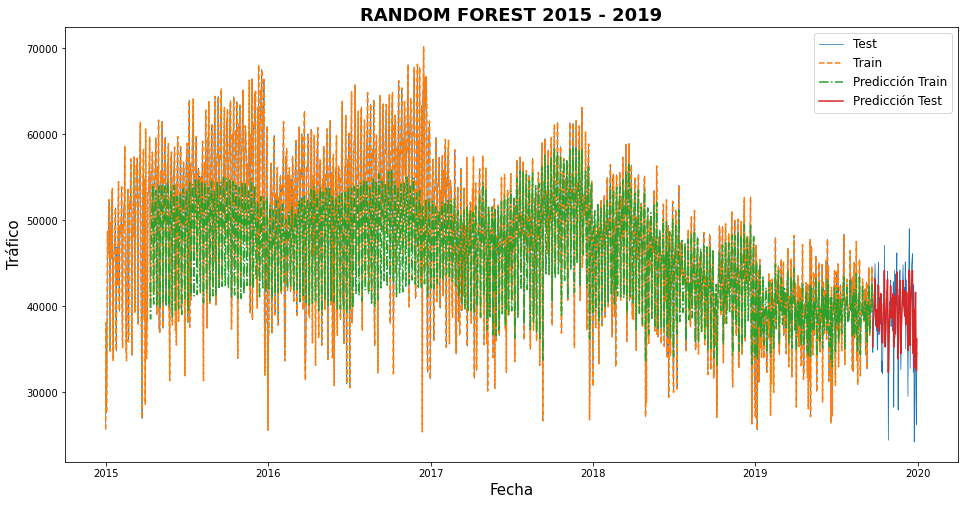

In [336]:
plt.figure(figsize=(16,8))
plt.plot(dias15_19.index, dias15_19['cantidad_pasos'] ,lw = 0.75, label = 'Test')
plt.plot(dias15_19.index[:N_train + look_back], dias15_19[:N_train + look_back],'--', label = 'Train')
plt.plot(dias15_19.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicción Train')
plt.plot(dias15_19.index[N_train+look_back: length_total], y_test_pred, label = 'Predicción Test')
plt.title("RANDOM FOREST 2015 - 2019", fontsize = 18, fontweight="bold")
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Tráfico', fontsize = 15)
plt.legend(fontsize = 12, loc = 'upper right')
plt.show()

Observamos la predicción para el último trimestre del 2019.

In [337]:
train_rmse = np.sqrt(mean_squared_error(y_train4, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test4, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 5272.661059319252
Raíz del error cuadrático medio en Test: 2585.236124345144


Vemos que mejoró mucho el error en Test a 2602.

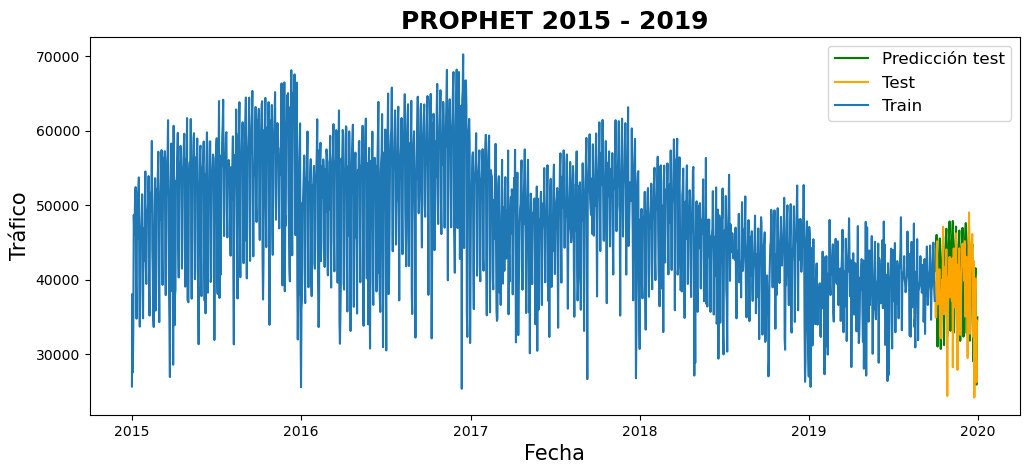

In [338]:
train15 = dias15_19[dias15_19.index < '2019-10-01']
train16 = train15.reset_index()
test15 = dias15_19[(dias15_19.index >= '2019-10-01') & (dias15_19.index < '2020-01-01') ]

train17 = train16.rename(columns = {'fecha':'ds', 'cantidad_pasos' : 'y'})

m = Prophet(daily_seasonality = True)
m.fit(train17)

future = m.make_future_dataframe(periods=92)

forecast = m.predict(future)
forecast1 = forecast.set_index(forecast.columns[0])
forecast2 = forecast1[['yhat', 'yhat_lower', 'yhat_upper']]

prediction = forecast2[forecast2.index >= '2019-10-01']

plt.figure(figsize=(12,5), dpi=100)
plt.plot(prediction['yhat'], color = 'green', label = 'Predicción test')
plt.plot(dias15_19[dias15_19.index >= '2019-10-01'] , color = 'orange', label='Test')
plt.plot(dias15_19[dias15_19.index < '2019-10-01'] , label='Train')
plt.title("PROPHET 2015 - 2019", fontsize = 18, fontweight="bold")
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Tráfico', fontsize = 15)
plt.legend(fontsize = 12, loc = 'upper right')

Observamos la predicción utilizando un modelo de PROPHET.

In [339]:
test = dias15_19['cantidad_pasos'][(dias15_19.index >= '2019/10/01') & (dias15_19.index < '2020/01/01')]
rmse = math.sqrt(mean_squared_error(test,forecast.yhat[(forecast['ds'] >= '2019/10/01') & (forecast['ds'] < '2020/01/01')]))
print('RMSE: '+str(rmse))

RMSE: 5626.592329163163


Observamos que el RMSE bajó muy poco.

In [340]:
arima_model = auto_arima(train15, start_p = 0, d= 0, start_q = 0, max_p = 5, 
                         max_d = 5, max_q = 5, start_P = 0, D= 1, start_Q= 0,
                         max_P = 5, max_D=5, max_Q=5, m=7, seasonal=True, 
                         error_action = 'warn', trace = True, 
                         supress_warnings = True, stepwise = True, 
                         random_state= 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=35260.286, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=34904.895, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=34571.444, Time=2.40 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=35258.305, Time=0.04 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=35175.515, Time=0.14 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=34652.831, Time=0.71 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=34650.603, Time=2.94 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=34916.487, Time=0.41 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=34651.609, Time=3.90 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=34753.527, Time=1.62 sec
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=34497.088, Time=3.81 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=35174.699, Time=0.40 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=34534.700, Time=4.37 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=34562.893, Time=13.91 sec
 ARIMA(1,0,1)(1,1,

Hacemos un Auto-ARIMA y observamos el mejor modelo.

In [341]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1733
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 7)   Log Likelihood              -17194.964
Date:                             Thu, 23 Sep 2021   AIC                          34399.927
Time:                                     22:21:03   BIC                          34427.195
Sample:                                          0   HQIC                         34410.014
                                            - 1733                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9899      0.003    297.487      0.000       0.983       0.996
ma.L1         -0.6328      0.013    -48.398      0.000      -0.658      -0.607
ma.L2         -0.2084      0.015    -14.040      0.000      -0.238      -0.179
ma.S.L7       -0.9036      0.009   -104.190      0.000      -0.921      -0.887
sigma2        2.5e+07   8.04e-11   3.11e+17      0.000     2.5e+07     2.5e+07
===================================================================================
Ljung-Box (L1) (Q):                   8.44   Jarque-Bera (JB):              3042.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                            -1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.11e+33. Standard errors may be unstable.
"""

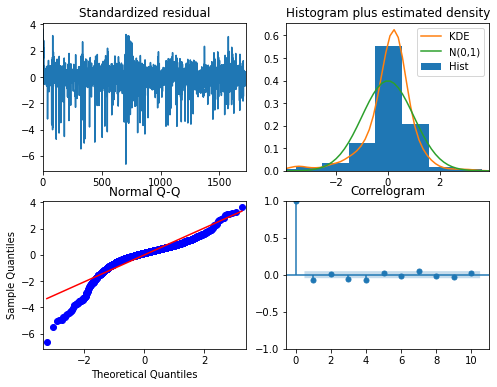

In [342]:
arima_model.plot_diagnostics(figsize=(8, 6))
plt.show()

In [343]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 92), index = test15.index)
prediction2 = prediction.rename(columns = {0: 'predicted_trafic'}).reset_index()
prediction2

fecha  predicted_trafic
0  2019-10-01      39642.937636
1  2019-10-02      41082.154097
2  2019-10-03      41845.750635
3  2019-10-04      43594.170327
4  2019-10-05      39874.470390
..        ...               ...
87 2019-12-27      43791.893922
88 2019-12-28      40070.201398
89 2019-12-29      38027.424328
90 2019-12-30      38883.480642
91 2019-12-31      40221.274190

[92 rows x 2 columns]

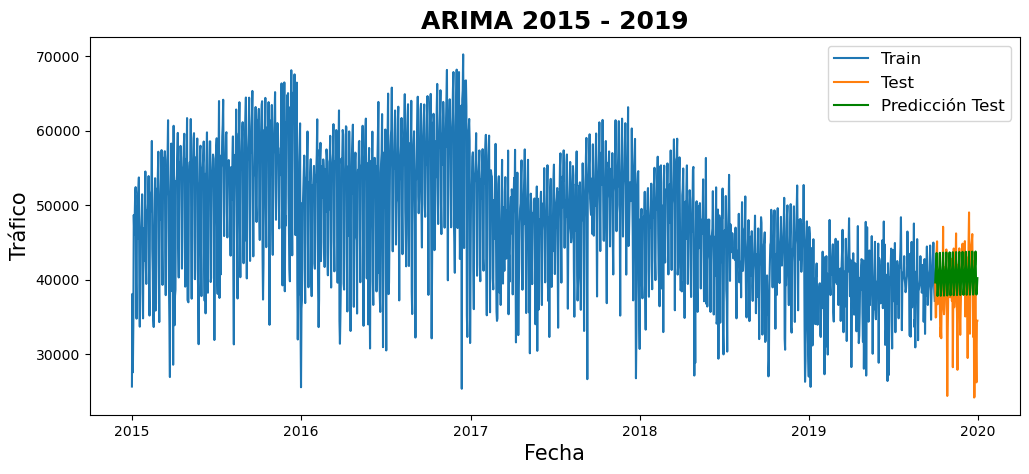

In [344]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train15 , label='Train')
plt.plot(test15 , label='Test')
plt.plot(prediction, color = 'green',label='Predicción Test')
plt.title("ARIMA 2015 - 2019", fontsize = 18, fontweight="bold")
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Tráfico', fontsize = 15)
plt.legend(fontsize = 12, loc = 'upper right')
plt.show()

Hacemos nuestra predicción con ARIMA para el último trimestre del 2019.

In [345]:
test_rmse = np.sqrt(mean_squared_error(test15['cantidad_pasos'], prediction2['predicted_trafic']))
print(f'Raíz del error cuadrático medio en Test: {test_rmse}') 

Raíz del error cuadrático medio en Test: 5102.679455585368


Observamos que empeoraron las medidas comparado al modelo sin usar los años anteriores.

In [346]:
final = {"Modelo":["Benchmark", "Rolling Window", "Random Forest", "Random Forest", "XGBoost", "XGBoost", "ARIMA", "PROPHET", "Random Forest", "Random Forest", "PROPHET", "ARIMA"], 
           "Hiper-parámetros":["default", "7 días", "maxdepth = 5", "Look_back = 100, n_estimators=100", "maxdepth = 2", "Look_back = 100, n_estimators=100", "ARIMA(1,0,2)(0,1,1),7", "periods=92", "n_estimators: 400, min_samples_split: 12, max_features: 7, max_depth: 20", "n_estimators: 400, min_samples_split: 12, max_features: 7, max_depth: 20", "periods=92", "ARIMA(1,0,2)(0,1,1),7" ], 
           "Variables X": ["tráfico", "tráfico", "tráfico", "893 días", "tráfico", "893 días", "tráfico", "tráfico", "tráfico", "+2015-2016", "+2015-2016", "+2015-2016"], "RMSE (test)":["~5316", "~4766", "~5322", "~4495", "~5255", "~4435", "~5072", "~5831", "~4545", "~2602", "~5626", "~5102" ], "Diferencia RMSE Test-Train":["~800", "~1200", "~60", "~2800", "~60", "~4000", "", "", "~1900", "~ -2700", "", ""]}
pd.DataFrame(final)

Modelo                                   Hiper-parámetros  \
0        Benchmark                                            default   
1   Rolling Window                                             7 días   
2    Random Forest                                       maxdepth = 5   
3    Random Forest                  Look_back = 100, n_estimators=100   
4          XGBoost                                       maxdepth = 2   
5          XGBoost                  Look_back = 100, n_estimators=100   
6            ARIMA                              ARIMA(1,0,2)(0,1,1),7   
7          PROPHET                                         periods=92   
8    Random Forest  n_estimators: 400, min_samples_split: 12, max_...   
9    Random Forest  n_estimators: 400, min_samples_split: 12, max_...   
10         PROPHET                                         periods=92   
11           ARIMA                              ARIMA(1,0,2)(0,1,1),7   

   Variables X RMSE (test) Diferencia RMSE Test-Train  
0      tráfico       ~5316                       ~800  
1      tráfico       ~4766                      ~1200  
2      tráfico       ~5322                        ~60  
3     893 días       ~4495                      ~2800  
4      tráfico       ~5255                        ~60  
5     893 días       ~4435                      ~4000  
6      tráfico       ~5072                             
7      tráfico       ~5831                             
8      tráfico       ~4545                      ~1900  
9   +2015-2016       ~2602                    ~ -2700  
10  +2015-2016       ~5626                             
11  +2015-2016       ~5102

### CONCLUSIONES

Agregando las variables de los años anteriores observamos que para nuestro modelo de Random Forest haciendo el look back mejoraron mucho las mediciones, en cambio para nuestros modelos de PROPHET y ARIMA no les variaron mucho las mediciones.

#### USANDO MÁS VARIABLES

Vamos a probar usando las otras variables para predecir, la de sentido y tipo de vehículo, junto con Año, mes, día, hora y día de la semana. Esto se puede hacer para un Random Forest pero no para los modelos de ARIMA y PROPHET. Vamos a seguir con el mismo tipo de pago de Efectivo y la autopista de Illía para poder comparar los modelos.

In [347]:
Añosproy_6 = Añosproy_5.drop(['forma_pago', 'estacion'] , axis = 1).reset_index(drop = True)
print(Añosproy_6.shape)
Añosproy_6.head()

(238956, 6)


periodo tipo_vehiculo    sentido  cantidad_pasos               fecha  \
0     2019       Liviano     Centro             537 2019-01-01 02:00:00   
1     2019        Pesado     Centro               1 2019-01-01 02:00:00   
2     2019       Liviano  Provincia             443 2019-01-01 02:00:00   
3     2019        Pesado  Provincia               1 2019-01-01 02:00:00   
4     2019       Liviano     Centro             769 2019-01-01 03:00:00   

      dia  
0  Martes  
1  Martes  
2  Martes  
3  Martes  
4  Martes

Volvemos a visualizar nuestro dataset con pago en Efectivo y estación Illía, de 2017-2019.

In [348]:
Añosproy_6['Day'] = Añosproy_6['fecha'].dt.strftime("%d")
Añosproy_6['Mes'] = Añosproy_6['fecha'].dt.strftime("%B")
Añosproy_6['hora'] = Añosproy_6['fecha'].dt.strftime("%R")
Añosproy_6['cantidad_pasos'][Añosproy_6.fecha >= '2019-10-01'] = np.nan
Añosproy_6.head()

<ipython-input-348-b03fecfc7fd8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Añosproy_6['cantidad_pasos'][Añosproy_6.fecha >= '2019-10-01'] = np.nan


periodo tipo_vehiculo    sentido  cantidad_pasos               fecha  \
0     2019       Liviano     Centro           537.0 2019-01-01 02:00:00   
1     2019        Pesado     Centro             1.0 2019-01-01 02:00:00   
2     2019       Liviano  Provincia           443.0 2019-01-01 02:00:00   
3     2019        Pesado  Provincia             1.0 2019-01-01 02:00:00   
4     2019       Liviano     Centro           769.0 2019-01-01 03:00:00   

      dia Day      Mes   hora  
0  Martes  01  January  02:00  
1  Martes  01  January  02:00  
2  Martes  01  January  02:00  
3  Martes  01  January  02:00  
4  Martes  01  January  03:00

Sacamos los días, los meses y las horas de la fecha y ponemos los valores de cantidad_pasos del último trimestre del 2019 en nulos.

In [349]:
Añosproy_7 = Añosproy_6.copy()

le = preprocessing.LabelEncoder()

le.fit(Añosproy_7['tipo_vehiculo'])
Añosproy_7['tipo_vehiculo'] = le.transform(Añosproy_7['tipo_vehiculo'])

le.fit(Añosproy_7['sentido'])
Añosproy_7['sentido'] = le.transform(Añosproy_7['sentido'])

print("Categorías encodeadas de categoría: ",Añosproy_7['tipo_vehiculo'].unique())
print("Categorías encodeadas de sentido: ", Añosproy_7['sentido'].unique())
Añosproy_7.head()

Categorías encodeadas de categoría:  [0 1]
Categorías encodeadas de sentido:  [0 1]


periodo  tipo_vehiculo  sentido  cantidad_pasos               fecha  \
0     2019              0        0           537.0 2019-01-01 02:00:00   
1     2019              1        0             1.0 2019-01-01 02:00:00   
2     2019              0        1           443.0 2019-01-01 02:00:00   
3     2019              1        1             1.0 2019-01-01 02:00:00   
4     2019              0        0           769.0 2019-01-01 03:00:00   

      dia Day      Mes   hora  
0  Martes  01  January  02:00  
1  Martes  01  January  02:00  
2  Martes  01  January  02:00  
3  Martes  01  January  02:00  
4  Martes  01  January  03:00

Hacemos un label Encoder de tipo_vehiculo y sentido.

In [350]:
enc = OneHotEncoder()

enc.fit(Añosproy_7[['periodo']])
Peaje_transformed = enc.transform(Añosproy_7[['periodo']]).toarray()
pd.DataFrame(Peaje_transformed, columns=enc.categories_[0])
Añosproy_8 = Añosproy_7.join(pd.DataFrame(Peaje_transformed, columns=enc.categories_[0]))
Añosproy_9 = Añosproy_8.drop(['periodo'], axis = 1)

enc.fit(Añosproy_9[['Mes']])
Mes_transformed = enc.transform(Añosproy_9[['Mes']]).toarray()
pd.DataFrame(Mes_transformed, columns=enc.categories_[0])
Añosproy_10 = Añosproy_9.join(pd.DataFrame(Mes_transformed, columns=enc.categories_[0]))
Añosproy_11 = Añosproy_10.drop(['Mes'], axis = 1)

enc.fit(Añosproy_11[['dia']])
Mes_transformed = enc.transform(Añosproy_11[['dia']]).toarray()
pd.DataFrame(Mes_transformed, columns=enc.categories_[0])
Añosproy_12 = Añosproy_11.join(pd.DataFrame(Mes_transformed, columns=enc.categories_[0]))
Añosproy_13 = Añosproy_12.drop(['dia'], axis = 1)

enc.fit(Añosproy_13[['Day']])
Mes_transformed = enc.transform(Añosproy_13[['Day']]).toarray()
pd.DataFrame(Mes_transformed, columns=enc.categories_[0])
Añosproy_14 = Añosproy_13.join(pd.DataFrame(Mes_transformed, columns=enc.categories_[0]))
Añosproy_15 = Añosproy_14.drop(['Day'], axis = 1)

enc.fit(Añosproy_15[['hora']])
Mes_transformed = enc.transform(Añosproy_15[['hora']]).toarray()
pd.DataFrame(Mes_transformed, columns=enc.categories_[0])
Añosproy_16 = Añosproy_15.join(pd.DataFrame(Mes_transformed, columns=enc.categories_[0]))
Añosproy_17 = Añosproy_16.drop(['hora'], axis = 1)

Añosproy_17.head()

tipo_vehiculo  sentido  cantidad_pasos               fecha  2017  2018  \
0              0        0           537.0 2019-01-01 02:00:00   0.0   0.0   
1              1        0             1.0 2019-01-01 02:00:00   0.0   0.0   
2              0        1           443.0 2019-01-01 02:00:00   0.0   0.0   
3              1        1             1.0 2019-01-01 02:00:00   0.0   0.0   
4              0        0           769.0 2019-01-01 03:00:00   0.0   0.0   

   2019  April  August  December  ...  14:00  15:00  16:00  17:00  18:00  \
0   1.0    0.0     0.0       0.0  ...    0.0    0.0    0.0    0.0    0.0   
1   1.0    0.0     0.0       0.0  ...    0.0    0.0    0.0    0.0    0.0   
2   1.0    0.0     0.0       0.0  ...    0.0    0.0    0.0    0.0    0.0   
3   1.0    0.0     0.0       0.0  ...    0.0    0.0    0.0    0.0    0.0   
4   1.0    0.0     0.0       0.0  ...    0.0    0.0    0.0    0.0    0.0   

   19:00  20:00  21:00  22:00  23:00  
0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0  

[5 rows x 81 columns]

Hacemos un Hot Encoder de Periodo, Mes, día, Day y hora y observamos que nos quedamos con 81 columnas.

In [351]:
SinNulls17 = Añosproy_17[pd.isnull(Añosproy_17['cantidad_pasos']) == False]
ConNulls17 = Añosproy_17[pd.isnull(Añosproy_17['cantidad_pasos'])]

X1 = SinNulls17.drop(['cantidad_pasos', 'fecha'], axis = 1)
y1 = SinNulls17['cantidad_pasos']

X2 = ConNulls17.drop(['cantidad_pasos', 'fecha'], axis = 1)
y2 = ConNulls17['cantidad_pasos']

rfModel = RandomForestRegressor(n_estimators= 400, min_samples_split= 12, max_features= 7, max_depth= 20)
rfModel.fit(X1,y1)

predtrain = rfModel.predict(X1)
prediction = rfModel.predict(X2)

p = pd.DataFrame(prediction)
p

0
0     384.722842
1      44.456192
2     396.341877
3      47.992493
4     308.424955
...          ...
8740  689.038237
8741   79.235523
8742  566.648672
8743  558.250691
8744  474.259729

[8745 rows x 1 columns]

Hacemos la predicción de cantidad_pasos del último trimestre del 2019.

In [352]:
pred1 = ConNulls17.copy()
pred1.__setitem__('cantidad_pasos', prediction)
predtrain1 = SinNulls17.copy()
predtrain1.__setitem__('cantidad_pasos', predtrain)

Reemplazamos los valores de la predicción de train y la predicción de test para poder modelar nuestros resultados.

In [353]:
train = Añosproy_7[Añosproy_7.fecha < '2019-10-01'].reset_index(drop = True)
test = Añosproy_5[Añosproy_5.fecha >= '2019-10-01'].reset_index(drop = True)
test.head()

periodo tipo_vehiculo estacion    sentido  cantidad_pasos  \
0     2019       Liviano    Illia     Centro             332   
1     2019        Pesado    Illia     Centro              13   
2     2019       Liviano    Illia  Provincia             302   
3     2019        Pesado    Illia  Provincia              10   
4     2019       Liviano    Illia     Centro             186   

                fecha     dia forma_pago  
0 2019-10-01 01:00:00  Martes   EFECTIVO  
1 2019-10-01 01:00:00  Martes   EFECTIVO  
2 2019-10-01 01:00:00  Martes   EFECTIVO  
3 2019-10-01 01:00:00  Martes   EFECTIVO  
4 2019-10-01 02:00:00  Martes   EFECTIVO

Separamos nuestro dataset original en train y test.

In [354]:
Dtrain = train.resample('D', on = 'fecha').sum()
Dtest = test.resample('D', on = 'fecha').sum()
Dpred1 = pred1.resample('D', on = 'fecha').sum()
Dpredtrain = predtrain1.resample('D', on = 'fecha').sum()

Hacemos un resampleo por días de Train, test, y las predicciones de test y train.

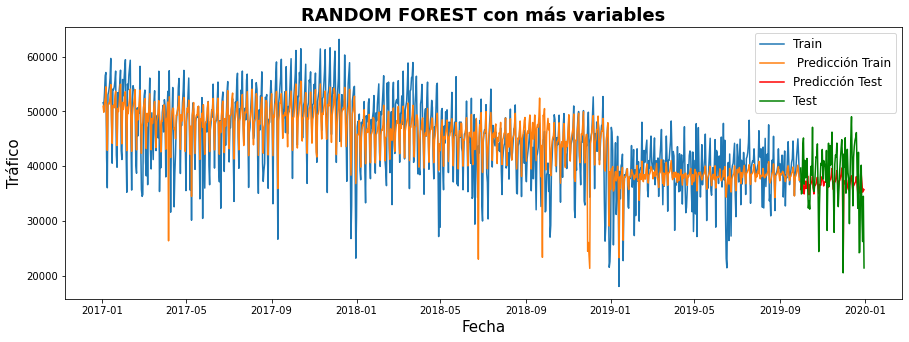

In [355]:
plt.figure(figsize = (15,5))
plt.plot(Dtrain.index, Dtrain['cantidad_pasos'], label = 'Train')
plt.plot(Dpredtrain.index, Dpredtrain['cantidad_pasos'] , label = ' Predicción Train')
plt.plot(Dpred1.index, Dpred1['cantidad_pasos'], label = 'Predicción Test', color = "red")
plt.plot(Dtest.index, Dtest['cantidad_pasos'], label = 'Test', color = "green")
plt.title("RANDOM FOREST con más variables", fontsize = 18, fontweight="bold")
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Tráfico', fontsize = 15)
plt.legend(fontsize = 12, loc = 'upper right')
plt.show()

Visualizamos los resultados.

In [356]:
train_rmse = np.sqrt(mean_squared_error(Dtrain['cantidad_pasos'], Dpredtrain['cantidad_pasos']))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}') 
test_rmse = np.sqrt(mean_squared_error(Dtest['cantidad_pasos'], Dpred1['cantidad_pasos']))
print(f'Raíz del error cuadrático medio en Test: {test_rmse}') 

Raíz del error cuadrático medio en Train: 4563.799344441495
Raíz del error cuadrático medio en Test: 5203.732638753273


Comparado al primero que hicimos nos da incluso peor RMSE

In [357]:
final = {"Modelo":["Benchmark", "Rolling Window", "Random Forest", "Random Forest", "XGBoost", "XGBoost", "ARIMA", "PROPHET", "Random Forest", "Random Forest"], 
           "Hiper-parámetros":["default", "7 días", "maxdepth = 5", "Look_back = 100, n_estimators=100", "maxdepth = 2", "Look_back = 100, n_estimators=100", "ARIMA(1,0,2)(0,1,1),7", "periods=92", "n_estimators: 400, min_samples_split: 12, max_features: 7, max_depth: 20", "n_estimators: 400, min_samples_split: 12, max_features: 7, max_depth: 20"], 
           "Variables X": ["tráfico", "tráfico", "tráfico", "893 días", "tráfico", "893 días", "tráfico", "tráfico", "tráfico", "81 columns"], "RMSE (test)":["~5316", "~4766", "~5322", "~4495", "~5255", "~4435", "~5072", "~5831", "~4545", "~5215"], "Diferencia RMSE Test-Train":["~800", "~1200", "~60", "~2800", "~60", "~4000", "", "", "~1900", "~700"]}
pd.DataFrame(final)

Modelo                                   Hiper-parámetros  \
0       Benchmark                                            default   
1  Rolling Window                                             7 días   
2   Random Forest                                       maxdepth = 5   
3   Random Forest                  Look_back = 100, n_estimators=100   
4         XGBoost                                       maxdepth = 2   
5         XGBoost                  Look_back = 100, n_estimators=100   
6           ARIMA                              ARIMA(1,0,2)(0,1,1),7   
7         PROPHET                                         periods=92   
8   Random Forest  n_estimators: 400, min_samples_split: 12, max_...   
9   Random Forest  n_estimators: 400, min_samples_split: 12, max_...   

  Variables X RMSE (test) Diferencia RMSE Test-Train  
0     tráfico       ~5316                       ~800  
1     tráfico       ~4766                      ~1200  
2     tráfico       ~5322                        ~60  
3    893 días       ~4495                      ~2800  
4     tráfico       ~5255                        ~60  
5    893 días       ~4435                      ~4000  
6     tráfico       ~5072                             
7     tráfico       ~5831                             
8     tráfico       ~4545                      ~1900  
9  81 columns       ~5215                       ~700

Observamos que el RMSE empeoró por 700, pero mejoró en cuanto al overfitting.

### COMPARANDO ESTACIONES

Vamos a comprar las diferentes series de tiempo de los peajes principales: Avellaneda, Dellepiane e Illía. Recordemos que el tráfico registrado por Avellaneda viene del Oeste, el de Dellepiane viene del sur y el de Illía del Norte. Como vimos antes el tráfico que viene del Sur se comporta diferente a los otros dos. Vamos a ver como se comporta a lo largo del tiempo con pago en Efectivo.

In [358]:
mask = np.logical_and(Años.estacion=='Dellepiane', Años.forma_pago == 'EFECTIVO')
AñosDE= Años[mask]
mask2 = np.logical_and(AñosDE.fecha >= '2017-01-02', AñosDE.fecha < '2020-01-01')
AñosDE_2 = AñosDE[mask2]

mask = np.logical_and(Años.estacion=='Avellaneda', Años.forma_pago == 'EFECTIVO')
AñosAE= Años[mask]
mask2 = np.logical_and(AñosAE.fecha >= '2017-01-02', AñosAE.fecha < '2020-01-01')
AñosAE_2 = AñosAE[mask2]

mask2 = np.logical_and(AñosIE.fecha >= '2017-01-02', AñosIE.fecha < '2020-01-01')
AñosIE_2 = AñosIE[mask2]

Hacemos tres filtros para los tres peajes con pago en efectivo.

In [359]:
D_IE = AñosIE_2.resample('D', on = 'fecha').sum()
D_AE = AñosAE_2.resample('D', on = 'fecha').sum()
D_DE = AñosDE_2.resample('D', on = 'fecha').sum()

Hacemos un resampleo por día para los tres peajes.

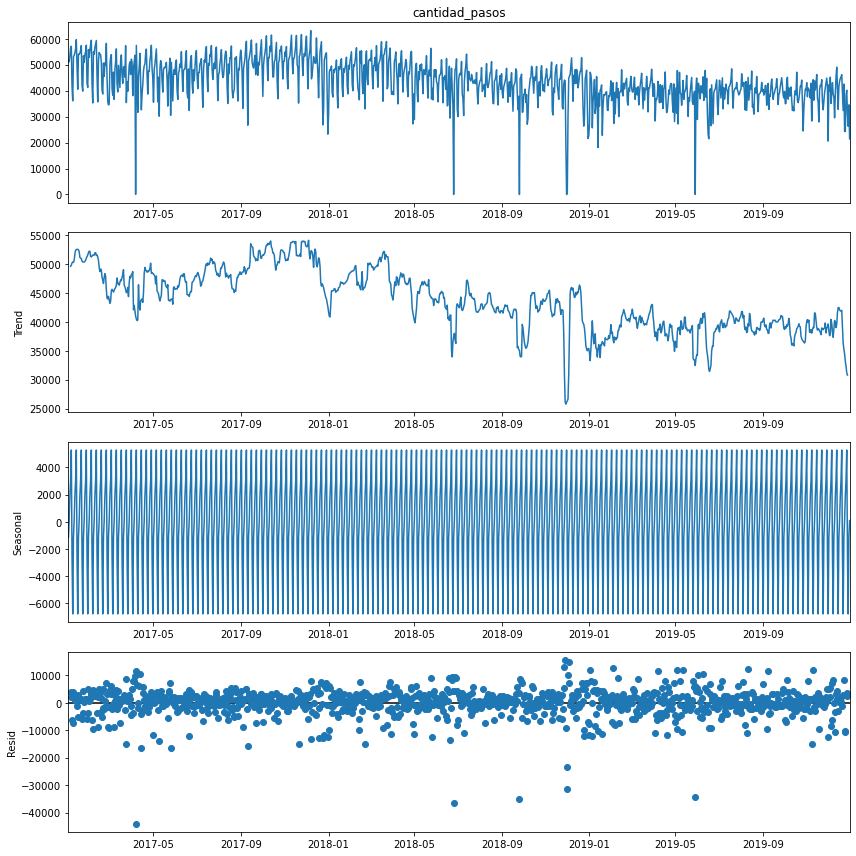

In [360]:
result = seasonal_decompose(D_IE['cantidad_pasos'], model='additive')
plt.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

Observamos las características del peaje Illía y vemos la tendencia para abajo para el pago en efectivo.

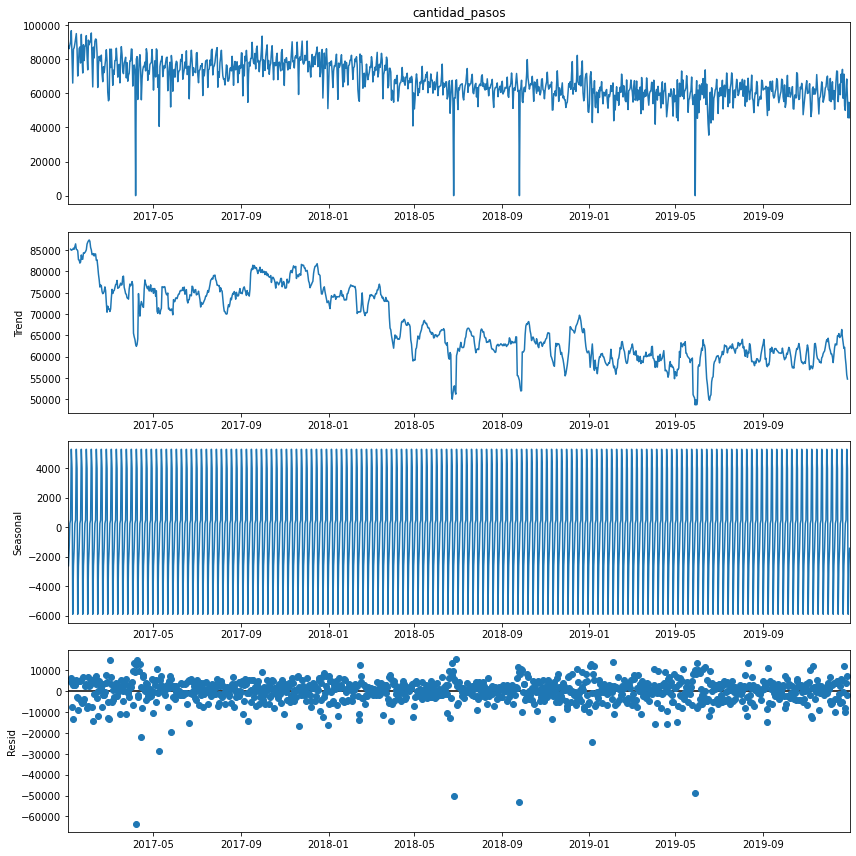

In [361]:
result2 = seasonal_decompose(D_AE['cantidad_pasos'], model='additive')
plt.rcParams['figure.figsize'] = [12,12]
result2.plot()
plt.show()

Observamos que para el peaje de Avellaneda la tendencia baja también para el pago en efectivo.

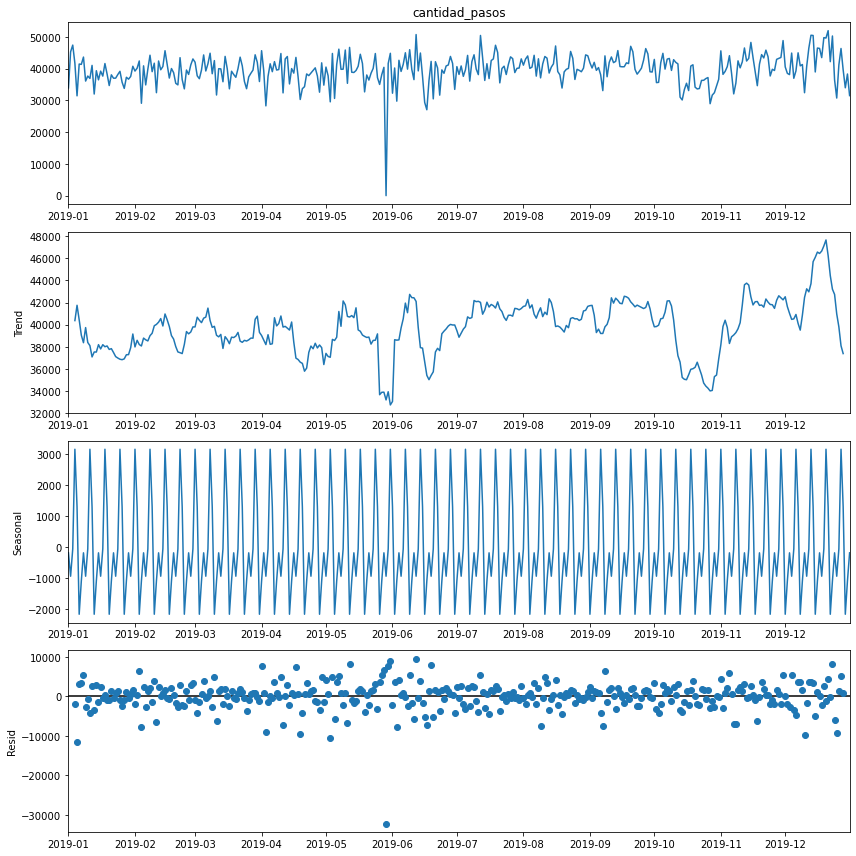

In [362]:
result3 = seasonal_decompose(D_DE['cantidad_pasos'], model='additive')
plt.rcParams['figure.figsize'] = [12,12]
result3.plot()
plt.show()

Observamos que la tendencia para el peaje Dellepiane para el pago en efectivo se mantiene estable e incluso crece a lo largo del tiempo. Ese comportamiento es diferente a las otros dos peajes. Esto puede ser a que la clase social más baja de las tres se ubica en el sur de Buenos Aires, por lo que es entendible que manejen más efectivo que las otras dos y tengan más resistencia a cambiar a Telepase.

## CONCLUSIONES FINALES

**EDA**

1- Hemos obtenido un buen mapeo del tráfico por días, por horas, por años.

2- Hemos podido visualizar los diferentes pejaes en los diferentes medios de pago y sentidos. 

3- Hemos observado el diferente comportamiento de vehiculos livanos y pesados.

4- Hemos podido observar el efecto de la Pandemia, los paros y los feriados en el impacto en la medición del tráfico de las autopistas de la Ciudad de Buenos Aires.

**MODELOS**

1- Hemos implementado diferentes modelos como Random Forest, ARIMA y PROPHET.

2- Los resultados para las predicciones no son lo suficientemente buenas para poder predecir el tráfico. Estos puede ser por la 
cantidad de ruido que tiene la serie.

3- El mejor modelo para predecir el tráfico del final de 2019 fue el Random Forest.

4- El mejor modelo para predecir el tráfico del 2020 fue PROPHET. 

**INVESTIGACIÓN**

1- Hemos intentado mejorar los modelos usando años anteriores, lo cual nos dio bien para Random Forest, pero no para ARIMA y PROPHET.

2- Hemos intentado mejorar el Random Forest usando diferentes variables y nos hemos encontrado que empeora las mediciones.

3- Hemos comparado el comportamiento de pago en Efectivo en los tres peajes y nos hemos encontrado con un comoportamiento diferente para el peaje de Dellepiane, el cual no baja como los otros dos, sino que se mantiene o sube.

**PARA MEJORAR**

1- Observamos que se puede mejorar si se hace un tratamiento sobre los días feriados así como se hizo para los días de paro y diferentes acontecimientos. 

2- Se podría mejorar los modelos con una investigación más profunda sobre PROPHET y ARIMA, que creemos que son los mejores modelos para predecir a largo plazo.